Related urls, will remove once finished:
- https://medium.com/data-science-in-your-pocket/automl-for-time-series-forecasting-using-autots-with-example-735fb559443a
- https://github.com/winedarksea/AutoTS#tips-for-speed-and-large-data

Import libraries

In [2]:
import pandas as pd
from autots import AutoTS
from autots.models.model_list import model_lists
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from metrics import print_evaluation_metrics

Load dataset

In [3]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date_reported"
target_column = "New_deaths"
df = pd.read_csv(file_path, parse_dates=True)
df = df[[date_column, target_column, 'New_cases_yesterday']]
df[date_column] = pd.to_datetime(df[date_column], format="%Y-%m-%d")


df = df.groupby(date_column).sum().reset_index()
df.set_index(date_column, inplace=True)
dates = df.index.values

Create model

In [4]:
data_length = len(df)
train_split = 0.9
model = AutoTS(
    forecast_length=(int(data_length*(1-train_split))),
    frequency="D",
    prediction_interval=0.95,
    ensemble=None,
    models_mode="gradient_boosting",
    model_list="univariate",
    max_generations=5,
    num_validations=3,
    no_negatives=True,
    transformer_list="fast",
    n_jobs="auto",
)

Using 6 cpus for n_jobs.


In [13]:
print(model_lists.keys())

dict_keys(['all', 'default', 'fast', 'superfast', 'parallel', 'fast_parallel', 'fast_parallel_no_arima', 'probabilistic', 'multivariate', 'univariate', 'no_params', 'recombination_approved', 'no_shared', 'no_shared_fast', 'experimental', 'slow', 'gpu', 'regressor', 'best', 'motifs', 'all_result_path', 'regressions', 'all_pragmatic', 'update_fit'])


In [14]:
print(model_lists["univariate"])

['FFT', 'ConstantNaive', 'SeasonalNaive', 'DatepartRegression', 'ARCH', 'LastValueNaive', 'KalmanStateSpace', 'NeuralProphet', 'ARDL', 'MLEnsemble', 'PreprocessingRegression', 'Theta', 'MetricMotif', 'SeasonalityMotif', 'UnivariateMotif', 'ARIMA', 'UnobservedComponents', 'ETS', 'GLM', 'UnivariateRegression', 'FBProphet', 'GLS', 'AverageValueNaive']


Train test split, fit and prediction

In [5]:
train = df.iloc[:int(data_length*train_split)]
test = df.iloc[int(data_length*train_split):]

In [15]:
train = df.iloc[:int(data_length*train_split)]
test = df.iloc[int(data_length*train_split):]
model.fit(train)
prediction = model.predict(forecast_length=len(test))

Data frequency is: D, used frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 5


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.04210D+00    |proj g|=  6.13241D-02


 This problem is unconstrained.



At iterate    1    f=  9.03609D+00    |proj g|=  5.31338D-02

At iterate    2    f=  9.03219D+00    |proj g|=  2.61606D-02

At iterate    3    f=  9.03032D+00    |proj g|=  2.00666D-02

At iterate    4    f=  9.02794D+00    |proj g|=  2.15335D-02

At iterate    5    f=  9.02458D+00    |proj g|=  2.32838D-02

At iterate    6    f=  9.02077D+00    |proj g|=  3.53904D-02

At iterate    7    f=  9.01609D+00    |proj g|=  5.21585D-02

At iterate    8    f=  9.00853D+00    |proj g|=  5.49024D-02

At iterate    9    f=  9.00228D+00    |proj g|=  1.34950D-01

At iterate   10    f=  8.99815D+00    |proj g|=  5.76993D-02

At iterate   11    f=  8.99585D+00    |proj g|=  3.89188D-02

At iterate   12    f=  8.99397D+00    |proj g|=  3.04762D-02

At iterate   13    f=  8.99122D+00    |proj g|=  2.51368D-02

At iterate   14    f=  8.98884D+00    |proj g|=  3.55730D-02

At iterate   15    f=  8.98664D+00    |proj g|=  4.17289D-02

At iterate   16    f=  8.98501D+00    |proj g|=  2.17169D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  1.43838D+01    |proj g|=  1.73525D-01

At iterate    3    f=  1.43556D+01    |proj g|=  7.15064D-02

At iterate    4    f=  1.43484D+01    |proj g|=  3.52266D-02

At iterate    5    f=  1.43412D+01    |proj g|=  4.69778D-02

At iterate    6    f=  1.43161D+01    |proj g|=  8.77468D-02

At iterate    7    f=  1.43056D+01    |proj g|=  6.06023D-02

At iterate    8    f=  1.42986D+01    |proj g|=  1.23822D-01

At iterate    9    f=  1.42959D+01    |proj g|=  7.36479D-02

At iterate   10    f=  1.42900D+01    |proj g|=  9.63115D-02

At iterate   11    f=  1.42881D+01    |proj g|=  1.12182D-01

At iterate   12    f=  1.42839D+01    |proj g|=  4.45253D-02

At iterate   13    f=  1.42807D+01    |proj g|=  7.04345D-02

At iterate   14    f=  1.42778D+01    |proj g|=  5.50331D-02

At iterate   15    f=  1.42766D+01    |proj g|=  2.76282D-02

At iterate   16    f=  1.42757D+01    |proj g|=  2.09561D-02

At iterate   17    f=  1.42742D+01    |proj g|=  1.86663D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 7 with model DatepartRegression in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 8 with model DatepartRegression in generation 0 of 5
Epoch 1/50
36/36 [==============================] - 8s 6ms/step - loss: 0.4107
Epoch 2/50
36/36 [==============================] - 0s 6ms/step - loss: 0.4064
Epoch 3/50
36/36 [==============================] - 0s 8ms/step - loss: 0.4035
Epoch 4/50
36/36 [==============================] - 0s 5ms/step - loss: 0.4014
Epoch 5/50
36/36 [==============================] - 0s 5ms/step - loss: 0.4011
Epoch 6/50
36/36 [==============================] - 0s 6ms/step - loss: 0.4006
Epoch 7/50
36/36 [==============================] - 0s 10ms/step - loss: 0.4035
Epoch 8/50
36/36 [==============================] - 0s 11ms/step - loss: 0.3976
Epoch 9/50
36/36 [==============================] - 0s 10ms/step - loss: 0.3979
Epoch 10/50
36/36 [==============================] - 0s 8ms/step - loss: 0.3955
Epoch 11/50
36/36 [==============================] - 0s 8ms/step - loss: 0.3967
Epoch 12/50
36/36 [==============================] - 0s 8ms

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 77 with model FFT in generation 0 of 5
Model Number: 78 with model SeasonalNaive in generation 0 of 5
Model Number: 79 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 79 in generation 0: PreprocessingRegression
Model Number: 80 with model LastValueNaive in generation 0 of 5
Model Number: 81 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.55595D+00    |proj g|=  9.57398D-01


 This problem is unconstrained.



At iterate    1    f=  9.46072D+00    |proj g|=  7.38123D-01

At iterate    2    f=  9.21568D+00    |proj g|=  1.42225D-01

At iterate    3    f=  9.20056D+00    |proj g|=  1.06341D-01

At iterate    4    f=  9.18383D+00    |proj g|=  6.90201D-02

At iterate    5    f=  9.16897D+00    |proj g|=  5.05223D-02

At iterate    6    f=  9.13991D+00    |proj g|=  6.02169D-02

At iterate    7    f=  9.12765D+00    |proj g|=  6.31872D-02

At iterate    8    f=  9.12152D+00    |proj g|=  2.56195D-02

At iterate    9    f=  9.11698D+00    |proj g|=  1.66391D-02

At iterate   10    f=  9.11465D+00    |proj g|=  1.96870D-02

At iterate   11    f=  9.11282D+00    |proj g|=  2.88023D-02

At iterate   12    f=  9.11116D+00    |proj g|=  1.75145D-02

At iterate   13    f=  9.11047D+00    |proj g|=  9.42457D-03

At iterate   14    f=  9.10980D+00    |proj g|=  1.10089D-02

At iterate   15    f=  9.10849D+00    |proj g|=  1.52273D-02

At iterate   16    f=  9.10784D+00    |proj g|=  2.09301D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48282D+01    |proj g|=  1.02101D+00


 This problem is unconstrained.



At iterate    1    f=  1.47117D+01    |proj g|=  1.04664D+00

At iterate    2    f=  1.44429D+01    |proj g|=  2.02145D-01

At iterate    3    f=  1.44162D+01    |proj g|=  1.47612D-01

At iterate    4    f=  1.43922D+01    |proj g|=  7.93279D-02

At iterate    5    f=  1.43802D+01    |proj g|=  4.19118D-02

At iterate    6    f=  1.43684D+01    |proj g|=  2.06876D-02

At iterate    7    f=  1.43657D+01    |proj g|=  5.51866D-02

At iterate    8    f=  1.43631D+01    |proj g|=  4.52226D-02

At iterate    9    f=  1.43621D+01    |proj g|=  1.42041D-02

At iterate   10    f=  1.43612D+01    |proj g|=  1.04262D-02

At iterate   11    f=  1.43596D+01    |proj g|=  2.45846D-02

At iterate   12    f=  1.43584D+01    |proj g|=  1.46808D-02

At iterate   13    f=  1.43579D+01    |proj g|=  4.67062D-02

At iterate   14    f=  1.43564D+01    |proj g|=  9.95754D-03

At iterate   15    f=  1.43561D+01    |proj g|=  8.07642D-03

At iterate   16    f=  1.43555D+01    |proj g|=  5.88774D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72960704056235.7, tolerance: 16704715128.668526
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 85 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 85 in generation 0: ARCH
Model Number: 86 with model UnivariateRegression in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/impute.py:54: RuntimeWarning: Mean of empty slice
  arr = np.nan_to_num(arr) + np.isnan(arr) * np.nan_to_num(np.nanmean(arr, axis=0))


Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 86 in generation 0: UnivariateRegression
Model Number: 87 with model UnivariateMotif in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 87 in generation 0: UnivariateMotif
Model Number: 88 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 88 in generation 0: ARCH
Model Number: 89 with model KalmanStateSpace in generation 0 of 5
Model Number: 90 with model AverageValueNaive in generation 0 of 5
Model Number: 91 with model GLS in generation 0 of 5
Model Number: 92 with model AverageValueNaive in generation 0 of 5
Model Number: 93 with model ConstantNaive in generation 0 of 5
Model Number: 94 with model KalmanStateSpace in generation 0 of 5
Model Number: 95 with model MLEnsemble in generation 0 of 5
Model Number: 96 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

 

 This problem is unconstrained.



At iterate    1    f=  6.05349D+00    |proj g|=  2.95115D-01

At iterate    2    f=  6.02135D+00    |proj g|=  1.01959D-01

At iterate    3    f=  6.01259D+00    |proj g|=  6.26949D-02

At iterate    4    f=  6.00982D+00    |proj g|=  3.18171D-02

At iterate    5    f=  6.00751D+00    |proj g|=  2.53060D-02

At iterate    6    f=  5.99951D+00    |proj g|=  9.35272D-02

At iterate    7    f=  5.99839D+00    |proj g|=  1.01759D-01

At iterate    8    f=  5.99235D+00    |proj g|=  8.45334D-02

At iterate    9    f=  5.98745D+00    |proj g|=  1.80187D-02

At iterate   10    f=  5.98701D+00    |proj g|=  5.34418D-03

At iterate   11    f=  5.98696D+00    |proj g|=  2.52822D-03

At iterate   12    f=  5.98695D+00    |proj g|=  1.37648D-03

At iterate   13    f=  5.98695D+00    |proj g|=  1.80562D-03

At iterate   14    f=  5.98694D+00    |proj g|=  2.53123D-03

At iterate   15    f=  5.98690D+00    |proj g|=  5.51153D-03

At iterate   16    f=  5.98685D+00    |proj g|=  8.75563D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16259D+01    |proj g|=  1.53112D+00

At iterate    1    f=  1.09533D+01    |proj g|=  1.68252D-01

At iterate    2    f=  1.09390D+01    |proj g|=  1.46855D-01

At iterate    3    f=  1.09080D+01    |proj g|=  4.49824D-02

At iterate    4    f=  1.09066D+01    |proj g|=  1.65185D-02

At iterate    5    f=  1.09064D+01    |proj g|=  1.33862D-02


 This problem is unconstrained.



At iterate    6    f=  1.09054D+01    |proj g|=  1.60524D-02

At iterate    7    f=  1.09048D+01    |proj g|=  1.79106D-02

At iterate    8    f=  1.09033D+01    |proj g|=  4.06178D-02

At iterate    9    f=  1.09014D+01    |proj g|=  1.50337D-02

At iterate   10    f=  1.09001D+01    |proj g|=  1.79476D-02

At iterate   11    f=  1.08993D+01    |proj g|=  1.64668D-02

At iterate   12    f=  1.08984D+01    |proj g|=  1.17366D-02

At iterate   13    f=  1.08979D+01    |proj g|=  2.66514D-02

At iterate   14    f=  1.08972D+01    |proj g|=  4.73192D-02

At iterate   15    f=  1.08966D+01    |proj g|=  1.57585D-02

At iterate   16    f=  1.08964D+01    |proj g|=  1.73415D-02

At iterate   17    f=  1.08962D+01    |proj g|=  5.45328D-03

At iterate   18    f=  1.08959D+01    |proj g|=  8.24663D-03

At iterate   19    f=  1.08958D+01    |proj g|=  2.25685D-02

At iterate   20    f=  1.08957D+01    |proj g|=  5.44640D-03

At iterate   21    f=  1.08956D+01    |proj g|=  7.70896D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 98 with model MetricMotif in generation 0 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 98 in generation 0: MetricMotif
Model Number: 99 with model FBProphet in generation 0 of 5
Model Number: 100 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 100 in generation 0: ARCH
Model Number: 101 with model LastValueNaive in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 101 in generation 0: LastValueNaive
Model Number: 102 with model SeasonalityMotif in generation 0 of 5
Model Number: 103 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 2 and the array at index 1 has size 21') in model 103 in generation 0: MLEnsemble
Model Number: 104 with model The

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185687323692382.44, tolerance: 53517565670.40542
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 139 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 139 in generation 0: PreprocessingRegression
Model Number: 140 with model SeasonalityMotif in generation 0 of 5
Model Number: 141 with model FBProphet in generation 0 of 5
Model Number: 142 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 142 in generation 0: DatepartRegression
Model Number: 143 with model MetricMotif in generation 0 of 5
Model Number: 144 with model AverageValueNaive in generation 0 of 5
Model Number: 145 with model FFT in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438144820990475.7, tolerance: 97953139156.12787
  ) = cd_fast.enet_coordinate_descent_multi_task(


Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 145 in generation 0: FFT
Model Number: 146 with model ETS in generation 0 of 5
Model Number: 147 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 147 in generation 0: PreprocessingRegression
Model Number: 148 with model MetricMotif in generation 0 of 5
Model Number: 149 with model UnobservedComponents in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 149 in generation 0: UnobservedComponents
Model Number: 150 with model ConstantNaive in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 150 in generation 0: ConstantNaive
Model Number: 151 with model GLM in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 151 in generation 0: GLM
Model Number: 152 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 152 in generation 0: ARCH
Model Number: 153 with model MetricMotif in generation 0 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 153 in generation 0: MetricMotif
Model Number: 154 with model LastValueNaive in generation 0 of 5
Model Number: 155 with model MetricMotif in generation 0 of 5
Model Number: 156 with model AverageValueNaive in generation 0 of 5
Model Number: 157 with model UnivariateRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 157 in generation 0: UnivariateRegression
New Generation: 1 of 5
Model Number: 158 with model SeasonalNaive in generation 1 of 5
Model Number: 159 with model FBProphet 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 162 with model UnobservedComponents in generation 1 of 5
Model Number: 163 with model SeasonalNaive in generation 1 of 5
Model Number: 164 with model SeasonalNaive in generation 1 of 5
Model Number: 165 with model Theta in generation 1 of 5
Model Number: 166 with model ConstantNaive in generation 1 of 5
Model Number: 167 with model FFT in generation 1 of 5
Model Number: 168 with model MetricMotif in generation 1 of 5
Model Number: 169 with model DatepartRegression in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 169 in generation 1: DatepartRegression
Model Number: 170 with model KalmanStateSpace in generation 1 of 5
Model Number: 171 with model LastValueNaive in generation 1 of 5
Model Number: 172 with model FBProphet in generation 1 of 5
Model Number: 173 with model SeasonalityMotif in generation 1 of 5
Model Number: 174 with model SeasonalityMotif in generation 1 of 5
Model Number: 175 with model ARI

 This problem is unconstrained.



At iterate    1    f=  9.74619D+00    |proj g|=  2.99760D-01

At iterate    2    f=  9.69930D+00    |proj g|=  1.01570D-01

At iterate    3    f=  9.68699D+00    |proj g|=  8.06918D-02

At iterate    4    f=  9.67236D+00    |proj g|=  5.96183D-02

At iterate    5    f=  9.66147D+00    |proj g|=  4.15580D-02

At iterate    6    f=  9.64819D+00    |proj g|=  3.92003D-02

At iterate    7    f=  9.63333D+00    |proj g|=  2.52977D-02

At iterate    8    f=  9.62771D+00    |proj g|=  3.11300D-02

At iterate    9    f=  9.62427D+00    |proj g|=  9.00535D-02

At iterate   10    f=  9.62255D+00    |proj g|=  2.89394D-02

At iterate   11    f=  9.61957D+00    |proj g|=  1.76176D-02

At iterate   12    f=  9.61750D+00    |proj g|=  1.65912D-02

At iterate   13    f=  9.61377D+00    |proj g|=  9.89163D-03

At iterate   14    f=  9.61079D+00    |proj g|=  1.69449D-02

At iterate   15    f=  9.60878D+00    |proj g|=  1.84468D-02

At iterate   16    f=  9.60800D+00    |proj g|=  1.90185D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  1.50387D+01    |proj g|=  6.93976D-02

At iterate    3    f=  1.50301D+01    |proj g|=  4.80365D-02

At iterate    4    f=  1.50226D+01    |proj g|=  3.82939D-02

At iterate    5    f=  1.50187D+01    |proj g|=  2.08209D-02

At iterate    6    f=  1.50148D+01    |proj g|=  3.66277D-02

At iterate    7    f=  1.50103D+01    |proj g|=  5.38047D-02

At iterate    8    f=  1.50042D+01    |proj g|=  5.30929D-02

At iterate    9    f=  1.50012D+01    |proj g|=  3.06997D-02

At iterate   10    f=  1.49988D+01    |proj g|=  9.65998D-02

At iterate   11    f=  1.49969D+01    |proj g|=  1.34966D-02

At iterate   12    f=  1.49967D+01    |proj g|=  1.33783D-02

At iterate   13    f=  1.49958D+01    |proj g|=  4.70221D-02

At iterate   14    f=  1.49952D+01    |proj g|=  3.28716D-02

At iterate   15    f=  1.49939D+01    |proj g|=  2.71493D-02

At iterate   16    f=  1.49927D+01    |proj g|=  1.15285D-01

At iterate   17    f=  1.49911D+01    |proj g|=  6.95069D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 191 with model ETS in generation 1 of 5
Model Number: 192 with model ARDL in generation 1 of 5
Model Number: 193 with model GLM in generation 1 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 193 in generation 1: GLM
Model Number: 194 with model SeasonalityMotif in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 195 with model AverageValueNaive in generation 1 of 5
Model Number: 196 with model ETS in generation 1 of 5
Model Number: 197 with model DatepartRegression in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 197 in generation 1: DatepartRegression
Model Number: 198 with model UnobservedComponents in generation 1 of 5
Model Number: 199 with model LastValueNaive in generation 1 of 5
Model Number: 200 with model ETS in generation 1 of 5
Model Number: 201 with model ETS in generation 1 of 5
Model Number: 202 with model FBProphet in generation 1 of 5
Model Number: 203 with model UnobservedComponents in generation 1 of 5
Model Number: 204 with model FFT in generation 1 of 5
Model Number: 205 with model AverageValueNaive in generation 1 of 5
Model Number: 206 with model MetricMotif in generation 1 of 5
Model Number: 207 with model ETS in generation 1 of 5
Model Number: 208 with model SeasonalNaive in generation 1 of 5
Model Number: 209 with model GLS in generation 1 of 5
Model Number: 210 with model FFT in generation 1 of 5
Model Number: 211 with model LastValueNaive

/home/samuell/.local/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 234 in generation 1: DatepartRegression
Model Number: 235 with model FFT in generation 1 of 5
Model Number: 236 with model LastValueNaive in generation 1 of 5
Model Number: 237 with model UnivariateMotif in generation 1 of 5
Model Number: 238 with model AverageValueNaive in generation 1 of 5
Model Number: 239 with model MetricMotif in generation 1 of 5
Model Number: 240 with model UnobservedComponents in generation 1 of 5
Template Eval Error: LinAlgError('Singular matrix') in model 240 in generation 1: UnobservedComponents
Model Number: 241 with model MetricMotif in generation 1 of 5
Model Number: 242 with model GLM in generation 1 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 242 in generation 1: GLM
Model Number: 243 with model SeasonalityMotif in generation 1 of 5
Model Number: 244 with model ARIMA 

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 245 with model KalmanStateSpace in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2157: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(u

Model Number: 246 with model GLS in generation 1 of 5
Model Number: 247 with model GLS in generation 1 of 5
Model Number: 248 with model FBProphet in generation 1 of 5
Model Number: 249 with model FBProphet in generation 1 of 5
Model Number: 250 with model ARDL in generation 1 of 5
Template Eval Error: ValueError("ARDL series New_deaths failed with error IndexError('tuple index out of range') exog train None and predict None") in model 250 in generation 1: ARDL
Model Number: 251 with model SeasonalNaive in generation 1 of 5
Model Number: 252 with model AverageValueNaive in generation 1 of 5
Model Number: 253 with model ConstantNaive in generation 1 of 5
Model Number: 254 with model MetricMotif in generation 1 of 5
Model Number: 255 with model GLS in generation 1 of 5
Model Number: 256 with model GLS in generation 1 of 5
Model Number: 257 with model SeasonalNaive in generation 1 of 5
Model Number: 258 with model ConstantNaive in generation 1 of 5
Template Eval Error: ValueError("Model r

 This problem is unconstrained.



At iterate    1    f= -1.77497D+00    |proj g|=  4.11585D-01

At iterate    2    f= -1.77505D+00    |proj g|=  5.88625D-02

At iterate    3    f= -1.77511D+00    |proj g|=  6.14530D-02

At iterate    4    f= -1.77521D+00    |proj g|=  3.99356D-02

At iterate    5    f= -1.77529D+00    |proj g|=  4.46616D-02

At iterate    6    f= -1.77597D+00    |proj g|=  1.22406D-01

At iterate    7    f= -1.77664D+00    |proj g|=  1.29224D-01

At iterate    8    f= -1.77686D+00    |proj g|=  1.45132D-01

At iterate    9    f= -1.77720D+00    |proj g|=  6.33353D-02

At iterate   10    f= -1.77729D+00    |proj g|=  1.63264D-02

At iterate   11    f= -1.77731D+00    |proj g|=  1.37778D-02

At iterate   12    f= -1.77734D+00    |proj g|=  2.50020D-02

At iterate   13    f= -1.77736D+00    |proj g|=  2.69714D-01

At iterate   14    f= -1.77742D+00    |proj g|=  3.74243D-02

At iterate   15    f= -1.77746D+00    |proj g|=  5.26358D-02

At iterate   16    f= -1.77747D+00    |proj g|=  3.37860D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.43630D+00    |proj g|=  9.78449D+00


 This problem is unconstrained.



At iterate    1    f= -2.44808D+00    |proj g|=  6.71491D+00

At iterate    2    f= -2.45161D+00    |proj g|=  1.97428D+00

At iterate    3    f= -2.45207D+00    |proj g|=  3.08236D-01

At iterate    4    f= -2.45212D+00    |proj g|=  2.25764D-01

At iterate    5    f= -2.45222D+00    |proj g|=  5.18969D-01

At iterate    6    f= -2.45252D+00    |proj g|=  1.34665D+00

At iterate    7    f= -2.45315D+00    |proj g|=  2.31315D+00

At iterate    8    f= -2.45431D+00    |proj g|=  2.99073D+00

At iterate    9    f= -2.45559D+00    |proj g|=  2.29428D+00

At iterate   10    f= -2.45632D+00    |proj g|=  7.56279D-01

At iterate   11    f= -2.45651D+00    |proj g|=  2.75866D-01

At iterate   12    f= -2.45657D+00    |proj g|=  6.16163D-01

At iterate   13    f= -2.45671D+00    |proj g|=  1.12801D+00

At iterate   14    f= -2.45704D+00    |proj g|=  1.80167D+00

At iterate   15    f= -2.45777D+00    |proj g|=  2.60078D+00

At iterate   16    f= -2.45906D+00    |proj g|=  3.05587D+00

At iter

 This problem is unconstrained.



At iterate    1    f=  9.03564D+00    |proj g|=  4.41171D-02

At iterate    2    f=  9.03235D+00    |proj g|=  4.05226D-02

At iterate    3    f=  9.02992D+00    |proj g|=  2.56803D-02

At iterate    4    f=  9.02707D+00    |proj g|=  1.14562D-02

At iterate    5    f=  9.02578D+00    |proj g|=  1.10288D-02

At iterate    6    f=  9.02461D+00    |proj g|=  1.93470D-02

At iterate    7    f=  9.02165D+00    |proj g|=  3.70903D-02

At iterate    8    f=  9.02089D+00    |proj g|=  6.41999D-02

At iterate    9    f=  9.02044D+00    |proj g|=  8.80257D-02

At iterate   10    f=  9.01702D+00    |proj g|=  2.17801D-02

At iterate   11    f=  9.01589D+00    |proj g|=  4.28930D-02

At iterate   12    f=  9.01474D+00    |proj g|=  2.59358D-02

At iterate   13    f=  9.01289D+00    |proj g|=  5.41102D-02

At iterate   14    f=  9.01069D+00    |proj g|=  5.18556D-02

At iterate   15    f=  9.01010D+00    |proj g|=  8.11270D-02

At iterate   16    f=  9.00968D+00    |proj g|=  2.68177D-02

At iter

 This problem is unconstrained.



At iterate    4    f=  1.43496D+01    |proj g|=  2.72224D-02

At iterate    5    f=  1.43422D+01    |proj g|=  3.54446D-02

At iterate    6    f=  1.43408D+01    |proj g|=  2.73838D-02

At iterate    7    f=  1.43393D+01    |proj g|=  3.28985D-02

At iterate    8    f=  1.43388D+01    |proj g|=  3.99940D-02

At iterate    9    f=  1.43381D+01    |proj g|=  2.27420D-02

At iterate   10    f=  1.43378D+01    |proj g|=  8.19650D-03

At iterate   11    f=  1.43375D+01    |proj g|=  1.91763D-02

At iterate   12    f=  1.43372D+01    |proj g|=  1.79214D-02

At iterate   13    f=  1.43368D+01    |proj g|=  1.53338D-02

At iterate   14    f=  1.43358D+01    |proj g|=  3.26125D-02

At iterate   15    f=  1.43353D+01    |proj g|=  3.43588D-02

At iterate   16    f=  1.43349D+01    |proj g|=  2.03793D-02

At iterate   17    f=  1.43348D+01    |proj g|=  2.09665D-02

At iterate   18    f=  1.43347D+01    |proj g|=  6.85649D-03

At iterate   19    f=  1.43346D+01    |proj g|=  2.09986D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


New Generation: 2 of 5
Model Number: 273 with model ETS in generation 2 of 5
Model Number: 274 with model FFT in generation 2 of 5
Model Number: 275 with model ETS in generation 2 of 5
Model Number: 276 with model SeasonalNaive in generation 2 of 5
Model Number: 277 with model FBProphet in generation 2 of 5
Model Number: 278 with model SeasonalityMotif in generation 2 of 5
Model Number: 279 with model FFT in generation 2 of 5
Model Number: 280 with model FBProphet in generation 2 of 5
Model Number: 281 with model LastValueNaive in generation 2 of 5
Model Number: 282 with model SeasonalityMotif in generation 2 of 5
Model Number: 283 with model SeasonalNaive in generation 2 of 5
Model Number: 284 with model LastValueNaive in generation 2 of 5
Model Number: 285 with model SeasonalityMotif in generation 2 of 5
Model Number: 286 with model GLS in generation 2 of 5
Model Number: 287 with model Theta in generation 2 of 5
Model Number: 288 with model ETS in generation 2 of 5
Model Number: 289 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 302 with model LastValueNaive in generation 2 of 5
Model Number: 303 with model MetricMotif in generation 2 of 5
Model Number: 304 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.76003D+00    |proj g|=  1.04010D+00


 This problem is unconstrained.



At iterate    1    f= -1.76016D+00    |proj g|=  9.02747D-01

At iterate    2    f= -1.76053D+00    |proj g|=  5.94840D-02

At iterate    3    f= -1.76053D+00    |proj g|=  2.63828D-02

At iterate    4    f= -1.76054D+00    |proj g|=  4.99714D-02

At iterate    5    f= -1.76055D+00    |proj g|=  1.11589D-01

At iterate    6    f= -1.76058D+00    |proj g|=  1.20559D-01

At iterate    7    f= -1.76063D+00    |proj g|=  1.45199D-01

At iterate    8    f= -1.76083D+00    |proj g|=  1.78892D-01

At iterate    9    f= -1.76114D+00    |proj g|=  2.07703D-01

At iterate   10    f= -1.76148D+00    |proj g|=  1.29385D-01

At iterate   11    f= -1.76162D+00    |proj g|=  1.30956D-01

At iterate   12    f= -1.76165D+00    |proj g|=  3.15151D-02

At iterate   13    f= -1.76166D+00    |proj g|=  3.35158D-02

At iterate   14    f= -1.76166D+00    |proj g|=  5.26744D-02

At iterate   15    f= -1.76166D+00    |proj g|=  2.60770D-02

At iterate   16    f= -1.76167D+00    |proj g|=  1.91660D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -2.44475D+00    |proj g|=  1.16666D-01

At iterate    2    f= -2.44475D+00    |proj g|=  8.78935D-02

At iterate    3    f= -2.44477D+00    |proj g|=  2.01100D-01

At iterate    4    f= -2.44483D+00    |proj g|=  5.31958D-01

At iterate    5    f= -2.44496D+00    |proj g|=  1.00798D+00

At iterate    6    f= -2.44525D+00    |proj g|=  1.59906D+00

At iterate    7    f= -2.44578D+00    |proj g|=  2.02606D+00

At iterate    8    f= -2.44646D+00    |proj g|=  1.80559D+00

At iterate    9    f= -2.44748D+00    |proj g|=  1.21706D+00

At iterate   10    f= -2.44931D+00    |proj g|=  6.85207D-01

At iterate   11    f= -2.45049D+00    |proj g|=  1.91691D+00

At iterate   12    f= -2.45172D+00    |proj g|=  2.40526D+00

At iterate   13    f= -2.45260D+00    |proj g|=  1.21558D+00

At iterate   14    f= -2.45287D+00    |proj g|=  1.23006D-01

At iterate   15    f= -2.45290D+00    |proj g|=  2.90469D-01

At iterate   16    f= -2.45293D+00    |proj g|=  5.14742D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 305 with model AverageValueNaive in generation 2 of 5
Model Number: 306 with model FBProphet in generation 2 of 5
Model Number: 307 with model ETS in generation 2 of 5
Model Number: 308 with model UnivariateMotif in generation 2 of 5
Model Number: 309 with model SeasonalityMotif in generation 2 of 5
Model Number: 310 with model ConstantNaive in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 310 in generation 2: ConstantNaive
Model Number: 311 with model SeasonalNaive in generation 2 of 5
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 311 in generation 2: SeasonalNaive
Model Number: 312 with model Theta in generation 2 of 5
Template Eval Error: Exception('Transformer PCA failed on fit') in model 312 in generation 2: Theta
Model Number: 313 with model MetricMotif in generation 2 of 5
Model Number: 314 with model UnobservedComponents in generation 2 of 5
Model Number: 315 with

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 329 with model SeasonalNaive in generation 2 of 5
Model Number: 330 with model AverageValueNaive in generation 2 of 5
Model Number: 331 with model UnobservedComponents in generation 2 of 5
Model Number: 332 with model GLS in generation 2 of 5
Model Number: 333 with model Theta in generation 2 of 5
Template Eval Error: Exception('Transformer PCA failed on fit') in model 333 in generation 2: Theta
Model Number: 334 with model UnobservedComponents in generation 2 of 5
Model Number: 335 with model UnobservedComponents in generation 2 of 5
Model Number: 336 with model ETS in generation 2 of 5
Model Number: 337 with model DatepartRegression in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 338 with model LastValueNaive in generation 2 of 5
Model Number: 339 with model SeasonalityMotif in generation 2 of 5
Model Number: 340 with model FBProphet in generation 2 of 5
Model Number: 341 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.12907D-01    |proj g|=  1.96124D-01

At iterate    1    f=  7.92664D-01    |proj g|=  1.92776D-01

At iterate    2    f=  7.75041D-01    |proj g|=  2.06215D-01

At iterate    3    f=  7.47530D-01    |proj g|=  3.57098D-01


 This problem is unconstrained.



At iterate    4    f=  7.09059D-01    |proj g|=  2.89032D-01

At iterate    5    f=  6.69381D-01    |proj g|=  1.08499D-01

At iterate    6    f=  6.57020D-01    |proj g|=  3.13368D-01

At iterate    7    f=  6.45232D-01    |proj g|=  1.79077D-01

At iterate    8    f=  6.26938D-01    |proj g|=  2.31503D-01

At iterate    9    f=  6.17491D-01    |proj g|=  9.78984D-02

At iterate   10    f=  5.99087D-01    |proj g|=  1.20079D-01

At iterate   11    f=  5.81410D-01    |proj g|=  1.01977D-01

At iterate   12    f=  5.76720D-01    |proj g|=  7.48509D-02

At iterate   13    f=  5.69305D-01    |proj g|=  2.11212D-01

At iterate   14    f=  5.63360D-01    |proj g|=  1.03363D-01

At iterate   15    f=  5.55824D-01    |proj g|=  1.34613D-01

At iterate   16    f=  5.51807D-01    |proj g|=  1.28056D-01

At iterate   17    f=  5.47486D-01    |proj g|=  1.14200D-01

At iterate   18    f=  5.44554D-01    |proj g|=  5.66674D-02

At iterate   19    f=  5.40291D-01    |proj g|=  1.45670D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  134    f=  5.15480D-01    |proj g|=  1.67143D-04

At iterate  135    f=  5.15480D-01    |proj g|=  1.30097D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11    135    182      2     0     0   1.301D-04   5.155D-01
  F =  0.51547967682405338     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13805D+00    |proj g|=  1.59365D+00

At iterate    1    f=  9.15866D-01    |proj g|=  4.25251D-01

At iter

 This problem is unconstrained.



At iterate    6    f=  7.05206D-01    |proj g|=  2.34616D-01

At iterate    7    f=  6.75743D-01    |proj g|=  2.50469D-01

At iterate    8    f=  6.23832D-01    |proj g|=  3.78803D-01

At iterate    9    f=  5.99331D-01    |proj g|=  1.35397D-01

At iterate   10    f=  5.89135D-01    |proj g|=  5.66083D-01

At iterate   11    f=  5.77471D-01    |proj g|=  1.54270D-01

At iterate   12    f=  5.69351D-01    |proj g|=  1.75276D-01

At iterate   13    f=  5.52810D-01    |proj g|=  2.53287D-01

At iterate   14    f=  5.37254D-01    |proj g|=  1.75816D-01

At iterate   15    f=  5.33545D-01    |proj g|=  1.32245D-01

At iterate   16    f=  5.30144D-01    |proj g|=  8.75931D-02

At iterate   17    f=  5.16090D-01    |proj g|=  1.39225D-01

At iterate   18    f=  5.02875D-01    |proj g|=  1.28955D-01

At iterate   19    f=  4.94558D-01    |proj g|=  1.54840D-01

At iterate   20    f=  4.91750D-01    |proj g|=  6.08079D-02

At iterate   21    f=  4.91029D-01    |proj g|=  8.27300D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Model Number: 342 with model Theta in generation 2 of 5
Model Number: 343 with model FFT in generation 2 of 5
Model Number: 344 with model UnivariateMotif in generation 2 of 5
Model Number: 345 with model ETS in generation 2 of 5
Model Number: 346 with model Theta in generation 2 of 5
Model Number: 347 with model FBProphet in generation 2 of 5
Model Number: 348 with model ETS in generation 2 of 5
Model Number: 349 with model GLS in generation 2 of 5
Model Number: 350 with model SeasonalNaive in generation 2 of 5
Model Number: 351 with model SeasonalNaive in generation 2 of 5
Model Number: 352 with model GLS in generation 2 of 5
Model Number: 353 with model SeasonalityMotif in generation 2 of 5
Model Number: 354 with model DatepartRegression in generation 2 of 5
Model Number: 355 with model ARIMA in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 355 in generation 2: ARIMA
Model Number: 356 with model GLS in generati

 This problem is unconstrained.



At iterate    3    f=  8.56677D+00    |proj g|=  1.61687D-01

At iterate    4    f=  8.55361D+00    |proj g|=  3.24833D-01

At iterate    5    f=  8.53114D+00    |proj g|=  1.68307D-01

At iterate    6    f=  8.52642D+00    |proj g|=  7.09672D-02

At iterate    7    f=  8.52405D+00    |proj g|=  3.11121D-02

At iterate    8    f=  8.52398D+00    |proj g|=  8.69144D-02

At iterate    9    f=  8.52346D+00    |proj g|=  1.69694D-02

At iterate   10    f=  8.52342D+00    |proj g|=  8.34923D-03

At iterate   11    f=  8.52337D+00    |proj g|=  8.84670D-03

At iterate   12    f=  8.52322D+00    |proj g|=  1.52349D-02

At iterate   13    f=  8.52294D+00    |proj g|=  1.79291D-02

At iterate   14    f=  8.52275D+00    |proj g|=  7.28830D-02

At iterate   15    f=  8.52254D+00    |proj g|=  1.97294D-02

At iterate   16    f=  8.52247D+00    |proj g|=  8.23637D-03

At iterate   17    f=  8.52240D+00    |proj g|=  1.76664D-02

At iterate   18    f=  8.52226D+00    |proj g|=  3.27311D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  1.36267D+01    |proj g|=  2.91862D-01

At iterate    2    f=  1.36247D+01    |proj g|=  1.20723D-01

At iterate    3    f=  1.36238D+01    |proj g|=  7.27826D-02

At iterate    4    f=  1.36235D+01    |proj g|=  7.12220D-02

At iterate    5    f=  1.36227D+01    |proj g|=  5.88663D-02

At iterate    6    f=  1.36222D+01    |proj g|=  3.27094D-01

At iterate    7    f=  1.36210D+01    |proj g|=  8.75544D-02

At iterate    8    f=  1.36207D+01    |proj g|=  4.11139D-02

At iterate    9    f=  1.36205D+01    |proj g|=  2.75434D-02

At iterate   10    f=  1.36204D+01    |proj g|=  2.28346D-02

At iterate   11    f=  1.36199D+01    |proj g|=  7.01859D-02

At iterate   12    f=  1.36191D+01    |proj g|=  1.02970D-01

At iterate   13    f=  1.36180D+01    |proj g|=  1.50201D-01

At iterate   14    f=  1.36174D+01    |proj g|=  1.36907D-01

At iterate   15    f=  1.36165D+01    |proj g|=  5.59925D-02

At iterate   16    f=  1.36163D+01    |proj g|=  4.09678D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  5.26860D-01    |proj g|=  2.12689D-02

At iterate    2    f=  5.26798D-01    |proj g|=  1.05720D-02

At iterate    3    f=  5.26711D-01    |proj g|=  1.07056D-02

At iterate    4    f=  5.26556D-01    |proj g|=  2.22299D-02

At iterate    5    f=  5.26453D-01    |proj g|=  2.32759D-02

At iterate    6    f=  5.26417D-01    |proj g|=  1.24142D-02

At iterate    7    f=  5.26390D-01    |proj g|=  4.29377D-03

At iterate    8    f=  5.26380D-01    |proj g|=  4.44910D-03

At iterate    9    f=  5.26361D-01    |proj g|=  7.15519D-03

At iterate   10    f=  5.26349D-01    |proj g|=  8.94510D-03

At iterate   11    f=  5.26337D-01    |proj g|=  2.79155D-03

At iterate   12    f=  5.26331D-01    |proj g|=  3.03474D-03

At iterate   13    f=  5.26327D-01    |proj g|=  4.20201D-03

At iterate   14    f=  5.26319D-01    |proj g|=  3.67391D-03

At iterate   15    f=  5.26312D-01    |proj g|=  5.98587D-03

At iterate   16    f=  5.26304D-01    |proj g|=  3.19083D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  4.93632D-01    |proj g|=  1.12059D-01

At iterate    2    f=  4.93207D-01    |proj g|=  6.08445D-02

At iterate    3    f=  4.93041D-01    |proj g|=  2.77138D-02

At iterate    4    f=  4.93004D-01    |proj g|=  1.06889D-02

At iterate    5    f=  4.92954D-01    |proj g|=  3.10189D-02

At iterate    6    f=  4.92888D-01    |proj g|=  4.93255D-02

At iterate    7    f=  4.92804D-01    |proj g|=  3.82577D-02

At iterate    8    f=  4.92750D-01    |proj g|=  1.76740D-02

At iterate    9    f=  4.92729D-01    |proj g|=  3.18207D-03

At iterate   10    f=  4.92725D-01    |proj g|=  6.27293D-03

At iterate   11    f=  4.92721D-01    |proj g|=  5.99906D-03

At iterate   12    f=  4.92711D-01    |proj g|=  5.04101D-03

At iterate   13    f=  4.92708D-01    |proj g|=  1.18684D-02

At iterate   14    f=  4.92700D-01    |proj g|=  2.84577D-03

At iterate   15    f=  4.92698D-01    |proj g|=  2.36990D-03

At iterate   16    f=  4.92693D-01    |proj g|=  2.61180D-03

At iter

 This problem is unconstrained.



At iterate    1    f= -1.71517D+00    |proj g|=  3.00580D-01

At iterate    2    f= -1.71522D+00    |proj g|=  1.18871D-01

At iterate    3    f= -1.71525D+00    |proj g|=  1.19066D-01

At iterate    4    f= -1.71541D+00    |proj g|=  3.54174D-01

At iterate    5    f= -1.71573D+00    |proj g|=  7.22009D-01

At iterate    6    f= -1.71649D+00    |proj g|=  1.21353D+00

At iterate    7    f= -1.71773D+00    |proj g|=  1.46328D+00

At iterate    8    f= -1.71928D+00    |proj g|=  1.12116D+00

At iterate    9    f= -1.72065D+00    |proj g|=  3.08970D-01

At iterate   10    f= -1.72126D+00    |proj g|=  3.83810D-01

At iterate   11    f= -1.72160D+00    |proj g|=  7.22065D-01

At iterate   12    f= -1.72211D+00    |proj g|=  9.61188D-01

At iterate   13    f= -1.72277D+00    |proj g|=  8.31266D-01

At iterate   14    f= -1.72318D+00    |proj g|=  2.09977D-01

At iterate   15    f= -1.72322D+00    |proj g|=  1.60697D-02

At iterate   16    f= -1.72323D+00    |proj g|=  4.61643D-02

At iter

 This problem is unconstrained.



At iterate    2    f= -2.38707D+00    |proj g|=  2.34205D-01

At iterate    3    f= -2.38825D+00    |proj g|=  3.17580D-01

At iterate    4    f= -2.38838D+00    |proj g|=  8.21357D-02

At iterate    5    f= -2.38872D+00    |proj g|=  4.66441D-01

At iterate    6    f= -2.38882D+00    |proj g|=  3.65524D-01

At iterate    7    f= -2.38908D+00    |proj g|=  1.57837D-01

At iterate    8    f= -2.38953D+00    |proj g|=  5.11705D-01

At iterate    9    f= -2.39002D+00    |proj g|=  9.13014D-01

At iterate   10    f= -2.39064D+00    |proj g|=  9.01251D-01

At iterate   11    f= -2.39100D+00    |proj g|=  3.58800D-01

At iterate   12    f= -2.39115D+00    |proj g|=  1.06349D-01

At iterate   13    f= -2.39118D+00    |proj g|=  1.82695D-01

At iterate   14    f= -2.39119D+00    |proj g|=  4.47973D-02

At iterate   15    f= -2.39121D+00    |proj g|=  1.72383D-01

At iterate   16    f= -2.39123D+00    |proj g|=  3.37538D-01

At iterate   17    f= -2.39128D+00    |proj g|=  5.72098D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'linear', 'transformations': {'0': 'LevelShiftTransformer', '1': 'AlignLastValue', '2': 'Discretize', '3': 'MaxAbsScaler'}, 'transformation_params': {'0': {'window_size': 90, 'alpha': 3.0, 'grouping_forward_limit': 4, 'max_level_shifts': 10, 'alignment': 'last_value'}, '1': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': True}, '2': {'discretization': 'lower', 'n_bins': 20}, '3': {}}}. fail_on_forecast_nan=True") in model 432 in generation 3: DatepartRegression
Model Number: 433 with model SeasonalityMotif in generation 3 of 5
Model Number: 434 with model MetricMotif in generation 3 of 5
Model Number: 435 with model FFT in generation 3 of 5
Model Number: 436 with model SeasonalNaive in generation 3 of 5
Model Number: 437 with model SeasonalityMotif in generation 3 of 5
Model Number: 438 with model ETS in generation 3 of 5
Model Number: 439 with model 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47127D+01    |proj g|=  2.19412D-03

At iterate    1    f=  1.47127D+01    |proj g|=  3.42377D-04

At iterate    2    f=  1.47127D+01    |proj g|=  1.84865D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   1.849D-06   1.471D+01
  F =   14.712678869292949     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 441 with model FBProphet in generation 3 of 5


 This problem is unconstrained.


Model Number: 442 with model UnobservedComponents in generation 3 of 5
Model Number: 443 with model SeasonalityMotif in generation 3 of 5
Model Number: 444 with model FBProphet in generation 3 of 5
Model Number: 445 with model DatepartRegression in generation 3 of 5
Model Number: 446 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.44370D+00    |proj g|=  9.33365D-02


 This problem is unconstrained.



At iterate    1    f=  8.43320D+00    |proj g|=  5.04606D-02

At iterate    2    f=  8.43095D+00    |proj g|=  3.46927D-02

At iterate    3    f=  8.43011D+00    |proj g|=  2.01937D-02

At iterate    4    f=  8.42899D+00    |proj g|=  1.68727D-02

At iterate    5    f=  8.42640D+00    |proj g|=  2.93169D-02

At iterate    6    f=  8.42492D+00    |proj g|=  3.48364D-02

At iterate    7    f=  8.42297D+00    |proj g|=  1.03296D-02

At iterate    8    f=  8.42251D+00    |proj g|=  1.06633D-02

At iterate    9    f=  8.42194D+00    |proj g|=  1.18270D-02

At iterate   10    f=  8.42050D+00    |proj g|=  2.14689D-02

At iterate   11    f=  8.41962D+00    |proj g|=  2.45546D-02

At iterate   12    f=  8.41818D+00    |proj g|=  4.86410D-02

At iterate   13    f=  8.41564D+00    |proj g|=  7.16969D-02

At iterate   14    f=  8.41285D+00    |proj g|=  1.87278D-02

At iterate   15    f=  8.41242D+00    |proj g|=  1.47740D-02

At iterate   16    f=  8.41194D+00    |proj g|=  1.54505D-02

At iter

 This problem is unconstrained.



At iterate    3    f=  1.40088D+01    |proj g|=  9.35622D-03

At iterate    4    f=  1.40083D+01    |proj g|=  1.22346D-02

At iterate    5    f=  1.40077D+01    |proj g|=  1.45931D-02

At iterate    6    f=  1.40072D+01    |proj g|=  1.21611D-02

At iterate    7    f=  1.40070D+01    |proj g|=  6.89619D-03

At iterate    8    f=  1.40069D+01    |proj g|=  3.84705D-03

At iterate    9    f=  1.40068D+01    |proj g|=  3.20085D-03

At iterate   10    f=  1.40067D+01    |proj g|=  2.49593D-03

At iterate   11    f=  1.40067D+01    |proj g|=  2.23886D-03

At iterate   12    f=  1.40067D+01    |proj g|=  6.06651D-04

At iterate   13    f=  1.40067D+01    |proj g|=  6.24977D-04

At iterate   14    f=  1.40067D+01    |proj g|=  1.27809D-03

At iterate   15    f=  1.40067D+01    |proj g|=  5.69711D-04

At iterate   16    f=  1.40067D+01    |proj g|=  4.63428D-04

At iterate   17    f=  1.40067D+01    |proj g|=  6.38317D-04

At iterate   18    f=  1.40067D+01    |proj g|=  5.66500D-04

At iter

16:39:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:39:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.


Model Number: 468 with model MetricMotif in generation 3 of 5
Model Number: 469 with model FBProphet in generation 3 of 5
Model Number: 470 with model ETS in generation 3 of 5
Model Number: 471 with model UnivariateMotif in generation 3 of 5
Model Number: 472 with model DatepartRegression in generation 3 of 5
Model Number: 473 with model SeasonalNaive in generation 3 of 5
Model Number: 474 with model UnobservedComponents in generation 3 of 5
Template Eval Error: LinAlgError('Singular matrix') in model 474 in generation 3: UnobservedComponents
Model Number: 475 with model GLS in generation 3 of 5
Model Number: 476 with model AverageValueNaive in generation 3 of 5
Model Number: 477 with model MetricMotif in generation 3 of 5
Model Number: 478 with model SeasonalNaive in generation 3 of 5
Model Number: 479 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are ex

 This problem is unconstrained.



At iterate    1    f=  5.51972D-01    |proj g|=  1.97684D-02

At iterate    2    f=  5.51861D-01    |proj g|=  1.75106D-02

At iterate    3    f=  5.51438D-01    |proj g|=  3.70463D-02

At iterate    4    f=  5.51241D-01    |proj g|=  1.45345D-02

At iterate    5    f=  5.51210D-01    |proj g|=  8.65435D-03

At iterate    6    f=  5.51186D-01    |proj g|=  7.04983D-03

At iterate    7    f=  5.51170D-01    |proj g|=  8.93716D-03

At iterate    8    f=  5.51146D-01    |proj g|=  6.50614D-03

At iterate    9    f=  5.51133D-01    |proj g|=  7.85152D-03

At iterate   10    f=  5.51124D-01    |proj g|=  2.97746D-03

At iterate   11    f=  5.51117D-01    |proj g|=  4.02072D-03

At iterate   12    f=  5.51111D-01    |proj g|=  2.78623D-03

At iterate   13    f=  5.51096D-01    |proj g|=  3.48704D-03

At iterate   14    f=  5.51074D-01    |proj g|=  9.08497D-03

At iterate   15    f=  5.51050D-01    |proj g|=  4.52038D-03

At iterate   16    f=  5.51025D-01    |proj g|=  8.74795D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  5.00483D-01    |proj g|=  1.09976D-01

At iterate    2    f=  5.00106D-01    |proj g|=  6.61043D-02

At iterate    3    f=  4.99919D-01    |proj g|=  6.97141D-02

At iterate    4    f=  4.99784D-01    |proj g|=  1.21769D-02

At iterate    5    f=  4.99751D-01    |proj g|=  2.33520D-02

At iterate    6    f=  4.99634D-01    |proj g|=  4.96978D-02

At iterate    7    f=  4.99523D-01    |proj g|=  3.91785D-02

At iterate    8    f=  4.99428D-01    |proj g|=  2.05089D-02

At iterate    9    f=  4.99404D-01    |proj g|=  9.50634D-03

At iterate   10    f=  4.99392D-01    |proj g|=  3.22928D-03

At iterate   11    f=  4.99388D-01    |proj g|=  3.58890D-03

At iterate   12    f=  4.99376D-01    |proj g|=  5.31295D-03

At iterate   13    f=  4.99362D-01    |proj g|=  1.91477D-02

At iterate   14    f=  4.99353D-01    |proj g|=  1.10515D-02

At iterate   15    f=  4.99346D-01    |proj g|=  3.11576D-03

At iterate   16    f=  4.99343D-01    |proj g|=  2.86369D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 492 with model FFT in generation 3 of 5
Model Number: 493 with model LastValueNaive in generation 3 of 5
Model Number: 494 with model FBProphet in generation 3 of 5
Model Number: 495 with model MetricMotif in generation 3 of 5
Model Number: 496 with model AverageValueNaive in generation 3 of 5
Model Number: 497 with model AverageValueNaive in generation 3 of 5
Model Number: 498 with model FBProphet in generation 3 of 5


16:41:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:41:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.


Model Number: 499 with model KalmanStateSpace in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2157: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(u

Model Number: 500 with model AverageValueNaive in generation 3 of 5
Model Number: 501 with model SeasonalityMotif in generation 3 of 5
Model Number: 502 with model ETS in generation 3 of 5
Template Eval Error: ValueError('Model ETS returned NaN for one or more series. fail_on_forecast_nan=True') in model 502 in generation 3: ETS
New Generation: 4 of 5
Model Number: 503 with model UnobservedComponents in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 503 in generation 4: UnobservedComponents
Model Number: 504 with model FFT in generation 4 of 5
Model Number: 505 with model AverageValueNaive in generation 4 of 5
Model Number: 506 with model MetricMotif in generation 4 of 5
Model Number: 507 with model ETS in generation 4 of 5
Model Number: 508 with model KalmanStateSpace in generation 4 of 5
Model Number: 509 with model MetricMotif in generation 4 of 5
Model Number: 510 with model ETS in generation 4 of 5
Model Number: 511 with m

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339075365103533.7, tolerance: 83173295670.75969
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 524 with model ConstantNaive in generation 4 of 5
Model Number: 525 with model KalmanStateSpace in generation 4 of 5
Model Number: 526 with model UnobservedComponents in generation 4 of 5
Model Number: 527 with model GLS in generation 4 of 5
Model Number: 528 with model SeasonalityMotif in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 528 in generation 4: SeasonalityMotif
Model Number: 529 with model GLS in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 530 with model SeasonalNaive in generation 4 of 5
Model Number: 531 with model DatepartRegression in generation 4 of 5
Model Number: 532 with model SeasonalNaive in generation 4 of 5
Model Number: 533 with model ARDL in generation 4 of 5
Model Number: 534 with model GLM in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 535 with model GLS in generation 4 of 5
Model Number: 536 with model ETS in generation 4 of 5
Model Number: 537 with model UnobservedComponents in generation 4 of 5
Model Number: 538 with model Theta in generation 4 of 5
Model Number: 539 with model AverageValueNaive in generation 4 of 5
Model Number: 540 with model SeasonalNaive in generation 4 of 5
Model Number: 541 with model SeasonalityMotif in generation 4 of 5
Model Number: 542 with model SeasonalNaive in generation 4 of 5
Model Number: 543 with model SeasonalityMotif in generation 4 of 5
Model Number: 544 with model AverageValueNaive in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 544 in generation 4: AverageValueNaive
Model Number: 545 with model SeasonalNaive in generation 4 of 5
Model Number: 546 with model SeasonalityMotif in generation 4 of 5
Model Number: 547 with model KalmanStateSpace in generation 4 of 5
Model Number: 548 with model UnobservedCom

 This problem is unconstrained.



At iterate    5    f=  4.24330D-02    |proj g|=  3.07683D-01

At iterate    6    f=  3.71452D-02    |proj g|=  2.50420D-01

At iterate    7    f=  3.60837D-02    |proj g|=  5.86887D-02

At iterate    8    f=  3.59923D-02    |proj g|=  8.86655D-03

At iterate    9    f=  3.59712D-02    |proj g|=  9.28345D-03

At iterate   10    f=  3.59251D-02    |proj g|=  5.59441D-03

At iterate   11    f=  3.59028D-02    |proj g|=  2.74367D-03

At iterate   12    f=  3.59019D-02    |proj g|=  2.67520D-04

At iterate   13    f=  3.59018D-02    |proj g|=  2.97218D-04

At iterate   14    f=  3.59017D-02    |proj g|=  2.99812D-04

At iterate   15    f=  3.59017D-02    |proj g|=  2.04221D-05

At iterate   16    f=  3.59017D-02    |proj g|=  1.07859D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    1    f= -4.04348D-01    |proj g|=  4.73407D-01

At iterate    2    f= -4.05736D-01    |proj g|=  1.32041D-01

At iterate    3    f= -4.07722D-01    |proj g|=  1.36352D-01

At iterate    4    f= -4.12515D-01    |proj g|=  2.33056D-01

At iterate    5    f= -4.14782D-01    |proj g|=  1.06805D-01

At iterate    6    f= -4.18385D-01    |proj g|=  2.35646D-01

At iterate    7    f= -4.20753D-01    |proj g|=  3.57819D-01

At iterate    8    f= -4.23737D-01    |proj g|=  2.59647D-01

At iterate    9    f= -4.25003D-01    |proj g|=  6.19679D-02

At iterate   10    f= -4.25633D-01    |proj g|=  1.02279D-01

At iterate   11    f= -4.25895D-01    |proj g|=  1.38478D-01

At iterate   12    f= -4.26332D-01    |proj g|=  1.20413D-01

At iterate   13    f= -4.26565D-01    |proj g|=  7.80417D-03

At iterate   14    f= -4.26595D-01    |proj g|=  2.62728D-03

At iterate   15    f= -4.26596D-01    |proj g|=  8.58831D-03

At iterate   16    f= -4.26597D-01    |proj g|=  6.44510D-03

At iter

 This problem is unconstrained.



At iterate    4    f=  8.53869D+00    |proj g|=  1.62241D-02

At iterate    5    f=  8.53772D+00    |proj g|=  1.70974D-02

At iterate    6    f=  8.53762D+00    |proj g|=  2.49416D-02

At iterate    7    f=  8.53737D+00    |proj g|=  7.02437D-03

At iterate    8    f=  8.53735D+00    |proj g|=  2.60342D-03

At iterate    9    f=  8.53735D+00    |proj g|=  2.60241D-03

At iterate   10    f=  8.53733D+00    |proj g|=  2.64631D-03

At iterate   11    f=  8.53731D+00    |proj g|=  2.79911D-03

At iterate   12    f=  8.53730D+00    |proj g|=  2.34615D-03

At iterate   13    f=  8.53730D+00    |proj g|=  1.12408D-03

At iterate   14    f=  8.53730D+00    |proj g|=  8.03978D-04

At iterate   15    f=  8.53730D+00    |proj g|=  2.67011D-04

At iterate   16    f=  8.53730D+00    |proj g|=  3.07311D-04

At iterate   17    f=  8.53730D+00    |proj g|=  6.13046D-04

At iterate   18    f=  8.53730D+00    |proj g|=  6.28880D-04

At iterate   19    f=  8.53730D+00    |proj g|=  2.13572D-04

At iter

 This problem is unconstrained.



At iterate    1    f=  1.41105D+01    |proj g|=  4.43324D-01

At iterate    2    f=  1.40676D+01    |proj g|=  2.71636D-01

At iterate    3    f=  1.40555D+01    |proj g|=  1.21974D-01

At iterate    4    f=  1.40488D+01    |proj g|=  1.16599D-01

At iterate    5    f=  1.40213D+01    |proj g|=  1.40970D-01

At iterate    6    f=  1.40143D+01    |proj g|=  4.60783D-02

At iterate    7    f=  1.40127D+01    |proj g|=  2.62729D-02

At iterate    8    f=  1.40095D+01    |proj g|=  2.84095D-02

At iterate    9    f=  1.40067D+01    |proj g|=  3.95669D-02

At iterate   10    f=  1.40063D+01    |proj g|=  4.45335D-02

At iterate   11    f=  1.40060D+01    |proj g|=  8.14316D-03

At iterate   12    f=  1.40059D+01    |proj g|=  9.60434D-03

At iterate   13    f=  1.40057D+01    |proj g|=  1.24010D-02

At iterate   14    f=  1.40055D+01    |proj g|=  1.97157D-02

At iterate   15    f=  1.40050D+01    |proj g|=  3.82899D-02

At iterate   16    f=  1.40046D+01    |proj g|=  1.51735D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -3.24628D-01    |proj g|=  3.67644D-02

At iterate    2    f= -3.24695D-01    |proj g|=  3.58343D-02

At iterate    3    f= -3.25013D-01    |proj g|=  8.14159D-02

At iterate    4    f= -3.25592D-01    |proj g|=  1.45699D-01

At iterate    5    f= -3.26315D-01    |proj g|=  1.55980D-01

At iterate    6    f= -3.26429D-01    |proj g|=  8.89171D-02

At iterate    7    f= -3.26670D-01    |proj g|=  3.08243D-02

At iterate    8    f= -3.26721D-01    |proj g|=  1.25645D-02

At iterate    9    f= -3.26743D-01    |proj g|=  2.54459D-02

At iterate   10    f= -3.26777D-01    |proj g|=  3.63590D-02

At iterate   11    f= -3.26829D-01    |proj g|=  3.44271D-02

At iterate   12    f= -3.26840D-01    |proj g|=  3.09218D-02

At iterate   13    f= -3.26862D-01    |proj g|=  1.16465D-02

At iterate   14    f= -3.26867D-01    |proj g|=  6.50837D-03

At iterate   15    f= -3.26871D-01    |proj g|=  1.08544D-02

At iterate   16    f= -3.26877D-01    |proj g|=  1.33102D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   53    f= -3.27230D-01    |proj g|=  1.94981D-03

At iterate   54    f= -3.27231D-01    |proj g|=  2.20558D-03

At iterate   55    f= -3.27233D-01    |proj g|=  8.99492D-04

At iterate   56    f= -3.27233D-01    |proj g|=  2.02231D-03

At iterate   57    f= -3.27233D-01    |proj g|=  1.67622D-03

At iterate   58    f= -3.27234D-01    |proj g|=  2.13986D-03

At iterate   59    f= -3.27234D-01    |proj g|=  2.08208D-03

At iterate   60    f= -3.27235D-01    |proj g|=  1.56876D-03

At iterate   61    f= -3.27235D-01    |proj g|=  7.63367D-04

At iterate   62    f= -3.27235D-01    |proj g|=  9.25771D-04

At iterate   63    f= -3.27235D-01    |proj g|=  2.44507D-03

At iterate   64    f= -3.27236D-01    |proj g|=  3.04540D-03

At iterate   65    f= -3.27236D-01    |proj g|=  8.50252D-03

At iterate   66    f= -3.27237D-01    |proj g|=  2.17821D-03

At iterate   67    f= -3.27238D-01    |proj g|=  8.60931D-04

At iterate   68    f= -3.27238D-01    |proj g|=  1.59083D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  5.53292D-01    |proj g|=  2.41978D-01

At iterate    2    f=  5.48993D-01    |proj g|=  8.75386D-02

At iterate    3    f=  5.48153D-01    |proj g|=  6.25311D-02

At iterate    4    f=  5.46990D-01    |proj g|=  8.01267D-02

At iterate    5    f=  5.44876D-01    |proj g|=  1.09238D-01

At iterate    6    f=  5.44439D-01    |proj g|=  5.49585D-02

At iterate    7    f=  5.44236D-01    |proj g|=  2.15184D-02

At iterate    8    f=  5.44167D-01    |proj g|=  1.95725D-02

At iterate    9    f=  5.44078D-01    |proj g|=  1.76302D-02

At iterate   10    f=  5.43860D-01    |proj g|=  2.92068D-02

At iterate   11    f=  5.43688D-01    |proj g|=  3.26732D-02

At iterate   12    f=  5.43635D-01    |proj g|=  1.90352D-02

At iterate   13    f=  5.43586D-01    |proj g|=  9.77873D-03

At iterate   14    f=  5.43559D-01    |proj g|=  9.38171D-03

At iterate   15    f=  5.43499D-01    |proj g|=  1.60316D-02

At iterate   16    f=  5.43450D-01    |proj g|=  2.00069D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  8.22622D+00    |proj g|=  8.63024D-02

At iterate    3    f=  8.22381D+00    |proj g|=  2.67012D-02

At iterate    4    f=  8.22343D+00    |proj g|=  2.51895D-02

At iterate    5    f=  8.22169D+00    |proj g|=  3.82426D-02

At iterate    6    f=  8.22118D+00    |proj g|=  3.44317D-02

At iterate    7    f=  8.22071D+00    |proj g|=  1.47706D-02

At iterate    8    f=  8.22048D+00    |proj g|=  3.86675D-03

At iterate    9    f=  8.22045D+00    |proj g|=  4.42692D-03

At iterate   10    f=  8.22036D+00    |proj g|=  3.79908D-03

At iterate   11    f=  8.22030D+00    |proj g|=  2.27164D-03

At iterate   12    f=  8.22030D+00    |proj g|=  1.12807D-03

At iterate   13    f=  8.22030D+00    |proj g|=  5.60453D-04

At iterate   14    f=  8.22030D+00    |proj g|=  4.96620D-04

At iterate   15    f=  8.22030D+00    |proj g|=  2.95821D-04

At iterate   16    f=  8.22030D+00    |proj g|=  1.71306D-03

At iterate   17    f=  8.22030D+00    |proj g|=  3.50897D-04

At iter

 This problem is unconstrained.



At iterate    1    f=  1.39531D+01    |proj g|=  1.46154D-01

At iterate    2    f=  1.39456D+01    |proj g|=  5.85653D-02

At iterate    3    f=  1.39433D+01    |proj g|=  4.19272D-02

At iterate    4    f=  1.39412D+01    |proj g|=  5.72032D-02

At iterate    5    f=  1.39388D+01    |proj g|=  7.43644D-02

At iterate    6    f=  1.39375D+01    |proj g|=  3.24067D-02

At iterate    7    f=  1.39371D+01    |proj g|=  1.08784D-02

At iterate    8    f=  1.39370D+01    |proj g|=  1.06828D-02

At iterate    9    f=  1.39368D+01    |proj g|=  8.75661D-03

At iterate   10    f=  1.39367D+01    |proj g|=  1.06211D-02

At iterate   11    f=  1.39366D+01    |proj g|=  3.95197D-03

At iterate   12    f=  1.39366D+01    |proj g|=  1.30497D-03

At iterate   13    f=  1.39366D+01    |proj g|=  1.02075D-03

At iterate   14    f=  1.39366D+01    |proj g|=  2.35405D-03

At iterate   15    f=  1.39366D+01    |proj g|=  1.13593D-03

At iterate   16    f=  1.39366D+01    |proj g|=  9.75776D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    3    f=  6.72000D+00    |proj g|=  2.22447D-02

At iterate    4    f=  1.16485D+01    |proj g|=  1.00749D-02

At iterate    2    f=  8.20300D+00    |proj g|=  4.58916D-02

At iterate    4    f=  6.71696D+00    |proj g|=  3.24825D-02

At iterate    2    f=  1.40057D+01    |proj g|=  1.25739D-01


At iterate    5    f=  1.16483D+01    |proj g|=  7.96989D-03
At iterate    3    f=  8.20250D+00    |proj g|=  4.44961D-02

At iterate    4    f=  8.19786D+00    |proj g|=  6.74889D-02

At iterate    3    f=  1.39973D+01    |proj g|=  1.00632D-01

At iterate    6    f=  1.16473D+01    |proj g|=  1.50140D-02

At iterate    5    f=  6.71354D+00    |proj g|=  4.86391D-02

At iterate    7    f=  1.16455D+01    |proj g|=  1.99834D-02

At iterate    5    f=  8.19575D+00    |proj g|=  6.30604D-02

At iterate    4    f=  1.39945D+01    |proj g|=  4.22848D-02

At iterate    6    f=  8.19560D+00    |proj g|=  4.67251D-02

At iterate    8    f=  1.16446D+01    |proj g|=  1.74003D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 584 with model SeasonalityMotif in generation 4 of 5
Model Number: 585 with model UnobservedComponents in generation 4 of 5
Model Number: 586 with model Theta in generation 4 of 5
Model Number: 587 with model FFT in generation 4 of 5
Model Number: 588 with model SeasonalityMotif in generation 4 of 5
Model Number: 589 with model SeasonalityMotif in generation 4 of 5
Model Number: 590 with model GLS in generation 4 of 5
Model Number: 591 with model ETS in generation 4 of 5
Model Number: 592 with model UnobservedComponents in generation 4 of 5
Model Number: 593 with model SeasonalNaive in generation 4 of 5
Model Number: 594 with model ETS in generation 4 of 5
Model Number: 595 with model GLS in generation 4 of 5
Model Number: 596 with model GLS in generation 4 of 5
Model Number: 597 with model GLS in generation 4 of 5
Model Number: 598 with model SeasonalityMotif in generation 4 of 5
Model Number: 599 with model Theta in generation 4 of 5
Model Number: 600 with model FFT in 

 This problem is unconstrained.



At iterate    1    f=  9.22670D+00    |proj g|=  1.00459D-01

At iterate    2    f=  9.21632D+00    |proj g|=  5.67590D-02

At iterate    3    f=  9.21057D+00    |proj g|=  2.91413D-02

At iterate    4    f=  9.20722D+00    |proj g|=  2.50505D-02

At iterate    5    f=  9.20299D+00    |proj g|=  2.45074D-02

At iterate    6    f=  9.20034D+00    |proj g|=  2.35323D-02

At iterate    7    f=  9.19690D+00    |proj g|=  1.77260D-02

At iterate    8    f=  9.18946D+00    |proj g|=  2.73777D-02

At iterate    9    f=  9.18500D+00    |proj g|=  3.54968D-02

At iterate   10    f=  9.18427D+00    |proj g|=  5.42466D-02

At iterate   11    f=  9.17997D+00    |proj g|=  2.28693D-02

At iterate   12    f=  9.17727D+00    |proj g|=  1.39245D-02

At iterate   13    f=  9.17459D+00    |proj g|=  2.42214D-02

At iterate   14    f=  9.17274D+00    |proj g|=  1.11710D-02

At iterate   15    f=  9.17157D+00    |proj g|=  9.22084D-03

At iterate   16    f=  9.17038D+00    |proj g|=  9.90637D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  1.47001D+01    |proj g|=  6.02489D-01

At iterate    2    f=  1.45317D+01    |proj g|=  1.69354D-01

At iterate    3    f=  1.45014D+01    |proj g|=  1.17445D-01

At iterate    4    f=  1.44758D+01    |proj g|=  4.56869D-02

At iterate    5    f=  1.44677D+01    |proj g|=  5.05141D-02

At iterate    6    f=  1.44498D+01    |proj g|=  5.28368D-02

At iterate    7    f=  1.44442D+01    |proj g|=  5.06075D-02

At iterate    8    f=  1.44420D+01    |proj g|=  2.22410D-02

At iterate    9    f=  1.44416D+01    |proj g|=  1.96110D-02

At iterate   10    f=  1.44398D+01    |proj g|=  2.26602D-02

At iterate   11    f=  1.44384D+01    |proj g|=  2.68432D-02

At iterate   12    f=  1.44366D+01    |proj g|=  2.29924D-02

At iterate   13    f=  1.44362D+01    |proj g|=  1.95739D-02

At iterate   14    f=  1.44359D+01    |proj g|=  8.02214D-03

At iterate   15    f=  1.44358D+01    |proj g|=  1.15496D-02

At iterate   16    f=  1.44356D+01    |proj g|=  9.80101D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  8.48004D+00    |proj g|=  4.04695D-02

At iterate    2    f=  8.47996D+00    |proj g|=  3.11826D-02

At iterate    3    f=  8.47972D+00    |proj g|=  5.42167D-02

At iterate    4    f=  8.47952D+00    |proj g|=  1.03628D-02

At iterate    5    f=  8.47950D+00    |proj g|=  1.12520D-02

At iterate    6    f=  8.47948D+00    |proj g|=  1.86295D-02

At iterate    7    f=  8.47941D+00    |proj g|=  2.99510D-02

At iterate    8    f=  8.47936D+00    |proj g|=  1.38673D-02

At iterate    9    f=  8.47931D+00    |proj g|=  9.10847D-03

At iterate   10    f=  8.47928D+00    |proj g|=  2.39439D-02

At iterate   11    f=  8.47921D+00    |proj g|=  4.50347D-02

At iterate   12    f=  8.47910D+00    |proj g|=  5.66646D-02

At iterate   13    f=  8.47903D+00    |proj g|=  7.98783D-02

At iterate   14    f=  8.47891D+00    |proj g|=  2.74574D-02

At iterate   15    f=  8.47886D+00    |proj g|=  1.22399D-02

At iterate   16    f=  8.47882D+00    |proj g|=  1.33300D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  1.35099D+01    |proj g|=  2.29523D-01

At iterate    2    f=  1.35059D+01    |proj g|=  1.95980D-01

At iterate    3    f=  1.35029D+01    |proj g|=  2.67989D-01

At iterate    4    f=  1.34990D+01    |proj g|=  7.57898D-02

At iterate    5    f=  1.34988D+01    |proj g|=  2.67193D-02

At iterate    6    f=  1.34985D+01    |proj g|=  5.37399D-02

At iterate    7    f=  1.34981D+01    |proj g|=  9.44516D-02

At iterate    8    f=  1.34976D+01    |proj g|=  8.09240D-02

At iterate    9    f=  1.34971D+01    |proj g|=  9.18009D-02

At iterate   10    f=  1.34964D+01    |proj g|=  4.46160D-02

At iterate   11    f=  1.34955D+01    |proj g|=  9.32578D-02

At iterate   12    f=  1.34947D+01    |proj g|=  9.76828D-02

At iterate   13    f=  1.34938D+01    |proj g|=  6.48501D-02

At iterate   14    f=  1.34928D+01    |proj g|=  6.05169D-02

At iterate   15    f=  1.34922D+01    |proj g|=  7.60482D-02

At iterate   16    f=  1.34915D+01    |proj g|=  6.29934D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in multiply
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 615 in generation 4: GLM
Model Number: 616 with model UnobservedComponents in generation 4 of 5
Template Eval Error: LinAlgError('Singular matrix') in model 616 in generation 4: UnobservedComponents
Model Number: 617 with model FFT in generation 4 of 5
New Generation: 5 of 5
Model Number: 618 with model MetricMotif in generation 5 of 5
Model Number: 619 with model SeasonalNaive in generation 5 of 5
Model Number: 620 with model GLS in generation 5 of 5
Model Number: 621 with model Theta in generation 5 of 5
Model Number: 622 with model LastValueNaive in generation 5 of 5
Model Number: 623 with model FFT in generation 5 of 5
Model Number: 624 with model UnobservedComponents in generation 5 of 5
Model Number: 625 with model AverageValueNaive in generation 5 of 5
Model Number: 626 with model SeasonalityMotif in generation 5 of 5
Mod

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301664668043656.2, tolerance: 67129485349.05255
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 637 with model GLS in generation 5 of 5
Model Number: 638 with model SeasonalNaive in generation 5 of 5
Model Number: 639 with model ETS in generation 5 of 5
Model Number: 640 with model ConstantNaive in generation 5 of 5
Model Number: 641 with model AverageValueNaive in generation 5 of 5
Model Number: 642 with model DatepartRegression in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 642 in generation 5: DatepartRegression
Model Number: 643 with model DatepartRegression in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 644 with model ETS in generation 5 of 5
Model Number: 645 with model SeasonalNaive in generation 5 of 5
Model Number: 646 with model Theta in generation 5 of 5
Model Number: 647 with model DatepartRegression in generation 5 of 5
Model Number: 648 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.31194D+00    |proj g|=  7.09881D+02

At iterate    1    f=  9.53007D-01    |proj g|=  9.61189D-01


 This problem is unconstrained.



At iterate    2    f= -7.42742D-01    |proj g|=  7.44377D-01

At iterate    3    f= -7.45667D-01    |proj g|=  6.94809D-01

At iterate    4    f= -1.00414D+00    |proj g|=  7.78508D+00

At iterate    5    f= -1.37997D+00    |proj g|=  3.11967D+00

At iterate    6    f= -1.59857D+00    |proj g|=  2.74195D+01

At iterate    7    f= -1.83003D+00    |proj g|=  3.31121D+01

At iterate    8    f= -2.20589D+00    |proj g|=  2.04333D+01

At iterate    9    f= -2.29772D+00    |proj g|=  4.07079D+00

At iterate   10    f= -2.30761D+00    |proj g|=  2.01982D-01

At iterate   11    f= -2.30781D+00    |proj g|=  2.73890D-01

At iterate   12    f= -2.31260D+00    |proj g|=  1.12855D+00

At iterate   13    f= -2.32919D+00    |proj g|=  3.82172D+00

At iterate   14    f= -2.37486D+00    |proj g|=  8.95637D+00

At iterate   15    f= -2.38151D+00    |proj g|=  8.92750D+00

At iterate   16    f= -2.42677D+00    |proj g|=  1.09657D+01

At iterate   17    f= -2.53765D+00    |proj g|=  1.26240D+01

At iter

 This problem is unconstrained.



At iterate    2    f= -7.09554D-01    |proj g|=  9.60015D+00

At iterate    3    f= -7.61517D-01    |proj g|=  2.78297D+00

At iterate    4    f= -7.95576D-01    |proj g|=  2.01910D+00

At iterate    5    f= -8.28123D-01    |proj g|=  7.73897D-01

At iterate    6    f= -8.39485D-01    |proj g|=  1.15402D+00

At iterate    7    f= -9.08260D-01    |proj g|=  5.91454D+00

At iterate    8    f= -1.04104D+00    |proj g|=  1.06768D+01

At iterate    9    f= -1.46017D+00    |proj g|=  1.78206D+01

At iterate   10    f= -1.67262D+00    |proj g|=  7.79350D+00

At iterate   11    f= -2.15792D+00    |proj g|=  2.12238D+01

At iterate   12    f= -2.39732D+00    |proj g|=  2.24910D+01

At iterate   13    f= -2.40423D+00    |proj g|=  1.16481D+01

At iterate   14    f= -2.45338D+00    |proj g|=  3.93009D+00

At iterate   15    f= -2.45524D+00    |proj g|=  3.05191D+00

At iterate   16    f= -2.45675D+00    |proj g|=  3.95695D-01

At iterate   17    f= -2.45750D+00    |proj g|=  2.42367D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  9.07909D+00    |proj g|=  1.46050D-02

At iterate   16    f=  9.07903D+00    |proj g|=  4.38946D-02

At iterate   17    f=  9.07736D+00    |proj g|=  7.01852D-03

At iterate   18    f=  9.07704D+00    |proj g|=  2.84422D-03

At iterate   19    f=  9.07677D+00    |proj g|=  4.49479D-03

At iterate   20    f=  9.07658D+00    |proj g|=  2.04323D-03

At iterate   21    f=  9.07654D+00    |proj g|=  7.92620D-03

At iterate   22    f=  9.07648D+00    |proj g|=  8.87292D-04

At iterate   23    f=  9.07647D+00    |proj g|=  4.58990D-04

At iterate   24    f=  9.07647D+00    |proj g|=  5.69024D-04

At iterate   25    f=  9.07647D+00    |proj g|=  8.52827D-05

At iterate   26    f=  9.07647D+00    |proj g|=  6.98009D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    6    f=  1.50555D+01    |proj g|=  5.29962D-03

At iterate    7    f=  1.50533D+01    |proj g|=  4.72982D-02

At iterate    8    f=  1.50533D+01    |proj g|=  4.96122D-02

At iterate    9    f=  1.50519D+01    |proj g|=  4.16712D-02

At iterate   10    f=  1.50493D+01    |proj g|=  1.19441D-02

At iterate   11    f=  1.50489D+01    |proj g|=  8.26895D-03

At iterate   12    f=  1.50487D+01    |proj g|=  6.97936D-03

At iterate   13    f=  1.50486D+01    |proj g|=  7.16414D-03

At iterate   14    f=  1.50485D+01    |proj g|=  1.43098D-03

At iterate   15    f=  1.50485D+01    |proj g|=  2.59369D-04

At iterate   16    f=  1.50485D+01    |proj g|=  6.14701D-05

At iterate   17    f=  1.50485D+01    |proj g|=  3.21144D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301664668043656.2, tolerance: 67129485349.05255
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 694 with model UnobservedComponents in generation 5 of 5
Template Eval Error: LinAlgError('Singular matrix') in model 694 in generation 5: UnobservedComponents
Model Number: 695 with model SeasonalityMotif in generation 5 of 5
Model Number: 696 with model SeasonalNaive in generation 5 of 5
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit') in model 696 in generation 5: SeasonalNaive
Model Number: 697 with model SeasonalNaive in generation 5 of 5
Model Number: 698 with model MLEnsemble in generation 5 of 5
Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 2 and the array at index 1 has size 21') in model 698 in generation 5: MLEnsemble
Model Number: 699 with model LastValueNaive in generation 5 of 5
Model Number: 700 with model ETS in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 701 with model ConstantNaive in generation 5 of 5
Model Number: 702 with model UnobservedComponents in generation 5 of 5
Template Eval Error: Exception('Transformer MinMaxScaler failed on fit') in model 702 in generation 5: UnobservedComponents
Model Number: 703 with model FBProphet in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 703 in generation 5: FBProphet
Model Number: 704 with model UnobservedComponents in generation 5 of 5
Model Number: 705 with model SeasonalityMotif in generation 5 of 5
Model Number: 706 with model GLS in generation 5 of 5
Model Number: 707 with model ETS in generation 5 of 5
Model Number: 708 with model Theta in generation 5 of 5
Model Number: 709 with model FBProphet in generation 5 of 5
Validation Round: 1
Model Number: 1 of 107 with model SeasonalNaive for Validation 1
📈 1 - SeasonalNaive with avg smape 55.2: 
Model Number: 2 of 107 with model FBProphet for Validation 1
2 

 This problem is unconstrained.



At iterate    2    f= -7.37320D-01    |proj g|=  1.16980D+00
  ys=-1.972E-01  -gs= 8.672E-01 BFGS update SKIPPED

At iterate    3    f= -7.48150D-01    |proj g|=  6.61176D-01

At iterate    4    f= -7.60306D-01    |proj g|=  1.27595D+00

At iterate    5    f= -7.75597D-01    |proj g|=  1.91785D+00

At iterate    6    f= -8.65315D-01    |proj g|=  5.05241D+00

At iterate    7    f= -9.70748D-01    |proj g|=  8.94545D+00

At iterate    8    f= -1.25488D+00    |proj g|=  1.62505D+01

At iterate    9    f= -1.61167D+00    |proj g|=  3.38153D+00

At iterate   10    f= -1.62722D+00    |proj g|=  3.71477D+00

At iterate   11    f= -1.65485D+00    |proj g|=  1.02422D+01

At iterate   12    f= -2.17594D+00    |proj g|=  1.05812D+01

At iterate   13    f= -2.23563D+00    |proj g|=  1.02519D+01

At iterate   14    f= -2.28751D+00    |proj g|=  1.33154D+01

At iterate   15    f= -2.29367D+00    |proj g|=  6.49484D+00

At iterate   16    f= -2.30385D+00    |proj g|=  1.51230D+00

At iterate   17  

 This problem is unconstrained.



At iterate    2    f= -6.14978D-01    |proj g|=  9.29723D+00

At iterate    3    f= -6.84356D-01    |proj g|=  2.38582D+00

At iterate    4    f= -7.12542D-01    |proj g|=  1.70508D+00

At iterate    5    f= -7.43058D-01    |proj g|=  7.64378D-01

At iterate    6    f= -7.55537D-01    |proj g|=  1.08855D+00

At iterate    7    f= -8.33866D-01    |proj g|=  3.35657D+00

At iterate    8    f= -9.52839D-01    |proj g|=  9.33147D+00

At iterate    9    f= -1.14408D+00    |proj g|=  2.57150D+01

At iterate   10    f= -1.51107D+00    |proj g|=  9.81148D-01

At iterate   11    f= -1.58262D+00    |proj g|=  2.16274D+00

At iterate   12    f= -1.65448D+00    |proj g|=  4.79676D+00

At iterate   13    f= -2.11569D+00    |proj g|=  1.92733D+01

At iterate   14    f= -2.19921D+00    |proj g|=  2.66113D+01

At iterate   15    f= -2.26959D+00    |proj g|=  1.07289D+01

At iterate   16    f= -2.29518D+00    |proj g|=  6.24533D+00

At iterate   17    f= -2.30458D+00    |proj g|=  1.03631D+00

At iter

 This problem is unconstrained.



At iterate    1    f=  8.25823D+00    |proj g|=  1.12780D-01

At iterate    2    f=  8.25412D+00    |proj g|=  5.80517D-02

At iterate    3    f=  8.25190D+00    |proj g|=  2.71706D-02

At iterate    4    f=  8.25157D+00    |proj g|=  2.13352D-02

At iterate    5    f=  8.25102D+00    |proj g|=  3.62357D-02

At iterate    6    f=  8.25018D+00    |proj g|=  4.66185D-02

At iterate    7    f=  8.24962D+00    |proj g|=  1.67672D-02

At iterate    8    f=  8.24953D+00    |proj g|=  5.33565D-03

At iterate    9    f=  8.24951D+00    |proj g|=  3.48083D-03

At iterate   10    f=  8.24950D+00    |proj g|=  3.40980D-03

At iterate   11    f=  8.24947D+00    |proj g|=  4.40934D-03

At iterate   12    f=  8.24945D+00    |proj g|=  5.14874D-03

At iterate   13    f=  8.24944D+00    |proj g|=  6.91016D-03

At iterate   14    f=  8.24943D+00    |proj g|=  2.18507D-03

At iterate   15    f=  8.24943D+00    |proj g|=  5.14047D-04

At iterate   16    f=  8.24943D+00    |proj g|=  4.36998D-04

At iter

 This problem is unconstrained.



At iterate    3    f=  1.36414D+01    |proj g|=  2.33099D-02

At iterate    4    f=  1.36412D+01    |proj g|=  1.46798D-02

At iterate    5    f=  1.36411D+01    |proj g|=  1.37182D-02

At iterate    6    f=  1.36408D+01    |proj g|=  1.94755D-02

At iterate    7    f=  1.36405D+01    |proj g|=  1.60054D-02

At iterate    8    f=  1.36405D+01    |proj g|=  1.80893D-02

At iterate    9    f=  1.36404D+01    |proj g|=  2.12004D-03

At iterate   10    f=  1.36404D+01    |proj g|=  1.83446D-03

At iterate   11    f=  1.36404D+01    |proj g|=  1.90895D-03

At iterate   12    f=  1.36404D+01    |proj g|=  2.62706D-03

At iterate   13    f=  1.36404D+01    |proj g|=  3.79399D-03

At iterate   14    f=  1.36404D+01    |proj g|=  1.06484D-03

At iterate   15    f=  1.36404D+01    |proj g|=  6.19226D-04

At iterate   16    f=  1.36404D+01    |proj g|=  6.51755D-04

At iterate   17    f=  1.36404D+01    |proj g|=  8.41953D-04

At iterate   18    f=  1.36404D+01    |proj g|=  1.27462D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


55 - DatepartRegression with avg smape 62.98: 
Model Number: 56 of 107 with model Theta for Validation 1
56 - Theta with avg smape 63.37: 
Model Number: 57 of 107 with model MetricMotif for Validation 1
57 - MetricMotif with avg smape 66.04: 
Model Number: 58 of 107 with model MetricMotif for Validation 1
58 - MetricMotif with avg smape 63.52: 
Model Number: 59 of 107 with model Theta for Validation 1
59 - Theta with avg smape 63.01: 
Model Number: 60 of 107 with model FFT for Validation 1
60 - FFT with avg smape 61.08: 
Model Number: 61 of 107 with model FFT for Validation 1
61 - FFT with avg smape 61.08: 
Model Number: 62 of 107 with model MetricMotif for Validation 1
62 - MetricMotif with avg smape 71.11: 
Model Number: 63 of 107 with model FFT for Validation 1
63 - FFT with avg smape 76.14: 
Model Number: 64 of 107 with model MLEnsemble for Validation 1
64 - MLEnsemble with avg smape 63.05: 
Model Number: 65 of 107 with model MetricMotif for Validation 1
65 - MetricMotif with avg s

 This problem is unconstrained.



At iterate    1    f=  6.18768D-01    |proj g|=  2.23654D-02

At iterate    2    f=  6.18533D-01    |proj g|=  2.35515D-02

At iterate    3    f=  6.18056D-01    |proj g|=  3.66484D-02

At iterate    4    f=  6.17332D-01    |proj g|=  2.95939D-02

At iterate    5    f=  6.17207D-01    |proj g|=  2.46665D-02

At iterate    6    f=  6.17030D-01    |proj g|=  8.64444D-03

At iterate    7    f=  6.16975D-01    |proj g|=  7.80387D-03

At iterate    8    f=  6.16935D-01    |proj g|=  9.29081D-03

At iterate    9    f=  6.16897D-01    |proj g|=  5.23986D-03

At iterate   10    f=  6.16880D-01    |proj g|=  7.03239D-03

At iterate   11    f=  6.16869D-01    |proj g|=  6.23427D-03

At iterate   12    f=  6.16864D-01    |proj g|=  4.52672D-03

At iterate   13    f=  6.16854D-01    |proj g|=  2.32986D-03

At iterate   14    f=  6.16844D-01    |proj g|=  3.08884D-03

At iterate   15    f=  6.16832D-01    |proj g|=  1.21731D-02

At iterate   16    f=  6.16806D-01    |proj g|=  6.32039D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  4.72984D-01    |proj g|=  3.06699D-02

At iterate    2    f=  4.72586D-01    |proj g|=  3.10505D-02

At iterate    3    f=  4.72109D-01    |proj g|=  1.05938D-01

At iterate    4    f=  4.71756D-01    |proj g|=  2.21297D-02

At iterate    5    f=  4.71719D-01    |proj g|=  1.40251D-02

At iterate    6    f=  4.71661D-01    |proj g|=  1.72766D-02

At iterate    7    f=  4.71553D-01    |proj g|=  3.61553D-02

At iterate    8    f=  4.71450D-01    |proj g|=  2.98224D-02

At iterate    9    f=  4.71393D-01    |proj g|=  1.97652D-02

At iterate   10    f=  4.71354D-01    |proj g|=  5.61254D-03

At iterate   11    f=  4.71337D-01    |proj g|=  1.05927D-02

At iterate   12    f=  4.71318D-01    |proj g|=  9.80721D-03

At iterate   13    f=  4.71296D-01    |proj g|=  4.04757D-03

At iterate   14    f=  4.71276D-01    |proj g|=  1.17043D-02

At iterate   15    f=  4.71265D-01    |proj g|=  3.88114D-03

At iterate   16    f=  4.71255D-01    |proj g|=  9.57629D-03

At iter

 This problem is unconstrained.



At iterate    7    f=  5.54877D-01    |proj g|=  9.90823D-02

At iterate    8    f=  5.54320D-01    |proj g|=  3.68715D-03

At iterate    9    f=  5.54300D-01    |proj g|=  2.41136D-03

At iterate   10    f=  5.54295D-01    |proj g|=  9.71541D-04

At iterate   11    f=  5.54294D-01    |proj g|=  2.48748D-04

At iterate   12    f=  5.54294D-01    |proj g|=  5.41488D-05

At iterate   13    f=  5.54294D-01    |proj g|=  8.54233D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     15      1     0     0   8.542D-06   5.543D-01
  F =  0.55429437161316819     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    1    f= -4.28771D-01    |proj g|=  1.63220D-01

At iterate    2    f= -4.31868D-01    |proj g|=  1.53427D-01

At iterate    3    f= -4.42801D-01    |proj g|=  2.32285D-01

At iterate    4    f= -4.48808D-01    |proj g|=  1.11441D-01

At iterate    5    f= -4.58750D-01    |proj g|=  2.79270D-01

At iterate    6    f= -4.64641D-01    |proj g|=  2.15631D-01

At iterate    7    f= -4.65241D-01    |proj g|=  1.16435D-01

At iterate    8    f= -4.65866D-01    |proj g|=  4.87571D-02

At iterate    9    f= -4.65955D-01    |proj g|=  3.24629D-02

At iterate   10    f= -4.66079D-01    |proj g|=  1.15926D-02

At iterate   11    f= -4.66163D-01    |proj g|=  1.62772D-02

At iterate   12    f= -4.66176D-01    |proj g|=  2.35779D-03

At iterate   13    f= -4.66178D-01    |proj g|=  3.78537D-03

At iterate   14    f= -4.66178D-01    |proj g|=  1.43540D-03

At iterate   15    f= -4.66178D-01    |proj g|=  2.07355D-03

At iterate   16    f= -4.66178D-01    |proj g|=  2.33872D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


74 - DatepartRegression with avg smape 172.68: 
Model Number: 75 of 107 with model LastValueNaive for Validation 1
75 - LastValueNaive with avg smape 62.98: 
Model Number: 76 of 107 with model MetricMotif for Validation 1
76 - MetricMotif with avg smape 66.51: 
Model Number: 77 of 107 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.86555D+00    |proj g|=  2.12022D+00


 This problem is unconstrained.



At iterate    1    f= -1.86735D+00    |proj g|=  1.43420D-01

At iterate    2    f= -1.86739D+00    |proj g|=  9.82017D-02

At iterate    3    f= -1.86747D+00    |proj g|=  2.20279D-01

At iterate    4    f= -1.86759D+00    |proj g|=  3.12104D-01

At iterate    5    f= -1.86769D+00    |proj g|=  1.39329D-01

At iterate    6    f= -1.86774D+00    |proj g|=  5.89858D-02

At iterate    7    f= -1.86779D+00    |proj g|=  2.16949D-01

At iterate    8    f= -1.86789D+00    |proj g|=  4.30554D-01

At iterate    9    f= -1.86809D+00    |proj g|=  6.64953D-01

At iterate   10    f= -1.86843D+00    |proj g|=  7.90366D-01

At iterate   11    f= -1.86902D+00    |proj g|=  7.33740D-01

At iterate   12    f= -1.86994D+00    |proj g|=  9.73066D-01

At iterate   13    f= -1.87010D+00    |proj g|=  1.20336D-01

At iterate   14    f= -1.87039D+00    |proj g|=  1.17233D-01

At iterate   15    f= -1.87043D+00    |proj g|=  7.71863D-02

At iterate   16    f= -1.87043D+00    |proj g|=  2.62713D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.74220D+00    |proj g|=  1.52923D+01


 This problem is unconstrained.



At iterate    1    f= -2.76274D+00    |proj g|=  4.91327D+00

At iterate    2    f= -2.76388D+00    |proj g|=  2.83273D+00

At iterate    3    f= -2.76432D+00    |proj g|=  2.29123D-01

At iterate    4    f= -2.76435D+00    |proj g|=  1.95250D-01

At iterate    5    f= -2.76449D+00    |proj g|=  8.63071D-01

At iterate    6    f= -2.76474D+00    |proj g|=  1.78106D+00

At iterate    7    f= -2.76538D+00    |proj g|=  3.07577D+00

At iterate    8    f= -2.76636D+00    |proj g|=  3.64586D+00

At iterate    9    f= -2.76747D+00    |proj g|=  2.50678D+00

At iterate   10    f= -2.76807D+00    |proj g|=  5.14593D-01

At iterate   11    f= -2.76822D+00    |proj g|=  6.05519D-01

At iterate   12    f= -2.76831D+00    |proj g|=  1.19041D+00

At iterate   13    f= -2.76854D+00    |proj g|=  2.08174D+00

At iterate   14    f= -2.76905D+00    |proj g|=  3.26807D+00

At iterate   15    f= -2.77024D+00    |proj g|=  4.75867D+00

At iterate   16    f= -2.77261D+00    |proj g|=  5.98735D+00

At iter

 This problem is unconstrained.



At iterate    6    f=  8.43061D+00    |proj g|=  3.67643D-02

At iterate    7    f=  8.42880D+00    |proj g|=  4.11214D-02

At iterate    8    f=  8.42772D+00    |proj g|=  2.19636D-02

At iterate    9    f=  8.42717D+00    |proj g|=  9.64382D-03

At iterate   10    f=  8.42701D+00    |proj g|=  1.15437D-02

At iterate   11    f=  8.42651D+00    |proj g|=  1.22876D-02

At iterate   12    f=  8.42563D+00    |proj g|=  1.77893D-02

At iterate   13    f=  8.42478D+00    |proj g|=  1.19627D-02

At iterate   14    f=  8.42418D+00    |proj g|=  3.19259D-02

At iterate   15    f=  8.42364D+00    |proj g|=  7.45880D-03

At iterate   16    f=  8.42346D+00    |proj g|=  5.62473D-03

At iterate   17    f=  8.42332D+00    |proj g|=  7.44873D-03

At iterate   18    f=  8.42323D+00    |proj g|=  8.53389D-03

At iterate   19    f=  8.42315D+00    |proj g|=  5.66603D-03

At iterate   20    f=  8.42311D+00    |proj g|=  3.73753D-03

At iterate   21    f=  8.42310D+00    |proj g|=  2.41470D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  1.39048D+01    |proj g|=  3.08497D-01

At iterate    2    f=  1.39041D+01    |proj g|=  1.29896D-01

At iterate    3    f=  1.39031D+01    |proj g|=  2.14974D-01

At iterate    4    f=  1.38997D+01    |proj g|=  3.94522D-01

At iterate    5    f=  1.38941D+01    |proj g|=  2.86197D-01

At iterate    6    f=  1.38912D+01    |proj g|=  3.14016D-01

At iterate    7    f=  1.38828D+01    |proj g|=  2.00898D-01

At iterate    8    f=  1.38625D+01    |proj g|=  6.36721D-02

At iterate    9    f=  1.38587D+01    |proj g|=  1.14639D-01

At iterate   10    f=  1.38506D+01    |proj g|=  3.75292D-01

At iterate   11    f=  1.38461D+01    |proj g|=  4.17695D-01

At iterate   12    f=  1.38376D+01    |proj g|=  2.67536D-01

At iterate   13    f=  1.38275D+01    |proj g|=  2.85612D-01

At iterate   14    f=  1.38236D+01    |proj g|=  1.05671D-01

At iterate   15    f=  1.38219D+01    |proj g|=  4.31733D-02

At iterate   16    f=  1.38211D+01    |proj g|=  4.14637D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


97 - GLM with avg smape 200.0: 
Model Number: 98 of 107 with model MLEnsemble for Validation 1
98 - MLEnsemble with avg smape 88.84: 
Model Number: 99 of 107 with model MLEnsemble for Validation 1
99 - MLEnsemble with avg smape 94.27: 
Model Number: 100 of 107 with model UnivariateMotif for Validation 1
100 - UnivariateMotif with avg smape 78.98: 
Model Number: 101 of 107 with model ARDL for Validation 1
101 - ARDL with avg smape 79.09: 
Model Number: 102 of 107 with model UnivariateMotif for Validation 1
102 - UnivariateMotif with avg smape 55.7: 
Model Number: 103 of 107 with model MLEnsemble for Validation 1
103 - MLEnsemble with avg smape 86.63: 
Model Number: 104 of 107 with model GLM for Validation 1
104 - GLM with avg smape 89.73: 
Model Number: 105 of 107 with model UnivariateMotif for Validation 1
105 - UnivariateMotif with avg smape 52.14: 
Model Number: 106 of 107 with model ARDL for Validation 1
106 - ARDL with avg smape 70.13: 
Model Number: 107 of 107 with model Univariat

 This problem is unconstrained.



At iterate    2    f= -6.84574D-01    |proj g|=  3.20998D+00

At iterate    3    f= -7.40900D-01    |proj g|=  2.58006D+00

At iterate    4    f= -7.93108D-01    |proj g|=  6.72383D-01

At iterate    5    f= -8.07070D-01    |proj g|=  1.29799D+00

At iterate    6    f= -8.50234D-01    |proj g|=  2.80441D+00

At iterate    7    f= -9.81273D-01    |proj g|=  8.19934D+00

At iterate    8    f= -1.13396D+00    |proj g|=  1.32706D+01

At iterate    9    f= -1.47733D+00    |proj g|=  3.87124D+00

At iterate   10    f= -1.55940D+00    |proj g|=  4.19902D+00

At iterate   11    f= -1.91994D+00    |proj g|=  1.14512D+01

At iterate   12    f= -2.03876D+00    |proj g|=  1.47784D+01

At iterate   13    f= -2.29625D+00    |proj g|=  1.64576D+01

At iterate   14    f= -2.35017D+00    |proj g|=  8.38106D+00

At iterate   15    f= -2.39881D+00    |proj g|=  1.04599D+01

At iterate   16    f= -2.40782D+00    |proj g|=  3.78814D+00

At iterate   17    f= -2.41545D+00    |proj g|=  2.67974D+00

At iter

 This problem is unconstrained.



At iterate    4    f= -8.00974D-01    |proj g|=  7.45822D-01

At iterate    5    f= -8.16653D-01    |proj g|=  1.65833D+00

At iterate    6    f= -1.09590D+00    |proj g|=  6.76827D-01

At iterate    7    f= -1.76716D+00    |proj g|=  7.66281D+00

At iterate    8    f= -1.77984D+00    |proj g|=  6.75672D+00

At iterate    9    f= -1.82287D+00    |proj g|=  1.96928D+00

At iterate   10    f= -1.87273D+00    |proj g|=  9.30392D+00

At iterate   11    f= -2.00902D+00    |proj g|=  1.47014D+01

At iterate   12    f= -2.25849D+00    |proj g|=  2.65887D+01

At iterate   13    f= -2.38832D+00    |proj g|=  1.51463D+01

At iterate   14    f= -2.42271D+00    |proj g|=  3.87273D+00

At iterate   15    f= -2.42991D+00    |proj g|=  1.79428D+00

At iterate   16    f= -2.43134D+00    |proj g|=  6.77096D-01

At iterate   17    f= -2.43145D+00    |proj g|=  2.73571D-01

At iterate   18    f= -2.43155D+00    |proj g|=  2.22375D-01

At iterate   19    f= -2.43218D+00    |proj g|=  4.85254D-01

At iter

 This problem is unconstrained.



At iterate    6    f=  8.39822D+00    |proj g|=  2.87795D-02

At iterate    7    f=  8.39800D+00    |proj g|=  1.24715D-02

At iterate    8    f=  8.39796D+00    |proj g|=  3.03199D-03

At iterate    9    f=  8.39796D+00    |proj g|=  2.33865D-03

At iterate   10    f=  8.39795D+00    |proj g|=  3.48961D-03

At iterate   11    f=  8.39794D+00    |proj g|=  5.43595D-03

At iterate   12    f=  8.39794D+00    |proj g|=  3.30593D-03

At iterate   13    f=  8.39794D+00    |proj g|=  1.29541D-03

At iterate   14    f=  8.39794D+00    |proj g|=  5.87756D-04

At iterate   15    f=  8.39794D+00    |proj g|=  3.61449D-04

At iterate   16    f=  8.39794D+00    |proj g|=  3.27106D-04

At iterate   17    f=  8.39794D+00    |proj g|=  3.69836D-04

At iterate   18    f=  8.39793D+00    |proj g|=  5.31244D-04

At iterate   19    f=  8.39793D+00    |proj g|=  7.25897D-04

At iterate   20    f=  8.39793D+00    |proj g|=  1.53854D-03

At iterate   21    f=  8.39793D+00    |proj g|=  9.55646D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  1.39258D+01    |proj g|=  2.42583D-02

At iterate    6    f=  1.39252D+01    |proj g|=  1.54262D-02

At iterate    7    f=  1.39251D+01    |proj g|=  8.92575D-03

At iterate    8    f=  1.39251D+01    |proj g|=  2.67310D-03

At iterate    9    f=  1.39250D+01    |proj g|=  2.00993D-03

At iterate   10    f=  1.39250D+01    |proj g|=  1.37272D-03

At iterate   11    f=  1.39250D+01    |proj g|=  1.30326D-03

At iterate   12    f=  1.39250D+01    |proj g|=  1.28958D-03

At iterate   13    f=  1.39250D+01    |proj g|=  3.01892D-03

At iterate   14    f=  1.39249D+01    |proj g|=  3.59810D-03

At iterate   15    f=  1.39248D+01    |proj g|=  9.72236D-03

At iterate   16    f=  1.39247D+01    |proj g|=  7.65265D-03

At iterate   17    f=  1.39247D+01    |proj g|=  8.83425D-03

At iterate   18    f=  1.39246D+01    |proj g|=  4.04565D-03

At iterate   19    f=  1.39246D+01    |proj g|=  3.17599D-03

At iterate   20    f=  1.39246D+01    |proj g|=  1.03789D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


55 - DatepartRegression with avg smape 43.76: 
Model Number: 56 of 107 with model Theta for Validation 2
56 - Theta with avg smape 40.69: 
Model Number: 57 of 107 with model MetricMotif for Validation 2
57 - MetricMotif with avg smape 40.09: 
Model Number: 58 of 107 with model MetricMotif for Validation 2
58 - MetricMotif with avg smape 42.3: 
Model Number: 59 of 107 with model Theta for Validation 2
59 - Theta with avg smape 43.4: 
Model Number: 60 of 107 with model FFT for Validation 2
60 - FFT with avg smape 38.45: 
Model Number: 61 of 107 with model FFT for Validation 2
61 - FFT with avg smape 38.45: 
Model Number: 62 of 107 with model MetricMotif for Validation 2
62 - MetricMotif with avg smape 49.75: 
Model Number: 63 of 107 with model FFT for Validation 2
63 - FFT with avg smape 62.67: 
Model Number: 64 of 107 with model MLEnsemble for Validation 2
64 - MLEnsemble with avg smape 43.65: 
Model Number: 65 of 107 with model MetricMotif for Validation 2
65 - MetricMotif with avg sma

 This problem is unconstrained.



At iterate    1    f=  5.94013D-01    |proj g|=  9.65659D-02

At iterate    2    f=  5.93362D-01    |proj g|=  1.70719D-02

At iterate    3    f=  5.93266D-01    |proj g|=  1.47643D-02

At iterate    4    f=  5.92847D-01    |proj g|=  1.98232D-02

At iterate    5    f=  5.92826D-01    |proj g|=  3.21677D-02

At iterate    6    f=  5.92764D-01    |proj g|=  8.92100D-03

At iterate    7    f=  5.92743D-01    |proj g|=  6.23765D-03

At iterate    8    f=  5.92664D-01    |proj g|=  9.79813D-03

At iterate    9    f=  5.92616D-01    |proj g|=  1.02334D-02

At iterate   10    f=  5.92529D-01    |proj g|=  1.32593D-02

At iterate   11    f=  5.92511D-01    |proj g|=  1.28507D-02

At iterate   12    f=  5.92486D-01    |proj g|=  5.13456D-03

At iterate   13    f=  5.92476D-01    |proj g|=  3.51364D-03

At iterate   14    f=  5.92463D-01    |proj g|=  4.96530D-03

At iterate   15    f=  5.92447D-01    |proj g|=  4.64180D-03

At iterate   16    f=  5.92435D-01    |proj g|=  1.47737D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.91438D-01    |proj g|=  1.24589D-01


 This problem is unconstrained.



At iterate    1    f=  4.90476D-01    |proj g|=  2.90850D-02

At iterate    2    f=  4.90201D-01    |proj g|=  2.64363D-02

At iterate    3    f=  4.89365D-01    |proj g|=  5.70552D-02

At iterate    4    f=  4.89246D-01    |proj g|=  5.55000D-02

At iterate    5    f=  4.89062D-01    |proj g|=  1.16940D-02

At iterate    6    f=  4.89036D-01    |proj g|=  1.02082D-02

At iterate    7    f=  4.88910D-01    |proj g|=  1.20363D-02

At iterate    8    f=  4.88882D-01    |proj g|=  1.26998D-02

At iterate    9    f=  4.88853D-01    |proj g|=  7.74769D-03

At iterate   10    f=  4.88824D-01    |proj g|=  8.83299D-03

At iterate   11    f=  4.88768D-01    |proj g|=  1.57378D-02

At iterate   12    f=  4.88708D-01    |proj g|=  1.58343D-02

At iterate   13    f=  4.88583D-01    |proj g|=  2.01124D-02

At iterate   14    f=  4.88484D-01    |proj g|=  4.48253D-02

At iterate   15    f=  4.88309D-01    |proj g|=  6.35452D-03

At iterate   16    f=  4.88246D-01    |proj g|=  5.81286D-03

At iter

 This problem is unconstrained.



At iterate    2    f=  8.19369D-01    |proj g|=  1.13363D-01

At iterate    3    f=  8.15037D-01    |proj g|=  9.20438D-02

At iterate    4    f=  8.01993D-01    |proj g|=  1.27180D-01

At iterate    5    f=  7.90451D-01    |proj g|=  1.20013D-01

At iterate    6    f=  7.85608D-01    |proj g|=  5.66967D-02

At iterate    7    f=  7.85090D-01    |proj g|=  1.39841D-02

At iterate    8    f=  7.85061D-01    |proj g|=  2.41042D-03

At iterate    9    f=  7.85058D-01    |proj g|=  1.23334D-03

At iterate   10    f=  7.85056D-01    |proj g|=  2.69429D-04

At iterate   11    f=  7.85056D-01    |proj g|=  4.05308D-05

At iterate   12    f=  7.85056D-01    |proj g|=  1.48102D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    1    f= -4.79370D-01    |proj g|=  1.58709D-01

At iterate    2    f= -4.82046D-01    |proj g|=  1.60925D-01

At iterate    3    f= -4.92144D-01    |proj g|=  3.31494D-01

At iterate    4    f= -4.96194D-01    |proj g|=  1.09200D-01

At iterate    5    f= -5.08743D-01    |proj g|=  3.67132D-01

At iterate    6    f= -5.09861D-01    |proj g|=  2.01398D-01

At iterate    7    f= -5.10791D-01    |proj g|=  1.64383D-01

At iterate    8    f= -5.11730D-01    |proj g|=  2.47437D-01

At iterate    9    f= -5.13699D-01    |proj g|=  1.87895D-01

At iterate   10    f= -5.14130D-01    |proj g|=  4.38019D-02

At iterate   11    f= -5.14181D-01    |proj g|=  1.71999D-02

At iterate   12    f= -5.14189D-01    |proj g|=  2.40484D-02

At iterate   13    f= -5.14205D-01    |proj g|=  2.10258D-02

At iterate   14    f= -5.14213D-01    |proj g|=  4.74659D-03

At iterate   15    f= -5.14214D-01    |proj g|=  2.80038D-03

At iterate   16    f= -5.14215D-01    |proj g|=  4.93744D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


74 - DatepartRegression with avg smape 176.57: 
Model Number: 75 of 107 with model LastValueNaive for Validation 2
75 - LastValueNaive with avg smape 43.77: 
Model Number: 76 of 107 with model MetricMotif for Validation 2
76 - MetricMotif with avg smape 45.55: 
Model Number: 77 of 107 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.79056D+00    |proj g|=  2.13217D+00


 This problem is unconstrained.



At iterate    1    f= -1.79270D+00    |proj g|=  1.03048D-01

At iterate    2    f= -1.79273D+00    |proj g|=  9.48532D-02

At iterate    3    f= -1.79289D+00    |proj g|=  2.47905D-01

At iterate    4    f= -1.79298D+00    |proj g|=  1.90163D-01

At iterate    5    f= -1.79306D+00    |proj g|=  5.68435D-02

At iterate    6    f= -1.79320D+00    |proj g|=  2.04375D-01

At iterate    7    f= -1.79336D+00    |proj g|=  3.87769D-01

At iterate    8    f= -1.79368D+00    |proj g|=  5.52458D-01

At iterate    9    f= -1.79414D+00    |proj g|=  5.30713D-01

At iterate   10    f= -1.79502D+00    |proj g|=  9.24636D-01

At iterate   11    f= -1.79548D+00    |proj g|=  4.26726D-01

At iterate   12    f= -1.79568D+00    |proj g|=  6.64728D-02

At iterate   13    f= -1.79569D+00    |proj g|=  1.53277D-02

At iterate   14    f= -1.79569D+00    |proj g|=  1.53447D-02

At iterate   15    f= -1.79570D+00    |proj g|=  4.16435D-02

At iterate   16    f= -1.79573D+00    |proj g|=  9.81780D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75268D+00    |proj g|=  1.90394D+01


 This problem is unconstrained.



At iterate    1    f= -2.78499D+00    |proj g|=  9.30614D+00

At iterate    2    f= -2.79089D+00    |proj g|=  1.60804D+00

At iterate    3    f= -2.79112D+00    |proj g|=  4.92082D-01

At iterate    4    f= -2.79290D+00    |proj g|=  3.41783D-01

At iterate    5    f= -2.79906D+00    |proj g|=  8.81382D-01

At iterate    6    f= -2.80035D+00    |proj g|=  1.16489D-01

At iterate    7    f= -2.80162D+00    |proj g|=  2.62407D-01

At iterate    8    f= -2.80224D+00    |proj g|=  3.80938D-01

At iterate    9    f= -2.80332D+00    |proj g|=  4.94186D-01

At iterate   10    f= -2.80684D+00    |proj g|=  1.74362D-01

At iterate   11    f= -2.81089D+00    |proj g|=  7.46239D-01

At iterate   12    f= -2.81430D+00    |proj g|=  8.32193D-01

At iterate   13    f= -2.81466D+00    |proj g|=  3.08306D-01

At iterate   14    f= -2.81491D+00    |proj g|=  1.85447D+00

At iterate   15    f= -2.81726D+00    |proj g|=  2.33547D-01

At iterate   16    f= -2.81774D+00    |proj g|=  6.29113D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  8.58245D+00    |proj g|=  6.81160D-02

At iterate    2    f=  8.57924D+00    |proj g|=  2.52671D-02

At iterate    3    f=  8.57833D+00    |proj g|=  2.26734D-02

At iterate    4    f=  8.57653D+00    |proj g|=  2.46331D-02

At iterate    5    f=  8.57426D+00    |proj g|=  3.06373D-02

At iterate    6    f=  8.57193D+00    |proj g|=  2.35583D-02

At iterate    7    f=  8.57113D+00    |proj g|=  2.29831D-02

At iterate    8    f=  8.57051D+00    |proj g|=  1.24511D-02

At iterate    9    f=  8.57001D+00    |proj g|=  2.52891D-02

At iterate   10    f=  8.56943D+00    |proj g|=  2.08161D-02

At iterate   11    f=  8.56810D+00    |proj g|=  3.39414D-02

At iterate   12    f=  8.56733D+00    |proj g|=  4.46933D-02

At iterate   13    f=  8.56545D+00    |proj g|=  3.27518D-02

At iterate   14    f=  8.56454D+00    |proj g|=  3.42213D-02

At iterate   15    f=  8.56374D+00    |proj g|=  4.87489D-02

At iterate   16    f=  8.56205D+00    |proj g|=  1.43665D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  1.39664D+01    |proj g|=  2.21049D-02

At iterate    6    f=  1.39658D+01    |proj g|=  1.83529D-02

At iterate    7    f=  1.39656D+01    |proj g|=  2.72392D-03

At iterate    8    f=  1.39656D+01    |proj g|=  8.56812D-04

At iterate    9    f=  1.39656D+01    |proj g|=  7.14258D-04

At iterate   10    f=  1.39656D+01    |proj g|=  7.04338D-04

At iterate   11    f=  1.39656D+01    |proj g|=  6.93499D-04

At iterate   12    f=  1.39656D+01    |proj g|=  1.00838D-03

At iterate   13    f=  1.39655D+01    |proj g|=  1.77034D-03

At iterate   14    f=  1.39655D+01    |proj g|=  3.31164D-03

At iterate   15    f=  1.39655D+01    |proj g|=  1.81365D-03

At iterate   16    f=  1.39655D+01    |proj g|=  1.56015D-03

At iterate   17    f=  1.39655D+01    |proj g|=  1.22525D-03

At iterate   18    f=  1.39655D+01    |proj g|=  1.46092D-03

At iterate   19    f=  1.39655D+01    |proj g|=  4.97519D-03

At iterate   20    f=  1.39654D+01    |proj g|=  1.83637D-03

At iter

 This problem is unconstrained.



At iterate    5    f= -8.99628D-01    |proj g|=  2.45598D+00

At iterate    6    f= -1.01659D+00    |proj g|=  4.52928D+00

At iterate    7    f= -1.22192D+00    |proj g|=  9.90872D+00

At iterate    8    f= -1.48421D+00    |proj g|=  1.32123D+00

At iterate    9    f= -1.56973D+00    |proj g|=  7.56006D+00

At iterate   10    f= -1.78732D+00    |proj g|=  1.82520D+00

At iterate   11    f= -2.16443D+00    |proj g|=  2.34720D+00

At iterate   12    f= -2.22487D+00    |proj g|=  2.02079D+00

At iterate   13    f= -2.30520D+00    |proj g|=  7.89962D+00

At iterate   14    f= -2.32212D+00    |proj g|=  2.43002D+00

At iterate   15    f= -2.32349D+00    |proj g|=  1.07177D-01

At iterate   16    f= -2.32386D+00    |proj g|=  5.00151D-01

At iterate   17    f= -2.32460D+00    |proj g|=  1.01834D+00

At iterate   18    f= -2.32710D+00    |proj g|=  2.07713D+00

At iterate   19    f= -2.33120D+00    |proj g|=  3.18759D+00

At iterate   20    f= -2.33674D+00    |proj g|=  3.59258D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    2    f= -7.53481D-01    |proj g|=  7.46212D-01

At iterate    3    f= -7.56330D-01    |proj g|=  6.87707D-01

At iterate    4    f= -1.06144D+00    |proj g|=  6.28914D+00

At iterate    5    f= -1.24432D+00    |proj g|=  1.57244D+01

At iterate    6    f= -1.45364D+00    |proj g|=  5.73382D+00

At iterate    7    f= -1.50569D+00    |proj g|=  3.64920D+00

At iterate    8    f= -1.53490D+00    |proj g|=  9.76469D-01

At iterate    9    f= -1.54586D+00    |proj g|=  2.45690D+00

At iterate   10    f= -1.67796D+00    |proj g|=  2.20922D+01

At iterate   11    f= -2.09026D+00    |proj g|=  2.10384D+00

At iterate   12    f= -2.10988D+00    |proj g|=  1.08603D+01

At iterate   13    f= -2.19943D+00    |proj g|=  1.38292D+01

At iterate   14    f= -2.23727D+00    |proj g|=  1.41454D+00

At iterate   15    f= -2.24018D+00    |proj g|=  2.83060D+00

At iterate   16    f= -2.24223D+00    |proj g|=  5.00787D-01

At iterate   17    f= -2.24229D+00    |proj g|=  8.07174D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  8.40654D+00    |proj g|=  2.54291D-02

At iterate    3    f=  8.40605D+00    |proj g|=  6.01947D-02

At iterate    4    f=  8.40550D+00    |proj g|=  1.75260D-02

At iterate    5    f=  8.40543D+00    |proj g|=  1.19523D-02

At iterate    6    f=  8.40533D+00    |proj g|=  9.46471D-03

At iterate    7    f=  8.40514D+00    |proj g|=  9.53276D-03

At iterate    8    f=  8.40504D+00    |proj g|=  6.37554D-03

At iterate    9    f=  8.40499D+00    |proj g|=  3.51071D-03

At iterate   10    f=  8.40497D+00    |proj g|=  3.73555D-03

At iterate   11    f=  8.40497D+00    |proj g|=  1.72470D-03

At iterate   12    f=  8.40497D+00    |proj g|=  6.48783D-04

At iterate   13    f=  8.40497D+00    |proj g|=  3.10356D-04

At iterate   14    f=  8.40497D+00    |proj g|=  1.61030D-04

At iterate   15    f=  8.40497D+00    |proj g|=  1.62065D-04

At iterate   16    f=  8.40497D+00    |proj g|=  2.76989D-04

At iterate   17    f=  8.40496D+00    |proj g|=  3.79938D-04

At iter

 This problem is unconstrained.



At iterate    4    f=  1.27611D+01    |proj g|=  4.57661D-01

At iterate    5    f=  1.27032D+01    |proj g|=  2.61793D-01

At iterate    6    f=  1.26761D+01    |proj g|=  3.11489D-01

At iterate    7    f=  1.26568D+01    |proj g|=  1.27393D-01

At iterate    8    f=  1.26526D+01    |proj g|=  9.44123D-02

At iterate    9    f=  1.26501D+01    |proj g|=  8.88094D-02

At iterate   10    f=  1.26452D+01    |proj g|=  7.22919D-02

At iterate   11    f=  1.26410D+01    |proj g|=  6.85073D-02

At iterate   12    f=  1.26391D+01    |proj g|=  2.42006D-02

At iterate   13    f=  1.26385D+01    |proj g|=  2.69566D-02

At iterate   14    f=  1.26378D+01    |proj g|=  2.82758D-02

At iterate   15    f=  1.26358D+01    |proj g|=  4.92624D-02

At iterate   16    f=  1.26343D+01    |proj g|=  4.91959D-02

At iterate   17    f=  1.26321D+01    |proj g|=  2.57427D-02

At iterate   18    f=  1.26315D+01    |proj g|=  4.10809D-02

At iterate   19    f=  1.26307D+01    |proj g|=  1.28725D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


55 - DatepartRegression with avg smape 61.91: 
Model Number: 56 of 107 with model Theta for Validation 3
56 - Theta with avg smape 61.99: 
Model Number: 57 of 107 with model MetricMotif for Validation 3
57 - MetricMotif with avg smape 61.66: 
Model Number: 58 of 107 with model MetricMotif for Validation 3
58 - MetricMotif with avg smape 65.96: 
Model Number: 59 of 107 with model Theta for Validation 3
59 - Theta with avg smape 61.86: 
Model Number: 60 of 107 with model FFT for Validation 3
60 - FFT with avg smape 60.98: 
Model Number: 61 of 107 with model FFT for Validation 3
61 - FFT with avg smape 60.98: 
Model Number: 62 of 107 with model MetricMotif for Validation 3
62 - MetricMotif with avg smape 62.22: 
Model Number: 63 of 107 with model FFT for Validation 3
63 - FFT with avg smape 67.58: 
Model Number: 64 of 107 with model MLEnsemble for Validation 3
64 - MLEnsemble with avg smape 75.88: 
Model Number: 65 of 107 with model MetricMotif for Validation 3
65 - MetricMotif with avg s

 This problem is unconstrained.



At iterate    1    f=  5.18725D-01    |proj g|=  5.39075D-02

At iterate    2    f=  5.18335D-01    |proj g|=  2.02374D-02

At iterate    3    f=  5.18226D-01    |proj g|=  1.70023D-02

At iterate    4    f=  5.17708D-01    |proj g|=  2.78418D-02

At iterate    5    f=  5.17641D-01    |proj g|=  1.59639D-02

At iterate    6    f=  5.17614D-01    |proj g|=  9.27854D-03

At iterate    7    f=  5.17572D-01    |proj g|=  8.34416D-03

At iterate    8    f=  5.17540D-01    |proj g|=  8.70706D-03

At iterate    9    f=  5.17504D-01    |proj g|=  3.71400D-03

At iterate   10    f=  5.17487D-01    |proj g|=  4.06026D-03

At iterate   11    f=  5.17475D-01    |proj g|=  7.14525D-03

At iterate   12    f=  5.17460D-01    |proj g|=  8.15886D-03

At iterate   13    f=  5.17445D-01    |proj g|=  1.10959D-02

At iterate   14    f=  5.17422D-01    |proj g|=  3.78613D-03

At iterate   15    f=  5.17403D-01    |proj g|=  3.31065D-03

At iterate   16    f=  5.17383D-01    |proj g|=  5.98570D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  4.20813D-01    |proj g|=  3.45563D-02

At iterate    2    f=  4.20507D-01    |proj g|=  3.22757D-02

At iterate    3    f=  4.20100D-01    |proj g|=  4.47997D-02

At iterate    4    f=  4.19417D-01    |proj g|=  2.36527D-02

At iterate    5    f=  4.19315D-01    |proj g|=  1.27946D-02

At iterate    6    f=  4.19246D-01    |proj g|=  1.28053D-02

At iterate    7    f=  4.19178D-01    |proj g|=  1.33947D-02

At iterate    8    f=  4.19144D-01    |proj g|=  1.69500D-02

At iterate    9    f=  4.19111D-01    |proj g|=  7.76639D-03

At iterate   10    f=  4.19061D-01    |proj g|=  1.46522D-02

At iterate   11    f=  4.19007D-01    |proj g|=  2.03428D-02

At iterate   12    f=  4.18921D-01    |proj g|=  1.35815D-02

At iterate   13    f=  4.18837D-01    |proj g|=  2.13765D-02

At iterate   14    f=  4.18772D-01    |proj g|=  1.61448D-02

At iterate   15    f=  4.18726D-01    |proj g|=  9.56990D-03

At iterate   16    f=  4.18707D-01    |proj g|=  5.19418D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  9.10116D-01    |proj g|=  1.52148D-01

At iterate    2    f=  8.99635D-01    |proj g|=  1.05773D-01

At iterate    3    f=  8.82531D-01    |proj g|=  1.10854D-01

At iterate    4    f=  8.63664D-01    |proj g|=  1.12871D-01

At iterate    5    f=  8.62048D-01    |proj g|=  1.50095D-01

At iterate    6    f=  8.59972D-01    |proj g|=  3.53777D-02

At iterate    7    f=  8.59810D-01    |proj g|=  4.42038D-03

At iterate    8    f=  8.59793D-01    |proj g|=  3.72760D-03

At iterate    9    f=  8.59782D-01    |proj g|=  8.14852D-04

At iterate   10    f=  8.59781D-01    |proj g|=  1.30447D-04

At iterate   11    f=  8.59781D-01    |proj g|=  3.29123D-05

At iterate   12    f=  8.59781D-01    |proj g|=  3.47578D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    6    f=  6.36585D-01    |proj g|=  5.87005D-02

At iterate    7    f=  6.35433D-01    |proj g|=  5.49859D-03

At iterate    8    f=  6.35423D-01    |proj g|=  2.15430D-03

At iterate    9    f=  6.35421D-01    |proj g|=  1.38135D-04

At iterate   10    f=  6.35421D-01    |proj g|=  9.50300D-05

At iterate   11    f=  6.35421D-01    |proj g|=  8.76585D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     14      1     0     0   8.766D-05   6.354D-01
  F =  0.63542063731403819     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
68 - ARIMA with avg smape 60.28: 
Model Number: 69 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


74 - DatepartRegression with avg smape 190.71: 
Model Number: 75 of 107 with model LastValueNaive for Validation 3
75 - LastValueNaive with avg smape 61.91: 
Model Number: 76 of 107 with model MetricMotif for Validation 3
76 - MetricMotif with avg smape 69.53: 
Model Number: 77 of 107 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.86895D+00    |proj g|=  2.62509D+00


 This problem is unconstrained.



At iterate    1    f= -1.87172D+00    |proj g|=  2.50328D-01

At iterate    2    f= -1.87177D+00    |proj g|=  8.48915D-02

At iterate    3    f= -1.87180D+00    |proj g|=  1.27107D-01

At iterate    4    f= -1.87194D+00    |proj g|=  2.54025D-01

At iterate    5    f= -1.87201D+00    |proj g|=  1.28326D-01

At iterate    6    f= -1.87209D+00    |proj g|=  8.70038D-02

At iterate    7    f= -1.87216D+00    |proj g|=  2.63987D-01

At iterate    8    f= -1.87232D+00    |proj g|=  5.19732D-01

At iterate    9    f= -1.87262D+00    |proj g|=  7.64490D-01

At iterate   10    f= -1.87312D+00    |proj g|=  8.27581D-01

At iterate   11    f= -1.87406D+00    |proj g|=  9.13003D-01

At iterate   12    f= -1.87456D+00    |proj g|=  1.51467D-01

At iterate   13    f= -1.87483D+00    |proj g|=  7.36850D-02

At iterate   14    f= -1.87488D+00    |proj g|=  2.61220D-02

At iterate   15    f= -1.87489D+00    |proj g|=  3.27887D-02

At iterate   16    f= -1.87491D+00    |proj g|=  4.02565D-02

At iter

 This problem is unconstrained.



At iterate    2    f= -8.10164D-01    |proj g|=  9.46491D-01

At iterate    3    f= -8.12093D-01    |proj g|=  9.12888D-01

At iterate    4    f= -8.18055D-01    |proj g|=  9.96349D-01

At iterate    5    f= -8.31231D-01    |proj g|=  1.33497D+00

At iterate    6    f= -8.67062D-01    |proj g|=  3.95150D+00

At iterate    7    f= -9.51747D-01    |proj g|=  8.51045D+00

At iterate    8    f= -1.17824D+00    |proj g|=  1.45236D+01

At iterate    9    f= -1.55341D+00    |proj g|=  1.35609D+00

At iterate   10    f= -1.61590D+00    |proj g|=  1.14287D+01

At iterate   11    f= -1.66376D+00    |proj g|=  6.65605D-01

At iterate   12    f= -1.66794D+00    |proj g|=  7.97589D-01

At iterate   13    f= -1.78048D+00    |proj g|=  7.20941D-01

At iterate   14    f= -1.84579D+00    |proj g|=  1.63756D+00

At iterate   15    f= -1.90303D+00    |proj g|=  4.10095D+00

At iterate   16    f= -1.93183D+00    |proj g|=  7.49525D-01

At iterate   17    f= -1.97151D+00    |proj g|=  2.24131D+00

At iter

 This problem is unconstrained.



At iterate    1    f=  8.55412D+00    |proj g|=  1.15154D-01

At iterate    2    f=  8.54939D+00    |proj g|=  4.18361D-02

At iterate    3    f=  8.54786D+00    |proj g|=  2.62087D-02

At iterate    4    f=  8.54638D+00    |proj g|=  3.38204D-02

At iterate    5    f=  8.54421D+00    |proj g|=  4.21882D-02

At iterate    6    f=  8.54122D+00    |proj g|=  4.42903D-02

At iterate    7    f=  8.54085D+00    |proj g|=  4.12302D-02

At iterate    8    f=  8.53869D+00    |proj g|=  1.48794D-02

At iterate    9    f=  8.53826D+00    |proj g|=  1.27503D-02

At iterate   10    f=  8.53758D+00    |proj g|=  1.14625D-02

At iterate   11    f=  8.53647D+00    |proj g|=  1.25543D-02

At iterate   12    f=  8.53493D+00    |proj g|=  2.23956D-02

At iterate   13    f=  8.53224D+00    |proj g|=  2.97680D-02

At iterate   14    f=  8.52995D+00    |proj g|=  3.37347D-02

At iterate   15    f=  8.52813D+00    |proj g|=  5.30927D-02

At iterate   16    f=  8.52762D+00    |proj g|=  2.65828D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  1.28569D+01    |proj g|=  1.82118D-01

At iterate    2    f=  1.28130D+01    |proj g|=  5.55886D-02

At iterate    3    f=  1.28063D+01    |proj g|=  4.22445D-02

At iterate    4    f=  1.28050D+01    |proj g|=  2.45230D-02

At iterate    5    f=  1.28044D+01    |proj g|=  1.88957D-02

At iterate    6    f=  1.28032D+01    |proj g|=  8.99802D-03

At iterate    7    f=  1.28028D+01    |proj g|=  1.02237D-02

At iterate    8    f=  1.28024D+01    |proj g|=  7.29121D-03

At iterate    9    f=  1.28021D+01    |proj g|=  8.34536D-03

At iterate   10    f=  1.28013D+01    |proj g|=  1.23873D-02

At iterate   11    f=  1.28005D+01    |proj g|=  1.80088D-02

At iterate   12    f=  1.27999D+01    |proj g|=  1.42158D-02

At iterate   13    f=  1.27996D+01    |proj g|=  8.27555D-03

At iterate   14    f=  1.27995D+01    |proj g|=  1.51138D-02

At iterate   15    f=  1.27995D+01    |proj g|=  3.16113D-03

At iterate   16    f=  1.27994D+01    |proj g|=  3.29747D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


97 - GLM with avg smape 200.0: 
Model Number: 98 of 107 with model MLEnsemble for Validation 3
98 - MLEnsemble with avg smape 75.53: 
Model Number: 99 of 107 with model MLEnsemble for Validation 3
99 - MLEnsemble with avg smape 81.81: 
Model Number: 100 of 107 with model UnivariateMotif for Validation 3
100 - UnivariateMotif with avg smape 74.09: 
Model Number: 101 of 107 with model ARDL for Validation 3
101 - ARDL with avg smape 62.83: 
Model Number: 102 of 107 with model UnivariateMotif for Validation 3
102 - UnivariateMotif with avg smape 68.14: 
Model Number: 103 of 107 with model MLEnsemble for Validation 3
103 - MLEnsemble with avg smape 110.69: 
Model Number: 104 of 107 with model GLM for Validation 3
104 - GLM with avg smape 73.47: 
Model Number: 105 of 107 with model UnivariateMotif for Validation 3
105 - UnivariateMotif with avg smape 71.97: 
Model Number: 106 of 107 with model ARDL for Validation 3
106 - ARDL with avg smape 64.67: 
Model Number: 107 of 107 with model Univari

Export model

In [3]:
model.export_template(
    "model.json",
    models="best",
    max_per_model_class=1,
    include_results=True,
)

NameError: name 'model' is not defined

Import model

In [6]:
# declare the AutoTS object "model" first
model = model.import_template(
    "model.csv",
    method="only",
    enforce_model_list=True,
)
model.fit(train)
prediction = model.predict(forecast_length=len(test))

Data frequency is: D, used frequency is: D
Model Number: 1 with model KalmanStateSpace in generation 0 of 5
Model Number: 2 with model SeasonalityMotif in generation 0 of 5
Model Number: 3 with model ETS in generation 0 of 5
Model Number: 4 with model AverageValueNaive in generation 0 of 5
Model Number: 5 with model GLS in generation 0 of 5
Model Number: 6 with model UnobservedComponents in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
12:57:52 - cmdstanpy - INFO - Chain [1] start processing
12:57:52 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 7 with model FBProphet in generation 0 of 5
Model Number: 8 with model LastValueNaive in generation 0 of 5
Model Number: 9 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.46980D-01    |proj g|=  1.85996D-01

At iterate    1    f=  3.45072D-01    |proj g|=  1.24166D-01

At iterate    2    f=  3.43968D-01    |proj g|=  8.03112D-02

At iterate    3    f=  3.37399D-01    |proj g|=  1.62747D-01

At iterate    4    f=  3.23693D-01    |proj g|=  4.15286D-01

At iterate    5    f=  3.09452D-01    |proj g|=  5.05114D-01

At iterate    6    f=  2.92056D-01    |proj g|=  4.00047D-01

At iterate    7    f=  2.62971D-01    |proj g|=  7.93065D-02

At iterate    8    f=  2.58723D-01    |proj g|=  3.39710D-01

At iterate    9    f=  2.56274D-01    |proj g|=  2.13291D-01

At iterate   10    f=  2.54050D-01   

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 11 with model FFT in generation 0 of 5
Model Number: 12 with model ARDL in generation 0 of 5
Model Number: 13 with model Theta in generation 0 of 5
Model Number: 14 with model UnivariateRegression in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Model Number: 15 with model GLM in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 16 with model MetricMotif in generation 0 of 5
Model Number: 17 with model ConstantNaive in generation 0 of 5
Model Number: 18 with model UnivariateMotif in generation 0 of 5
New Generation: 1 of 5
Model Number: 19 with model SeasonalityMotif in generation 1 of 5
Model Number: 20 with model SeasonalityMotif in generation 1 of 5
Model Number: 21 with model SeasonalityMotif in generation 1 of 5
Model Number: 22 with model ConstantNaive in generation 1 of 5
Model Number: 23 with model ConstantNaive in generation 1 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 23 in generation 1: ConstantNaive
Model Number: 24 with model ConstantNaive in generation 1 of 5
Model Number: 25 with model GLM in generation 1 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 25 in generation 1: GLM
Model Number: 26 with model GLM in generat

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/fam

Model Number: 28 with model KalmanStateSpace in generation 1 of 5
Model Number: 29 with model KalmanStateSpace in generation 1 of 5
Model Number: 30 with model KalmanStateSpace in generation 1 of 5
Model Number: 31 with model AverageValueNaive in generation 1 of 5
Model Number: 32 with model AverageValueNaive in generation 1 of 5
Model Number: 33 with model AverageValueNaive in generation 1 of 5
Model Number: 34 with model GLS in generation 1 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 34 in generation 1: GLS
Model Number: 35 with model GLS in generation 1 of 5
Model Number: 36 with model GLS in generation 1 of 5
Model Number: 37 with model ETS in generation 1 of 5
Model Number: 38 with model ETS in generation 1 of 5
Model Number: 39 with model ETS in generation 1 of 5
Model Number: 40 with model ARDL in generation 1 of 5
Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 40 in generation 1: ARDL
Mod

 This problem is unconstrained.



At iterate    2    f= -1.90801D-01    |proj g|=  5.70537D-01

At iterate    3    f= -2.93270D-01    |proj g|=  3.12101D+00

At iterate    4    f= -4.11515D-01    |proj g|=  7.40669D-01

At iterate    5    f= -4.43916D-01    |proj g|=  1.53267D+00

At iterate    6    f= -4.74370D-01    |proj g|=  2.31036D-01

At iterate    7    f= -4.86492D-01    |proj g|=  5.28260D-01

At iterate    8    f= -5.05134D-01    |proj g|=  6.18489D-01

At iterate    9    f= -5.40371D-01    |proj g|=  7.95582D-01

At iterate   10    f= -5.69951D-01    |proj g|=  1.51169D-01

At iterate   11    f= -5.75647D-01    |proj g|=  2.29493D-01

At iterate   12    f= -5.82184D-01    |proj g|=  2.77388D-01

At iterate   13    f= -5.91757D-01    |proj g|=  2.97123D-01

At iterate   14    f= -6.03298D-01    |proj g|=  7.37359D-02

At iterate   15    f= -6.08859D-01    |proj g|=  5.94180D-02

At iterate   16    f= -6.12217D-01    |proj g|=  8.06112D-01

At iterate   17    f= -6.16403D-01    |proj g|=  3.53902D-01

At iter

 This problem is unconstrained.



At iterate    6    f= -4.92233D-01    |proj g|=  1.69201D-01

At iterate    7    f= -5.19538D-01    |proj g|=  1.84542D-01

At iterate    8    f= -5.25316D-01    |proj g|=  2.02253D-01

At iterate    9    f= -5.33094D-01    |proj g|=  1.12645D-01

At iterate   10    f= -5.47939D-01    |proj g|=  2.81815D-01

At iterate   11    f= -5.60061D-01    |proj g|=  3.56301D-01

At iterate   12    f= -5.62381D-01    |proj g|=  1.41480D-01

At iterate   13    f= -5.72341D-01    |proj g|=  3.11593D-01

At iterate   14    f= -5.73403D-01    |proj g|=  1.48817D-01

At iterate   15    f= -5.77335D-01    |proj g|=  9.38435D-02

At iterate   16    f= -5.78033D-01    |proj g|=  7.32633D-02

At iterate   17    f= -5.78726D-01    |proj g|=  1.17751D-01

At iterate   18    f= -5.83262D-01    |proj g|=  4.90160D-01

At iterate   19    f= -5.88214D-01    |proj g|=  3.56702D-01

At iterate   20    f= -5.93395D-01    |proj g|=  6.11663D-01

At iterate   21    f= -5.95525D-01    |proj g|=  1.56381D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 80 with model GLM in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


Template Eval Error: Exception('Transformer QuantileTransformer failed on inverse') in model 80 in generation 2: GLM
Model Number: 81 with model GLM in generation 2 of 5
Model Number: 82 with model SeasonalityMotif in generation 2 of 5
Model Number: 83 with model SeasonalityMotif in generation 2 of 5
Model Number: 84 with model SeasonalityMotif in generation 2 of 5
Model Number: 85 with model KalmanStateSpace in generation 2 of 5
Model Number: 86 with model KalmanStateSpace in generation 2 of 5
Model Number: 87 with model KalmanStateSpace in generation 2 of 5
Model Number: 88 with model UnobservedComponents in generation 2 of 5
Model Number: 89 with model UnobservedComponents in generation 2 of 5
Model Number: 90 with model UnobservedComponents in generation 2 of 5
Model Number: 91 with model AverageValueNaive in generation 2 of 5
Model Number: 92 with model AverageValueNaive in generation 2 of 5
Model Number: 93 with model AverageValueNaive in generation 2 of 5
Model Number: 94 with m

/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2214: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T


Model Number: 98 with model KalmanStateSpace in generation 2 of 5
Model Number: 99 with model KalmanStateSpace in generation 2 of 5
Model Number: 100 with model ETS in generation 2 of 5
Model Number: 101 with model ETS in generation 2 of 5
Model Number: 102 with model ETS in generation 2 of 5
Model Number: 103 with model GLS in generation 2 of 5
Model Number: 104 with model GLS in generation 2 of 5
Model Number: 105 with model FFT in generation 2 of 5
Model Number: 106 with model FFT in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 107 with model FFT in generation 2 of 5
Model Number: 108 with model GLS in generation 2 of 5
Model Number: 109 with model ETS in generation 2 of 5
Model Number: 110 with model ETS in generation 2 of 5
Model Number: 111 with model ARDL in generation 2 of 5
Template Eval Error: ValueError("ARDL series New_deaths failed with error IndexError('tuple index out of range') exog train None and predict None") in model 111 in generation 2: ARDL
Model Number: 112 with model ARDL in generation 2 of 5
Model Number: 113 with model ConstantNaive in generation 2 of 5
Model Number: 114 with model ConstantNaive in generation 2 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'AlignLastValue', '1': 'MinMaxScaler'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {}}}. fail_on_forecast_nan=True") in model 114 in generation

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: divide by zero encountered in divide
  endog * np.log(endog / mu) + (mu - endog))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning: divide by zero encountered in divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 127 with model UnivariateMotif in generation 2 of 5
Model Number: 128 with model UnivariateMotif in generation 2 of 5
Model Number: 129 with model MetricMotif in generation 2 of 5
Model Number: 130 with model MetricMotif in generation 2 of 5
Model Number: 131 with model ETS in generation 2 of 5
Model Number: 132 with model ETS in generation 2 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'time', 'transformations': {'0': 'AlignLastValue', '1': 'Slice', '2': 'AnomalyRemoval'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {'method': 100}, '2': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'ffill', 'transform_dict': {'fillna': 'quadratic', 'transformations': {'0': 'StandardScaler', '1': 'RollingMeanTransformer'}, 'transformation_params': {'0': {}, '1': {'fixed': False, 'window': 7}}

2024-03-10 13:00:25.455209: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-10 13:00:25.486218: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 13:00:25.486247: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 13:00:25.487139: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-10 13:00:25.492358: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/50
36/36 [==============================] - 3s 3ms/step - loss: 218964.1719
Epoch 2/50
36/36 [==============================] - 0s 3ms/step - loss: 218964.2031
Epoch 3/50
36/36 [==============================] - 0s 4ms/step - loss: 218964.1719
Epoch 4/50
36/36 [==============================] - 0s 4ms/step - loss: 218964.1719
Epoch 5/50
36/36 [==============================] - 0s 4ms/step - loss: 218964.1719
Epoch 6/50
36/36 [==============================] - 0s 4ms/step - loss: 218964.1719
Epoch 7/50
36/36 [==============================] - 0s 4ms/step - loss: 218964.1719
Epoch 8/50
36/36 [==============================] - 0s 4ms/step - loss: 218964.1875
Epoch 9/50
36/36 [==============================] - 0s 4ms/step - loss: 218964.1719
Epoch 10/50
36/36 [==============================] - 0s 4ms/step - loss: 218964.1562
Epoch 11/50
36/36 [==============================] - 0s 4ms/step - loss: 218964.1562
Epoch 12/50
36/36 [==============================] - 0s 4ms/step - loss: 2

 This problem is unconstrained.
 This problem is unconstrained.


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 154 in generation 2: KalmanStateSpace
New Generation: 3 of 5
Model Number: 155 with model GLS in generation 3 of 5
Model Number: 156 with model SeasonalityMotif in generation 3 of 5
Model Number: 157 with model MetricMotif in generation 3 of 5
Model Number: 158 with model GLS in generation 3 of 5
Model Number: 159 with model SeasonalityMotif in generation 3 of 5
Model Number: 160 with model Theta in generation 3 of 5
Model Number: 161 with model SeasonalityMotif in generation 3 of 5
Model Number: 162 with model ETS in generation 3 of 5
Model Number: 163 with model DatepartRegression in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 164 with model MetricMotif in generation 3 of 5
Model Number: 165 with model ConstantNaive in generation 3 of 5
Model Number: 166 with model ETS in generation 3 of 5
Model Number: 167 with model SeasonalityMotif in generation 3 of 5
Model Number: 168 with model ETS in generation 3 of 5
Model Number: 169 with model Theta in generation 3 of 5
Model Number: 170 with model ETS in generation 3 of 5
Model Number: 171 with model UnivariateMotif in generation 3 of 5
Model Number: 172 with model FFT in generation 3 of 5
Model Number: 173 with model AverageValueNaive in generation 3 of 5
Model Number: 174 with model FBProphet in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 174 in generation 3: FBProphet
Model Number: 175 with model UnobservedComponents in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 175 in generation 3: UnobservedComponents

 This problem is unconstrained.



At iterate   26    f=  9.17603D+00    |proj g|=  6.67070D-04

At iterate   27    f=  9.17603D+00    |proj g|=  8.49131D-05

At iterate   28    f=  9.17603D+00    |proj g|=  7.29557D-05

At iterate   29    f=  9.17603D+00    |proj g|=  1.19733D-04

At iterate   30    f=  9.17603D+00    |proj g|=  2.59233D-04

At iterate   31    f=  9.17602D+00    |proj g|=  5.06137D-04

At iterate   32    f=  9.17602D+00    |proj g|=  8.52301D-04

At iterate   33    f=  9.17601D+00    |proj g|=  2.32581D-03

At iterate   34    f=  9.17599D+00    |proj g|=  1.56844D-03

At iterate   35    f=  9.17590D+00    |proj g|=  2.27585D-03

At iterate   36    f=  9.17570D+00    |proj g|=  3.27604D-03

At iterate   37    f=  9.17494D+00    |proj g|=  5.83099D-03

At iterate   38    f=  9.17360D+00    |proj g|=  1.03303D-02

At iterate   39    f=  9.17280D+00    |proj g|=  1.32983D-02

At iterate   40    f=  9.17250D+00    |proj g|=  4.10432D-03

At iterate   41    f=  9.17249D+00    |proj g|=  3.71288D-04

At iter

 This problem is unconstrained.


Model Number: 181 with model SeasonalityMotif in generation 3 of 5
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 181 in generation 3: SeasonalityMotif
Model Number: 182 with model LastValueNaive in generation 3 of 5
Model Number: 183 with model KalmanStateSpace in generation 3 of 5
Model Number: 184 with model ETS in generation 3 of 5
Model Number: 185 with model GLS in generation 3 of 5
Model Number: 186 with model DatepartRegression in generation 3 of 5
Model Number: 187 with model UnivariateMotif in generation 3 of 5
Model Number: 188 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.25303D+00    |proj g|=  1.54634D-01


 This problem is unconstrained.



At iterate    1    f= -1.25306D+00    |proj g|=  1.08299D-02

At iterate    2    f= -1.25306D+00    |proj g|=  2.59832D-03

At iterate    3    f= -1.25306D+00    |proj g|=  6.82566D-03

At iterate    4    f= -1.25306D+00    |proj g|=  1.32737D-02

At iterate    5    f= -1.25306D+00    |proj g|=  2.25406D-02

At iterate    6    f= -1.25306D+00    |proj g|=  2.15704D-02

At iterate    7    f= -1.25307D+00    |proj g|=  3.34374D-02

At iterate    8    f= -1.25307D+00    |proj g|=  2.64337D-02

At iterate    9    f= -1.25308D+00    |proj g|=  7.66419D-03

At iterate   10    f= -1.25308D+00    |proj g|=  5.67710D-03

At iterate   11    f= -1.25308D+00    |proj g|=  7.89580D-03

At iterate   12    f= -1.25308D+00    |proj g|=  8.11777D-03

At iterate   13    f= -1.25308D+00    |proj g|=  7.54431D-03

At iterate   14    f= -1.25309D+00    |proj g|=  3.88567D-02

At iterate   15    f= -1.25309D+00    |proj g|=  9.27587D-03

At iterate   16    f= -1.25309D+00    |proj g|=  4.47532D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.54907D+00    |proj g|=  2.09493D-01

At iterate    1    f= -1.54910D+00    |proj g|=  5.58762D-02

At iterate    2    f= -1.54910D+00    |proj g|=  2.99335D-03

At iterate    3    f= -1.54910D+00    |proj g|=  5.60256D-03

At iterate    4    f= -1.54911D+00    |proj g|=  1.38775D-02

At iterate    5    f= -1.54911D+00    |proj g|=  2.38319D-02

At iterate    6    f= -1.54912D+00    |proj g|=  4.96802D-02

At iterate    7    f= -1.54913D+00    |proj g|=  3.85563D-02

At iterate    8    f= -1.54914D+00    |proj g|=  9.77431D-03

At iterate    9    f= -1.54914D+00    |proj g|=  5.33483D-03

At iterate   10    f= -1.54914D+00    |proj g|=  1.06821D-02

At iterate   11    f= -1.54914D+00    |proj g|=  1.48832D-02

At iterate   12    f= -1.54914D+00    |proj g|=  1.81165D-02

At iterate   13    f= -1.5

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 221 with model SeasonalityMotif in generation 3 of 5
Model Number: 222 with model LastValueNaive in generation 3 of 5
Model Number: 223 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29705D-01    |proj g|=  7.96906D+00

At iterate    1    f= -1.29681D-03    |proj g|=  6.47316D-01

At iterate    2    f= -8.48198D-03    |proj g|=  5.34211D-01

At iterate    3    f= -3.61220D-02    |proj g|=  1.78867D+00

At iterate    4    f= -5.94044D-02    |proj g|=  6.38790D-01

At iterate    5    f= -1.00001D-01    |proj g|=  5.43550D-01

At iterate    6    f= -2.95462D-01    |proj g|=  7.61656D-01

At iterate    7    f= -3.99654D-01    |proj g|=  1.34616D+00

At iterate    8    f= -4.26295D-01    |proj g|=  9.02593D-01

At iterate    9    f= -4.61907D-01    |proj g|=  4.14759D-01

At iterate   10    f= -4

 This problem is unconstrained.



At iterate   43    f= -5.13462D-01    |proj g|=  9.69937D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     43     50      1     0     0   9.699D-04  -5.135D-01
  F = -0.51346160980143551     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73704D-01    |proj g|=  7.24635D+00

At iterate    1    f=  3.25821D-01    |proj g|=  1.43202D+00

At iterate    2    f=  1.07062D-01    |proj g|=  1.14589D+00

At iter

 This problem is unconstrained.



At iterate   37    f= -3.71357D-01    |proj g|=  1.42605D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     37     63      1     0     0   1.426D-05  -3.714D-01
  F = -0.37135678075331369     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 224 with model LastValueNaive in generation 3 of 5
Model Number: 225 with model GLS in generation 3 of 5



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 226 with model UnivariateMotif in generation 3 of 5
Model Number: 227 with model UnobservedComponents in generation 3 of 5
Model Number: 228 with model AverageValueNaive in generation 3 of 5
Model Number: 229 with model LastValueNaive in generation 3 of 5
Model Number: 230 with model ETS in generation 3 of 5
Model Number: 231 with model ConstantNaive in generation 3 of 5
Model Number: 232 with model GLM in generation 3 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 232 in generation 3: GLM
Model Number: 233 with model DatepartRegression in generation 3 of 5
Model Number: 234 with model KalmanStateSpace in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2214: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T


Model Number: 235 with model FFT in generation 3 of 5
Model Number: 236 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24741D+00    |proj g|=  2.89738D-01

At iterate    1    f=  1.21513D+00    |proj g|=  1.29946D-01

At iterate    2    f=  1.20475D+00    |proj g|=  1.67834D-01

At iterate    3    f=  1.20059D+00    |proj g|=  2.53448D-02

At iterate    4    f=  1.20008D+00    |proj g|=  1.08297D-02

At iterate    5    f=  1.19995D+00    |proj g|=  1.32797D-03

At iterate    6    f=  1.19995D+00    |proj g|=  7.93623D-05

At iterate    7    f=  1.19995D+00    |proj g|=  4.27340D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 238 with model AverageValueNaive in generation 3 of 5
Model Number: 239 with model KalmanStateSpace in generation 3 of 5
Model Number: 240 with model MetricMotif in generation 3 of 5
Model Number: 241 with model LastValueNaive in generation 3 of 5
Model Number: 242 with model MetricMotif in generation 3 of 5
Model Number: 243 with model MetricMotif in generation 3 of 5
Model Number: 244 with model KalmanStateSpace in generation 3 of 5
Model Number: 245 with model UnivariateMotif in generation 3 of 5
Model Number: 246 with model SeasonalityMotif in generation 3 of 5
Model Number: 247 with model KalmanStateSpace in generation 3 of 5
Model Number: 248 with model ETS in generation 3 of 5
Model Number: 249 with model UnivariateRegression in generation 3 of 5
Model Number: 250 with model SeasonalityMotif in generation 3 of 5
Model Number: 251 with model FFT in generation 3 of 5
Model Number: 252 with model DatepartRegression in generation 3 of 5
Epoch 1/50
36/36 [==============

 This problem is unconstrained.



At iterate    9    f= -1.86476D+00    |proj g|=  2.24339D+00

At iterate   10    f= -1.86773D+00    |proj g|=  4.45215D-01

At iterate   11    f= -1.86811D+00    |proj g|=  2.72837D-01

At iterate   12    f= -1.86837D+00    |proj g|=  5.03915D-01

At iterate   13    f= -1.86910D+00    |proj g|=  1.11295D+00

At iterate   14    f= -1.87073D+00    |proj g|=  1.92774D+00

At iterate   15    f= -1.87460D+00    |proj g|=  3.00167D+00

At iterate   16    f= -1.88189D+00    |proj g|=  3.93256D+00

At iterate   17    f= -1.89247D+00    |proj g|=  4.40725D+00

At iterate   18    f= -1.89348D+00    |proj g|=  3.71615D+00

At iterate   19    f= -1.90270D+00    |proj g|=  2.17276D+00

At iterate   20    f= -1.90533D+00    |proj g|=  2.91411D-01

At iterate   21    f= -1.90575D+00    |proj g|=  2.07608D-01

At iterate   22    f= -1.90639D+00    |proj g|=  1.29022D-01

At iterate   23    f= -1.91020D+00    |proj g|=  1.09365D-01

At iterate   24    f= -1.92172D+00    |proj g|=  4.89140D-01

At iter

 This problem is unconstrained.



At iterate    1    f= -2.12102D+00    |proj g|=  4.45890D-01

At iterate    2    f= -2.13860D+00    |proj g|=  1.87083D+00

At iterate    3    f= -2.17776D+00    |proj g|=  1.48450D+01

At iterate    4    f= -2.19979D+00    |proj g|=  7.39934D-01

At iterate    5    f= -2.20191D+00    |proj g|=  2.94041D-01

At iterate    6    f= -2.20252D+00    |proj g|=  1.34031D-01

At iterate    7    f= -2.20354D+00    |proj g|=  2.69896D-01

At iterate    8    f= -2.20524D+00    |proj g|=  6.86845D-01

At iterate    9    f= -2.20809D+00    |proj g|=  1.04253D+00

At iterate   10    f= -2.21131D+00    |proj g|=  9.69702D-01

At iterate   11    f= -2.21610D+00    |proj g|=  6.09564D-01

At iterate   12    f= -2.22353D+00    |proj g|=  8.15643D-01

At iterate   13    f= -2.22597D+00    |proj g|=  8.51548D-01

At iterate   14    f= -2.23062D+00    |proj g|=  1.31579D-01

At iterate   15    f= -2.23098D+00    |proj g|=  1.32670D+00

At iterate   16    f= -2.23286D+00    |proj g|=  6.98934D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 281 with model LastValueNaive in generation 4 of 5
Model Number: 282 with model AverageValueNaive in generation 4 of 5
Model Number: 283 with model ConstantNaive in generation 4 of 5
Model Number: 284 with model ETS in generation 4 of 5
Model Number: 285 with model MetricMotif in generation 4 of 5
Model Number: 286 with model ETS in generation 4 of 5
Model Number: 287 with model GLS in generation 4 of 5
Model Number: 288 with model LastValueNaive in generation 4 of 5
Model Number: 289 with model AverageValueNaive in generation 4 of 5
Model Number: 290 with model DatepartRegression in generation 4 of 5
Epoch 1/50
36/36 [==============================] - 3s 3ms/step - loss: 100.0004
Epoch 2/50
36/36 [==============================] - 0s 4ms/step - loss: 100.0004
Epoch 3/50
36/36 [==============================] - 0s 4ms/step - loss: 100.0009
Epoch 4/50
36/36 [==============================] - 0s 4ms/step - loss: 100.0004
Epoch 5/50
36/36 [==============================] - 0

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 296 with model FBProphet in generation 4 of 5
Model Number: 297 with model AverageValueNaive in generation 4 of 5
Model Number: 298 with model GLS in generation 4 of 5
Model Number: 299 with model UnivariateMotif in generation 4 of 5
Model Number: 300 with model MetricMotif in generation 4 of 5
Model Number: 301 with model UnobservedComponents in generation 4 of 5
Template Eval Error: LinAlgError('Singular matrix') in model 301 in generation 4: UnobservedComponents
Model Number: 302 with model GLM in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 303 with model KalmanStateSpace in generation 4 of 5
Model Number: 304 with model GLM in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 305 with model GLS in generation 4 of 5
Model Number: 306 with model ETS in generation 4 of 5
Model Number: 307 with model ETS in generation 4 of 5
Model Number: 308 with model MetricMotif in generation 4 of 5
Model Number: 309 with model ETS in generation 4 of 5
Model Number: 310 with model KalmanStateSpace in generation 4 of 5
Model Number: 311 with model GLS in generation 4 of 5
Model Number: 312 with model KalmanStateSpace in generation 4 of 5
Model Number: 313 with model GLS in generation 4 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 313 in generation 4: GLS
Model Number: 314 with model KalmanStateSpace in generation 4 of 5
Model Number: 315 with model DatepartRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 315 in generation 4: DatepartRegression
Model Number: 316 with model ETS in generation 4 of 5
Model Number: 317 with model SeasonalityMo

 This problem is unconstrained.



At iterate   27    f= -1.07806D+00    |proj g|=  5.24681D-02

At iterate   28    f= -1.07902D+00    |proj g|=  3.52770D-02

At iterate   29    f= -1.07930D+00    |proj g|=  2.34961D-02

At iterate   30    f= -1.07984D+00    |proj g|=  3.99456D-02

At iterate   31    f= -1.08013D+00    |proj g|=  9.69234D-02

At iterate   32    f= -1.08037D+00    |proj g|=  3.50010D-02

At iterate   33    f= -1.08042D+00    |proj g|=  1.77195D-02

At iterate   34    f= -1.08046D+00    |proj g|=  3.10168D-03

At iterate   35    f= -1.08046D+00    |proj g|=  1.53306D-03

At iterate   36    f= -1.08046D+00    |proj g|=  1.66717D-04

At iterate   37    f= -1.08046D+00    |proj g|=  1.66719D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    2    f=  3.84802D+05    |proj g|=  8.45371D+05

At iterate    3    f=  1.43839D+05    |proj g|=  3.63403D+05

At iterate    4    f=  7.50254D+04    |proj g|=  1.94047D+05

At iterate    5    f=  3.73336D+04    |proj g|=  9.44219D+04

At iterate    6    f=  2.00553D+04    |proj g|=  4.82558D+04

At iterate    7    f=  1.08836D+04    |proj g|=  2.44584D+04

At iterate    8    f=  6.02073D+03    |proj g|=  1.25057D+04

At iterate    9    f=  3.34187D+03    |proj g|=  6.36905D+03

At iterate   10    f=  1.84157D+03    |proj g|=  3.20716D+03

At iterate   11    f=  9.70502D+02    |proj g|=  1.54193D+03

At iterate   12    f=  4.35424D+02    |proj g|=  6.31891D+02

At iterate   13    f=  1.64909D+02    |proj g|=  2.30151D+02

At iterate   14    f=  9.38118D+01    |proj g|=  1.19402D+02

At iterate   15    f=  5.71632D+01    |proj g|=  6.86412D+01

At iterate   16    f=  3.48793D+01    |proj g|=  3.87925D+01

At iterate   17    f=  2.09043D+01    |proj g|=  2.09288D+01

At iter

 This problem is unconstrained.



At iterate   28    f=  6.68557D-01    |proj g|=  1.74536D-02

At iterate   29    f=  6.67411D-01    |proj g|=  5.93471D-03

At iterate   30    f=  6.66674D-01    |proj g|=  1.17256D-02

At iterate   31    f=  6.66625D-01    |proj g|=  6.95260D-02

At iterate   32    f=  6.66017D-01    |proj g|=  1.51181D-02

At iterate   33    f=  6.65843D-01    |proj g|=  2.73647D-03

At iterate   34    f=  6.65726D-01    |proj g|=  8.12588D-03

At iterate   35    f=  6.65647D-01    |proj g|=  4.12431D-03

At iterate   36    f=  6.65624D-01    |proj g|=  3.32161D-03

At iterate   37    f=  6.65613D-01    |proj g|=  1.79924D-03

At iterate   38    f=  6.65611D-01    |proj g|=  8.96612D-04

At iterate   39    f=  6.65611D-01    |proj g|=  1.16253D-04

At iterate   40    f=  6.65611D-01    |proj g|=  3.09763D-05

At iterate   41    f=  6.65611D-01    |proj g|=  6.96214D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate   16    f=  9.77484D-01    |proj g|=  2.47116D-01

At iterate   17    f=  9.51309D-01    |proj g|=  3.12263D-01

At iterate   18    f=  8.87649D-01    |proj g|=  2.94013D-01

At iterate   19    f=  8.50647D-01    |proj g|=  1.56898D-01

At iterate   20    f=  8.01377D-01    |proj g|=  1.10634D-01

At iterate   21    f=  7.86815D-01    |proj g|=  8.05122D-01

At iterate   22    f=  7.45164D-01    |proj g|=  5.02370D-02

At iterate   23    f=  7.36556D-01    |proj g|=  6.07768D-02

At iterate   24    f=  7.30757D-01    |proj g|=  1.06509D-01

At iterate   25    f=  7.22499D-01    |proj g|=  2.73751D-02

At iterate   26    f=  7.19314D-01    |proj g|=  2.60580D-02

At iterate   27    f=  7.16115D-01    |proj g|=  2.99996D-02

At iterate   28    f=  7.13610D-01    |proj g|=  3.66631D-02

At iterate   29    f=  7.11948D-01    |proj g|=  3.09225D-03

At iterate   30    f=  7.11167D-01    |proj g|=  4.96850D-03

At iterate   31    f=  7.10607D-01    |proj g|=  4.99207D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 330 with model GLS in generation 4 of 5
Model Number: 331 with model ETS in generation 4 of 5
Model Number: 332 with model UnivariateMotif in generation 4 of 5
Model Number: 333 with model GLS in generation 4 of 5
Model Number: 334 with model LastValueNaive in generation 4 of 5
Model Number: 335 with model DatepartRegression in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 336 with model DatepartRegression in generation 4 of 5
Model Number: 337 with model GLS in generation 4 of 5
Model Number: 338 with model MetricMotif in generation 4 of 5
Model Number: 339 with model UnivariateMotif in generation 4 of 5
Model Number: 340 with model MetricMotif in generation 4 of 5
Model Number: 341 with model LastValueNaive in generation 4 of 5
Model Number: 342 with model FFT in generation 4 of 5
Model Number: 343 with model SeasonalityMotif in generation 4 of 5
Model Number: 344 with model SeasonalityMotif in generation 4 of 5
Model Number: 345 with model GLS in generation 4 of 5
Model Number: 346 with model FFT in generation 4 of 5
Model Number: 347 with model SeasonalityMotif in generation 4 of 5
Model Number: 348 with model GLM in generation 4 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'AlignLastValue', '1': 'MinMaxScaler', '2': 'Round'}, 'transformation_par

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 362 with model KalmanStateSpace in generation 4 of 5
Model Number: 363 with model MetricMotif in generation 4 of 5
Model Number: 364 with model FFT in generation 4 of 5
Model Number: 365 with model MetricMotif in generation 4 of 5
Model Number: 366 with model ConstantNaive in generation 4 of 5
Template Eval Error: Exception('Transformer RobustScaler failed on inverse') in model 366 in generation 4: ConstantNaive
Model Number: 367 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.26716D+00    |proj g|=  1.56522D-01

At iterate    1    f=  9.24819D+00    |proj g|=  4.11424D-02

At iterate    2    f=  9.24602D+00    |proj g|=  3.41086D-02

At iterate    3    f=  9.23979D+00    |proj g|=  6.50977D-03

At iterate    4    f=  9.23951D+00    |proj g|=  1.38901D-03

At iterate    5    f=  9.23950D+00  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    4    f=  1.46721D+01    |proj g|=  2.94499D-04

At iterate    5    f=  1.46721D+01    |proj g|=  4.31122D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   4.311D-06   1.467D+01
  F =   14.672055821219107     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 368 with model AverageValueNaive in generation 4 of 5
Model Number: 369 with model DatepartRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 369 in generation 4: DatepartRegression
Model Number: 370 with m

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 374 with model ConstantNaive in generation 4 of 5
Model Number: 375 with model UnobservedComponents in generation 4 of 5
Template Eval Error: LinAlgError('Singular matrix') in model 375 in generation 4: UnobservedComponents
Model Number: 376 with model FFT in generation 4 of 5
Model Number: 377 with model FFT in generation 4 of 5
Model Number: 378 with model ETS in generation 4 of 5
Model Number: 379 with model KalmanStateSpace in generation 4 of 5
Model Number: 380 with model UnobservedComponents in generation 4 of 5
Model Number: 381 with model ConstantNaive in generation 4 of 5
Model Number: 382 with model SeasonalityMotif in generation 4 of 5
Model Number: 383 with model SeasonalityMotif in generation 4 of 5
Model Number: 384 with model UnivariateRegression in generation 4 of 5
New Generation: 5 of 5
Model Number: 385 with model UnivariateMotif in generation 5 of 5
Model Number: 386 with model GLS in generation 5 of 5
Model Number: 387 with model UnobservedComponents 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 394 with model FFT in generation 5 of 5
Model Number: 395 with model GLM in generation 5 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 395 in generation 5: GLM
Model Number: 396 with model ETS in generation 5 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 396 in generation 5: ETS
Model Number: 397 with model ConstantNaive in generation 5 of 5
Model Number: 398 with model FFT in generation 5 of 5
Model Number: 399 with model UnobservedComponents in generation 5 of 5
Model Number: 400 with model GLM in generation 5 of 5
Model Number: 401 with model UnivariateMotif in generation 5 of 5
Model Number: 402 with model LastValueNaive in generation 5 of 5
Model Number: 403 with model AverageValueNaive in generation 5 of 5
Model Number: 404 with model UnobservedComponents in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 405 with model GLM in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 406 with model AverageValueNaive in generation 5 of 5
Model Number: 407 with model SeasonalityMotif in generation 5 of 5
Model Number: 408 with model GLS in generation 5 of 5
Model Number: 409 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27544D+02    |proj g|=  2.55508D+03

At iterate    1    f=  1.59209D+00    |proj g|=  1.28906D+00

At iterate    2    f=  1.46212D+00    |proj g|=  1.02583D+00

At iterate    3    f=  1.20622D+00    |proj g|=  5.63150D-01

At iterate    4    f=  1.11619D+00    |proj g|=  7.23586D-01

At iterate    5    f=  1.03744D+00    |proj g|=  8.41962D-01

At iterate    6    f=  9.20363D-01    |proj g|=  9.78637D-01

At iterate    7    f=  3.64761D-01    |proj g|=  1.53788D+00

At iterate    8    f= -1.84268D-01    |proj g|=  6.17316D-01

At iterate    9    f= -1.9594

 This problem is unconstrained.



At iterate   26    f= -7.11774D-01    |proj g|=  3.41185D-01

At iterate   27    f= -7.21870D-01    |proj g|=  4.51381D-01

At iterate   28    f= -7.23881D-01    |proj g|=  3.39224D-01

At iterate   29    f= -7.26825D-01    |proj g|=  1.32969D-01

At iterate   30    f= -7.29791D-01    |proj g|=  9.72276D-02

At iterate   31    f= -7.86321D-01    |proj g|=  2.30575D+00

At iterate   32    f= -8.01416D-01    |proj g|=  2.87510D+00

At iterate   33    f= -8.23974D-01    |proj g|=  2.57760D+00

At iterate   34    f= -8.80108D-01    |proj g|=  1.74519D-01

At iterate   35    f= -8.90256D-01    |proj g|=  2.15827D+00

At iterate   36    f= -9.05840D-01    |proj g|=  1.36676D+00

At iterate   37    f= -9.47366D-01    |proj g|=  7.18727D-01

At iterate   38    f= -9.56234D-01    |proj g|=  3.23601D-01

At iterate   39    f= -9.58249D-01    |proj g|=  1.41626D-01

At iterate   40    f= -9.58388D-01    |proj g|=  3.66304D-02

At iterate   41    f= -9.58394D-01    |proj g|=  3.38045D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   27    f= -1.22373D+00    |proj g|=  1.81178D-02

At iterate   28    f= -1.22373D+00    |proj g|=  6.51092D-03

At iterate   29    f= -1.22373D+00    |proj g|=  1.14844D-03

At iterate   30    f= -1.22373D+00    |proj g|=  2.38034D-05

At iterate   31    f= -1.22373D+00    |proj g|=  1.18415D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     37      1     0     0   1.184D-05  -1.224D+00
  F =  -1.2237321465931863     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 410 with model DatepartRegression in generation 5 of 5
Epoch 1/100
72/72 [=========================

 This problem is unconstrained.



At iterate    3    f=  8.49353D+00    |proj g|=  2.81372D-02

At iterate    4    f=  8.49345D+00    |proj g|=  1.22463D-02

At iterate    5    f=  8.49343D+00    |proj g|=  9.79836D-03

At iterate    6    f=  8.49325D+00    |proj g|=  2.66394D-02

At iterate    7    f=  8.49284D+00    |proj g|=  5.43057D-02

At iterate    8    f=  8.49118D+00    |proj g|=  2.64824D-02

At iterate    9    f=  8.49089D+00    |proj g|=  2.67854D-02

At iterate   10    f=  8.49054D+00    |proj g|=  3.09766D-02

At iterate   11    f=  8.48996D+00    |proj g|=  2.98735D-02

At iterate   12    f=  8.48964D+00    |proj g|=  6.68946D-02

At iterate   13    f=  8.48953D+00    |proj g|=  9.58359D-03

At iterate   14    f=  8.48944D+00    |proj g|=  7.84993D-03

At iterate   15    f=  8.48938D+00    |proj g|=  2.04298D-02

At iterate   16    f=  8.48933D+00    |proj g|=  9.59641D-03

At iterate   17    f=  8.48928D+00    |proj g|=  6.85610D-03

At iterate   18    f=  8.48926D+00    |proj g|=  7.90323D-03

At iter

 This problem is unconstrained.



At iterate    4    f=  1.35102D+01    |proj g|=  1.52142D-01

At iterate    5    f=  1.35098D+01    |proj g|=  1.43135D-01

At iterate    6    f=  1.35092D+01    |proj g|=  4.34602D-02

At iterate    7    f=  1.35091D+01    |proj g|=  4.03490D-02

At iterate    8    f=  1.35088D+01    |proj g|=  7.59305D-02

At iterate    9    f=  1.35084D+01    |proj g|=  9.25861D-02

At iterate   10    f=  1.35079D+01    |proj g|=  3.92112D-02

At iterate   11    f=  1.35078D+01    |proj g|=  1.97400D-02

At iterate   12    f=  1.35077D+01    |proj g|=  4.64110D-02

At iterate   13    f=  1.35075D+01    |proj g|=  7.43682D-02

At iterate   14    f=  1.35072D+01    |proj g|=  9.53348D-02

At iterate   15    f=  1.35069D+01    |proj g|=  1.51198D-01

At iterate   16    f=  1.35067D+01    |proj g|=  5.89430D-02

At iterate   17    f=  1.35066D+01    |proj g|=  1.63369D-02

At iterate   18    f=  1.35066D+01    |proj g|=  6.97447D-03

At iterate   19    f=  1.35066D+01    |proj g|=  6.56455D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    9    f=  1.44650D+01    |proj g|=  5.42321D-02

At iterate   10    f=  1.44557D+01    |proj g|=  1.06439D-02

At iterate   11    f=  1.44522D+01    |proj g|=  6.37068D-03

At iterate   12    f=  1.44498D+01    |proj g|=  6.50240D-03

At iterate   13    f=  1.44488D+01    |proj g|=  4.56614D-03

At iterate   14    f=  1.44483D+01    |proj g|=  6.30318D-04

At iterate   15    f=  1.44481D+01    |proj g|=  1.16975D-03

At iterate   16    f=  1.44481D+01    |proj g|=  1.90386D-03

At iterate   17    f=  1.44481D+01    |proj g|=  2.47821D-04

At iterate   18    f=  1.44481D+01    |proj g|=  3.53747D-05

At iterate   19    f=  1.44481D+01    |proj g|=  1.04295D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   22    f= -6.55273D-01    |proj g|=  4.32550D-04

At iterate   23    f= -6.55273D-01    |proj g|=  2.45578D-03

At iterate   24    f= -6.55273D-01    |proj g|=  2.97901D-03

At iterate   25    f= -6.55274D-01    |proj g|=  1.85768D-03

At iterate   26    f= -6.55274D-01    |proj g|=  1.35188D-03

At iterate   27    f= -6.55275D-01    |proj g|=  5.11568D-03

At iterate   28    f= -6.55278D-01    |proj g|=  1.11446D-02

At iterate   29    f= -6.55284D-01    |proj g|=  2.13353D-02

At iterate   30    f= -6.55297D-01    |proj g|=  3.52114D-02

At iterate   31    f= -6.55320D-01    |proj g|=  3.52899D-02

At iterate   32    f= -6.55322D-01    |proj g|=  5.80460D-02

At iterate   33    f= -6.55359D-01    |proj g|=  3.89250D-02

At iterate   34    f= -6.55402D-01    |proj g|=  9.12593D-03

At iterate   35    f= -6.55424D-01    |proj g|=  2.05076D-03

At iterate   36    f= -6.55435D-01    |proj g|=  4.65020D-03

At iterate   37    f= -6.55441D-01    |proj g|=  4.23547D-03

At iter

 This problem is unconstrained.



At iterate   21    f= -1.64038D+00    |proj g|=  2.15025D-03

At iterate   22    f= -1.64038D+00    |proj g|=  9.33246D-03

At iterate   23    f= -1.64038D+00    |proj g|=  1.19573D-02

At iterate   24    f= -1.64038D+00    |proj g|=  1.52132D-02

At iterate   25    f= -1.64040D+00    |proj g|=  2.23835D-02

At iterate   26    f= -1.64041D+00    |proj g|=  1.31126D-02

At iterate   27    f= -1.64042D+00    |proj g|=  5.51252D-02

At iterate   28    f= -1.64043D+00    |proj g|=  5.03441D-02

At iterate   29    f= -1.64043D+00    |proj g|=  3.87526D-04

At iterate   30    f= -1.64043D+00    |proj g|=  6.94127D-03

At iterate   31    f= -1.64043D+00    |proj g|=  1.48680D-03

At iterate   32    f= -1.64043D+00    |proj g|=  1.21894D-02

At iterate   33    f= -1.64043D+00    |proj g|=  1.62540D-02

At iterate   34    f= -1.64043D+00    |proj g|=  7.21052D-03

At iterate   35    f= -1.64043D+00    |proj g|=  6.38922D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate    3    f= -8.45555D-01    |proj g|=  4.03712D-01

At iterate    4    f= -8.52801D-01    |proj g|=  2.96482D-01

At iterate    5    f= -8.66326D-01    |proj g|=  1.25966D-01

At iterate    6    f= -8.79238D-01    |proj g|=  1.59147D-01

At iterate    7    f= -8.86847D-01    |proj g|=  3.70190D-01

At iterate    8    f= -8.96656D-01    |proj g|=  2.59859D-01

At iterate    9    f= -9.06349D-01    |proj g|=  3.23212D-01

At iterate   10    f= -9.45959D-01    |proj g|=  1.28947D-01

At iterate   11    f= -9.55848D-01    |proj g|=  2.56987D-01

At iterate   12    f= -9.63042D-01    |proj g|=  9.76294D-01

At iterate   13    f= -9.75371D-01    |proj g|=  8.33596D-01

At iterate   14    f= -9.77981D-01    |proj g|=  6.05279D-01

At iterate   15    f= -9.85334D-01    |proj g|=  8.32588D-01

At iterate   16    f= -9.91781D-01    |proj g|=  2.85421D-01

At iterate   17    f= -9.95918D-01    |proj g|=  6.08219D-02

At iterate   18    f= -1.00100D+00    |proj g|=  1.08049D-01

At iter

 This problem is unconstrained.



At iterate   12    f= -1.27592D+00    |proj g|=  4.74702D-01

At iterate   13    f= -1.29466D+00    |proj g|=  1.83577D+00

At iterate   14    f= -1.31176D+00    |proj g|=  1.34941D+00

At iterate   15    f= -1.31598D+00    |proj g|=  1.22340D+00

At iterate   16    f= -1.34646D+00    |proj g|=  2.09816D+00

At iterate   17    f= -1.36474D+00    |proj g|=  1.41136D+00

At iterate   18    f= -1.37177D+00    |proj g|=  2.75103D-01

At iterate   19    f= -1.37444D+00    |proj g|=  1.66617D-01

At iterate   20    f= -1.37771D+00    |proj g|=  3.19731D-01

At iterate   21    f= -1.37892D+00    |proj g|=  1.38532D-01

At iterate   22    f= -1.37955D+00    |proj g|=  8.08085D-02

At iterate   23    f= -1.37991D+00    |proj g|=  1.58301D-01

At iterate   24    f= -1.38017D+00    |proj g|=  1.30077D-01

At iterate   25    f= -1.38025D+00    |proj g|=  3.23038D-02

At iterate   26    f= -1.38029D+00    |proj g|=  4.58639D-02

At iterate   27    f= -1.38031D+00    |proj g|=  1.03032D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning: invalid value encountered in divide
  r

Model Number: 463 with model LastValueNaive in generation 5 of 5
Model Number: 464 with model SeasonalityMotif in generation 5 of 5
Model Number: 465 with model FFT in generation 5 of 5
Model Number: 466 with model UnobservedComponents in generation 5 of 5
Model Number: 467 with model ETS in generation 5 of 5
Model Number: 468 with model FFT in generation 5 of 5
Template Eval Error: Exception('Transformer StandardScaler failed on inverse') in model 468 in generation 5: FFT
Model Number: 469 with model FFT in generation 5 of 5
Model Number: 470 with model UnivariateMotif in generation 5 of 5
Model Number: 471 with model UnobservedComponents in generation 5 of 5
Model Number: 472 with model MetricMotif in generation 5 of 5
Model Number: 473 with model UnivariateRegression in generation 5 of 5
Model Number: 474 with model UnivariateRegression in generation 5 of 5
Model Number: 475 with model LastValueNaive in generation 5 of 5
Model Number: 476 with model MetricMotif in generation 5 of 5


 This problem is unconstrained.



At iterate   11    f= -8.89523D-01    |proj g|=  3.65976D-01

At iterate   12    f= -9.12981D-01    |proj g|=  1.70938D+00

At iterate   13    f= -9.30383D-01    |proj g|=  1.21901D+00

At iterate   14    f= -9.61325D-01    |proj g|=  4.56216D-01

At iterate   15    f= -9.68135D-01    |proj g|=  9.76548D-01

At iterate   16    f= -9.72009D-01    |proj g|=  4.08750D-01

At iterate   17    f= -9.78301D-01    |proj g|=  1.93738D-01

At iterate   18    f= -9.82622D-01    |proj g|=  1.83731D-01

At iterate   19    f= -9.89334D-01    |proj g|=  1.01017D-01

At iterate   20    f= -9.94035D-01    |proj g|=  1.40158D-01

At iterate   21    f= -9.99037D-01    |proj g|=  1.46001D-01

At iterate   22    f= -1.00578D+00    |proj g|=  2.83165D-01

At iterate   23    f= -1.01360D+00    |proj g|=  2.37352D-01

At iterate   24    f= -1.03492D+00    |proj g|=  2.73270D-01

At iterate   25    f= -1.05497D+00    |proj g|=  1.03009D-01

At iterate   26    f= -1.07710D+00    |proj g|=  4.00327D-01

At iter

 This problem is unconstrained.



At iterate   13    f= -1.39814D+00    |proj g|=  6.21462D-01

At iterate   14    f= -1.41400D+00    |proj g|=  4.04823D-01

At iterate   15    f= -1.42694D+00    |proj g|=  5.40649D-01

At iterate   16    f= -1.46753D+00    |proj g|=  8.44406D-01

At iterate   17    f= -1.55231D+00    |proj g|=  1.81542D+00

At iterate   18    f= -1.60703D+00    |proj g|=  2.13396D+00

At iterate   19    f= -1.62675D+00    |proj g|=  9.04192D-01

At iterate   20    f= -1.63581D+00    |proj g|=  8.92097D-01

At iterate   21    f= -1.63843D+00    |proj g|=  1.07653D+00

At iterate   22    f= -1.64219D+00    |proj g|=  5.41944D-01

At iterate   23    f= -1.64313D+00    |proj g|=  6.08014D-01

At iterate   24    f= -1.64476D+00    |proj g|=  4.46415D-01

At iterate   25    f= -1.64568D+00    |proj g|=  2.89895D-01

At iterate   26    f= -1.64593D+00    |proj g|=  1.70587D-01

At iterate   27    f= -1.64657D+00    |proj g|=  1.13161D-01

At iterate   28    f= -1.64684D+00    |proj g|=  5.91396D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   98    f= -1.65809D+00    |proj g|=  5.75593D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     98    162      2     0     0   5.756D-04  -1.658D+00
  F =  -1.6580896915896282     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
6 - ARIMA with avg smape 68.05: 
Model Number: 7 of 72 with model DatepartRegression for Validation 1
📈 7 - DatepartRegression with avg smape 55.15: 
Model Number: 8 of 72 with model FFT for Validation 1
8 - FFT with avg smape 62.7: 
Model Number: 9 of 72 with model FFT for Validation 1
9 - FFT with avg smape 63.54: 
Model Number: 10 of 72 with model FFT for 

 This problem is unconstrained.



At iterate    9    f= -1.82971D+00    |proj g|=  1.62964D+00

At iterate   10    f= -1.83180D+00    |proj g|=  2.77492D-01

At iterate   11    f= -1.83214D+00    |proj g|=  2.78151D-01

At iterate   12    f= -1.83257D+00    |proj g|=  6.28620D-01

At iterate   13    f= -1.83359D+00    |proj g|=  1.27611D+00

At iterate   14    f= -1.83602D+00    |proj g|=  2.18683D+00

At iterate   15    f= -1.84140D+00    |proj g|=  3.28239D+00

At iterate   16    f= -1.85090D+00    |proj g|=  4.06542D+00

At iterate   17    f= -1.86006D+00    |proj g|=  5.22250D+00

At iterate   18    f= -1.86733D+00    |proj g|=  3.62266D+00

At iterate   19    f= -1.87348D+00    |proj g|=  1.52342D+00

At iterate   20    f= -1.87546D+00    |proj g|=  6.40296D-01

At iterate   21    f= -1.87563D+00    |proj g|=  1.53854D-01

At iterate   22    f= -1.87570D+00    |proj g|=  1.52697D-01

At iterate   23    f= -1.87651D+00    |proj g|=  5.82019D-01

At iterate   24    f= -1.87807D+00    |proj g|=  1.22780D+00

At iter

 This problem is unconstrained.



At iterate    1    f= -2.24040D+00    |proj g|=  2.91996D+00

At iterate    2    f= -2.24168D+00    |proj g|=  3.18993D-01

At iterate    3    f= -2.24178D+00    |proj g|=  3.20627D-01

At iterate    4    f= -2.24272D+00    |proj g|=  1.37458D+00

At iterate    5    f= -2.24426D+00    |proj g|=  2.80898D+00

At iterate    6    f= -2.24920D+00    |proj g|=  5.81850D+00

At iterate    7    f= -2.25985D+00    |proj g|=  9.67069D+00

At iterate    8    f= -2.28272D+00    |proj g|=  1.29842D+01

At iterate    9    f= -2.31551D+00    |proj g|=  1.00145D+01

At iterate   10    f= -2.33370D+00    |proj g|=  3.64624D+00

At iterate   11    f= -2.33671D+00    |proj g|=  8.84445D-01

At iterate   12    f= -2.33699D+00    |proj g|=  2.38894D-01

At iterate   13    f= -2.33709D+00    |proj g|=  3.28526D-01

At iterate   14    f= -2.33735D+00    |proj g|=  9.69474D-01

At iterate   15    f= -2.33792D+00    |proj g|=  1.82437D+00

At iterate   16    f= -2.33946D+00    |proj g|=  3.20576D+00

At iter

 This problem is unconstrained.



At iterate   35    f=  7.04676D-01    |proj g|=  6.78398D-03

At iterate   36    f=  7.04453D-01    |proj g|=  9.23618D-03

At iterate   37    f=  7.04259D-01    |proj g|=  1.09181D-02

At iterate   38    f=  7.04144D-01    |proj g|=  1.42809D-02

At iterate   39    f=  7.04120D-01    |proj g|=  6.52045D-03

At iterate   40    f=  7.04086D-01    |proj g|=  1.03371D-03

At iterate   41    f=  7.04067D-01    |proj g|=  3.19574D-03

At iterate   42    f=  7.04064D-01    |proj g|=  1.76252D-03

At iterate   43    f=  7.04063D-01    |proj g|=  2.56258D-04

At iterate   44    f=  7.04063D-01    |proj g|=  6.12190D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   27    f=  7.26941D-01    |proj g|=  7.64107D-02

At iterate   28    f=  7.18479D-01    |proj g|=  2.96742D-02

At iterate   29    f=  7.13749D-01    |proj g|=  2.35484D-02

At iterate   30    f=  7.10702D-01    |proj g|=  5.24230D-03

At iterate   31    f=  7.08800D-01    |proj g|=  9.87285D-03

At iterate   32    f=  7.07633D-01    |proj g|=  2.32842D-03

At iterate   33    f=  7.06998D-01    |proj g|=  1.47839D-02

At iterate   34    f=  7.06682D-01    |proj g|=  5.64616D-02

At iterate   35    f=  7.06332D-01    |proj g|=  1.24305D-02

At iterate   36    f=  7.06199D-01    |proj g|=  7.18533D-03

At iterate   37    f=  7.06136D-01    |proj g|=  7.70657D-03

At iterate   38    f=  7.06128D-01    |proj g|=  1.05088D-02

At iterate   39    f=  7.06092D-01    |proj g|=  3.12439D-03

At iterate   40    f=  7.06084D-01    |proj g|=  9.66465D-04

At iterate   41    f=  7.06084D-01    |proj g|=  5.72638D-04

At iterate   42    f=  7.06083D-01    |proj g|=  8.75158D-05

At iter

 This problem is unconstrained.



At iterate   17    f= -7.11742D-01    |proj g|=  2.90497D-01

At iterate   18    f= -7.69441D-01    |proj g|=  1.53086D+00

At iterate   19    f= -7.98246D-01    |proj g|=  1.28149D+00

At iterate   20    f= -8.11156D-01    |proj g|=  2.61906D-01

At iterate   21    f= -8.18432D-01    |proj g|=  7.37188D-01

At iterate   22    f= -8.31961D-01    |proj g|=  1.20504D+00

At iterate   23    f= -8.54501D-01    |proj g|=  1.43551D+00

At iterate   24    f= -8.93723D-01    |proj g|=  9.68977D-01

At iterate   25    f= -9.18463D-01    |proj g|=  7.37773D-01

At iterate   26    f= -9.21767D-01    |proj g|=  5.26969D-01

At iterate   27    f= -9.23257D-01    |proj g|=  1.57711D-01

At iterate   28    f= -9.23487D-01    |proj g|=  7.49226D-02

At iterate   29    f= -9.23622D-01    |proj g|=  9.54879D-03

At iterate   30    f= -9.23666D-01    |proj g|=  1.59273D-02

At iterate   31    f= -9.23705D-01    |proj g|=  5.26558D-02

At iterate   32    f= -9.23790D-01    |proj g|=  5.66983D-02

At iter

 This problem is unconstrained.



At iterate    4    f= -1.28799D+00    |proj g|=  2.83906D-01

At iterate    5    f= -1.28890D+00    |proj g|=  5.97686D-01

At iterate    6    f= -1.29237D+00    |proj g|=  1.25677D+00

At iterate    7    f= -1.29715D+00    |proj g|=  1.58954D+00

At iterate    8    f= -1.30178D+00    |proj g|=  1.22414D+00

At iterate    9    f= -1.30342D+00    |proj g|=  4.36472D-01

At iterate   10    f= -1.30371D+00    |proj g|=  4.12422D-02

At iterate   11    f= -1.30373D+00    |proj g|=  1.77425D-02

At iterate   12    f= -1.30376D+00    |proj g|=  1.71908D-02

At iterate   13    f= -1.30389D+00    |proj g|=  1.09397D-01

At iterate   14    f= -1.30417D+00    |proj g|=  2.17907D-01

At iterate   15    f= -1.30464D+00    |proj g|=  2.84548D-01

At iterate   16    f= -1.30509D+00    |proj g|=  1.82550D-01

At iterate   17    f= -1.30528D+00    |proj g|=  7.25152D-02

At iterate   18    f= -1.30532D+00    |proj g|=  1.05614D-02

At iterate   19    f= -1.30532D+00    |proj g|=  8.13394D-04

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


35 - GLM with avg smape 59.06: 
Model Number: 36 of 72 with model GLM for Validation 1
36 - GLM with avg smape 59.06: 
Model Number: 37 of 72 with model UnobservedComponents for Validation 1
37 - UnobservedComponents with avg smape 57.51: 
Model Number: 38 of 72 with model LastValueNaive for Validation 1
38 - LastValueNaive with avg smape 114.32: 
Model Number: 39 of 72 with model DatepartRegression for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


39 - DatepartRegression with avg smape 61.08: 
Model Number: 40 of 72 with model KalmanStateSpace for Validation 1
40 - KalmanStateSpace with avg smape 60.09: 
Model Number: 41 of 72 with model UnobservedComponents for Validation 1
41 - UnobservedComponents with avg smape 62.98: 
Model Number: 42 of 72 with model UnobservedComponents for Validation 1
42 - UnobservedComponents with avg smape 62.98: 
Model Number: 43 of 72 with model MetricMotif for Validation 1
43 - MetricMotif with avg smape 64.3: 
Model Number: 44 of 72 with model MetricMotif for Validation 1
44 - MetricMotif with avg smape 64.3: 
Model Number: 45 of 72 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.37210D+00    |proj g|=  1.48608D-01

At iterate    1    f=  9.31081D+00    |proj g|=  2.23731D-03

At iterate    2    f=  9.31079D+00    |proj g

 This problem is unconstrained.
 This problem is unconstrained.


46 - ETS with avg smape 62.98: 
Model Number: 47 of 72 with model ETS for Validation 1
47 - ETS with avg smape 62.98: 
Model Number: 48 of 72 with model ETS for Validation 1
48 - ETS with avg smape 65.88: 
Model Number: 49 of 72 with model DatepartRegression for Validation 1
Epoch 1/50
32/32 [==============================] - 3s 2ms/step - loss: 0.1553
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 0.1140
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 0.1031
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1019
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 0.1031
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0995
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0997
Epoch 8/50
32/32 [==============================] - 0s 4ms/step - loss: 0.1017
Epoch 9/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0989
Epoch 10/50
3

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


62 - GLM with avg smape 125.08: 
Model Number: 63 of 72 with model GLM for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


63 - GLM with avg smape 128.19: 
Model Number: 64 of 72 with model GLM for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


64 - GLM with avg smape 60.38: 
Model Number: 65 of 72 with model DatepartRegression for Validation 1
65 - DatepartRegression with avg smape 51.28: 
Model Number: 66 of 72 with model LastValueNaive for Validation 1
66 - LastValueNaive with avg smape 63.04: 
Model Number: 67 of 72 with model LastValueNaive for Validation 1
67 - LastValueNaive with avg smape 101.99: 
Model Number: 68 of 72 with model UnivariateMotif for Validation 1
68 - UnivariateMotif with avg smape 88.74: 
Model Number: 69 of 72 with model ARDL for Validation 1
69 - ARDL with avg smape 86.84: 
Model Number: 70 of 72 with model ConstantNaive for Validation 1
70 - ConstantNaive with avg smape 172.68: 
Model Number: 71 of 72 with model ConstantNaive for Validation 1
71 - ConstantNaive with avg smape 172.68: 
Model Number: 72 of 72 with model Theta for Validation 1
72 - Theta with avg smape 63.36: 
Validation Round: 2
Model Number: 1 of 72 with model SeasonalityMotif for Validation 2
📈 1 - SeasonalityMotif with avg smape 

 This problem is unconstrained.



At iterate   18    f= -9.42038D-01    |proj g|=  3.23494D-01

At iterate   19    f= -9.44327D-01    |proj g|=  2.76068D-01

At iterate   20    f= -9.45267D-01    |proj g|=  1.36660D-01

At iterate   21    f= -9.46089D-01    |proj g|=  3.36538D-01

At iterate   22    f= -9.46987D-01    |proj g|=  2.35600D-01

At iterate   23    f= -9.47691D-01    |proj g|=  9.07031D-02

At iterate   24    f= -9.47982D-01    |proj g|=  1.66974D-01

At iterate   25    f= -9.48161D-01    |proj g|=  4.86072D-02

At iterate   26    f= -9.48235D-01    |proj g|=  2.51584D-02

At iterate   27    f= -9.48307D-01    |proj g|=  6.05878D-02

At iterate   28    f= -9.48592D-01    |proj g|=  1.15786D-01

At iterate   29    f= -9.49047D-01    |proj g|=  1.38448D-01

At iterate   30    f= -9.49636D-01    |proj g|=  2.14976D-01

At iterate   31    f= -9.50013D-01    |proj g|=  1.78457D-01

At iterate   32    f= -9.50665D-01    |proj g|=  1.04296D-01

At iterate   33    f= -9.51922D-01    |proj g|=  4.82199D-01

At iter

 This problem is unconstrained.



At iterate   16    f= -1.35743D+00    |proj g|=  2.35419D+00

At iterate   17    f= -1.38351D+00    |proj g|=  3.62367D+00

At iterate   18    f= -1.43848D+00    |proj g|=  4.77270D+00

At iterate   19    f= -1.55516D+00    |proj g|=  4.64254D+00

At iterate   20    f= -1.62100D+00    |proj g|=  1.57030D+00

At iterate   21    f= -1.62378D+00    |proj g|=  1.95363D+00

At iterate   22    f= -1.63320D+00    |proj g|=  3.91867D-01

At iterate   23    f= -1.63995D+00    |proj g|=  1.71110D+00

At iterate   24    f= -1.64656D+00    |proj g|=  2.30373D+00

At iterate   25    f= -1.64803D+00    |proj g|=  2.19149D+00

At iterate   26    f= -1.64895D+00    |proj g|=  1.03438D+00

At iterate   27    f= -1.65373D+00    |proj g|=  2.36338D-01

At iterate   28    f= -1.65435D+00    |proj g|=  6.88093D-01

At iterate   29    f= -1.65456D+00    |proj g|=  8.24399D-01

At iterate   30    f= -1.65495D+00    |proj g|=  5.78933D-01

At iterate   31    f= -1.65598D+00    |proj g|=  1.33428D-01

At iter

 This problem is unconstrained.



At iterate    1    f= -1.65005D+00    |proj g|=  3.17954D-01

At iterate    2    f= -1.65045D+00    |proj g|=  2.99059D-01

At iterate    3    f= -1.65139D+00    |proj g|=  7.29422D-01

At iterate    4    f= -1.65488D+00    |proj g|=  3.11849D+00

At iterate    5    f= -1.67562D+00    |proj g|=  4.03241D+00

At iterate    6    f= -1.74668D+00    |proj g|=  4.57895D+00

At iterate    7    f= -1.77993D+00    |proj g|=  1.69539D+00

At iterate    8    f= -1.79755D+00    |proj g|=  1.34710D-01

At iterate    9    f= -1.80083D+00    |proj g|=  1.20576D+00

At iterate   10    f= -1.80333D+00    |proj g|=  1.34179D+00

At iterate   11    f= -1.80834D+00    |proj g|=  6.74065D-01

At iterate   12    f= -1.81469D+00    |proj g|=  1.38579D+00

At iterate   13    f= -1.81948D+00    |proj g|=  2.18389D+00

At iterate   14    f= -1.83276D+00    |proj g|=  2.85936D+00

At iterate   15    f= -1.83506D+00    |proj g|=  1.11743D+00

At iterate   16    f= -1.83860D+00    |proj g|=  6.69506D-02

At iter

 This problem is unconstrained.



At iterate   18    f= -2.35912D+00    |proj g|=  8.02081D+00

At iterate   19    f= -2.37362D+00    |proj g|=  9.91428D+00

At iterate   20    f= -2.39157D+00    |proj g|=  9.48347D+00

At iterate   21    f= -2.39190D+00    |proj g|=  9.61426D+00

At iterate   22    f= -2.41062D+00    |proj g|=  3.81940D+00

At iterate   23    f= -2.41653D+00    |proj g|=  1.02598D+00

At iterate   24    f= -2.41740D+00    |proj g|=  2.53680D-01

At iterate   25    f= -2.41753D+00    |proj g|=  2.09473D-01

At iterate   26    f= -2.41906D+00    |proj g|=  2.08985D-01

At iterate   27    f= -2.42540D+00    |proj g|=  5.90019D-01

At iterate   28    f= -2.44373D+00    |proj g|=  5.83259D-01

At iterate   29    f= -2.44885D+00    |proj g|=  1.53520D+00

At iterate   30    f= -2.46961D+00    |proj g|=  1.15855D+00

At iterate   31    f= -2.47757D+00    |proj g|=  1.18318D+00

At iterate   32    f= -2.47829D+00    |proj g|=  7.67599D-01

At iterate   33    f= -2.47845D+00    |proj g|=  4.25909D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


12 - ARIMA with avg smape 76.67: 
Model Number: 13 of 72 with model MetricMotif for Validation 2
13 - MetricMotif with avg smape 36.63: 
Model Number: 14 of 72 with model MetricMotif for Validation 2
14 - MetricMotif with avg smape 37.17: 
Model Number: 15 of 72 with model GLS for Validation 2
15 - GLS with avg smape 43.74: 
Model Number: 16 of 72 with model UnobservedComponents for Validation 2
16 - UnobservedComponents with avg smape 43.77: 
Model Number: 17 of 72 with model AverageValueNaive for Validation 2
17 - AverageValueNaive with avg smape 43.77: 
Model Number: 18 of 72 with model AverageValueNaive for Validation 2
18 - AverageValueNaive with avg smape 43.77: 
Model Number: 19 of 72 with model GLS for Validation 2
19 - GLS with avg smape 43.68: 
Model Number: 20 of 72 with model GLS for Validation 2
20 - GLS with avg smape 43.68: 
Model Number: 21 of 72 with model AverageValueNaive for Validation 2
21 - AverageValueNaive with avg smape 43.77: 
Model Number: 22 of 72 with model

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.02350D+03    |proj g|=  1.81762D+04

At iterate    1    f=  5.24707D+01    |proj g|=  1.28433D+02

At iterate    2    f=  4.37152D+01    |proj g|=  1.07391D+02

At iterate    3    f=  1.82547D+01    |proj g|=  4.40218D+01

At iterate    4    f=  1.04800D+01    |proj g|=  2.38382D+01

At iterate    5    f=  5.81040D+00    |proj g|=  1.15970D+01

At iterate    6    f=  3.66502D+00    |proj g|=  5.99893D+00

At iterate    7    f=  2.56791D+00    |proj g|=  3.04543D+00

At iterate    8    f=  2.02534D+00    |proj g|=  1.53378D+00

At iterate    9    f=  1.74654D+00    |proj g|=  7.70132D-01

At iterate   10    f=  1.58829D+00    |proj g|=  4.11833D-01

At iterate   11    f=  1.46890D+00    |proj g|=  3.61453D-01

At iterate   12    f=  1.30413D+00    |proj g|=  3.98306D-01

At iterate   13    f=  1.1

 This problem is unconstrained.



At iterate   42    f=  6.31458D-01    |proj g|=  1.00046D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     51      1     0     0   1.000D-04   6.315D-01
  F =  0.63145784925238369     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
29 - ARIMA with avg smape 46.15: 
Model Number: 30 of 72 with model MetricMotif for Validation 2
30 - MetricMotif with avg smape 28.77: 
Model Number: 31 of 72 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.



At iterate   28    f= -6.05526D-01    |proj g|=  4.60015D-02

At iterate   29    f= -6.05601D-01    |proj g|=  1.07452D-01

At iterate   30    f= -6.05719D-01    |proj g|=  2.10301D-01

At iterate   31    f= -6.06572D-01    |proj g|=  2.46661D-01

At iterate   32    f= -6.07022D-01    |proj g|=  4.39874D-02

At iterate   33    f= -6.07183D-01    |proj g|=  2.17528D-02

At iterate   34    f= -6.07195D-01    |proj g|=  1.76725D-03

At iterate   35    f= -6.07195D-01    |proj g|=  2.62160D-03

At iterate   36    f= -6.07195D-01    |proj g|=  4.80485D-04

At iterate   37    f= -6.07195D-01    |proj g|=  3.43817D-05

At iterate   38    f= -6.07195D-01    |proj g|=  3.43817D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


31 - ARIMA with avg smape 119.54: 
Model Number: 32 of 72 with model ETS for Validation 2
32 - ETS with avg smape 142.3: 
Model Number: 33 of 72 with model GLS for Validation 2
33 - GLS with avg smape 167.27: 
Model Number: 34 of 72 with model GLS for Validation 2
34 - GLS with avg smape 167.27: 
Model Number: 35 of 72 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


35 - GLM with avg smape 49.66: 
Model Number: 36 of 72 with model GLM for Validation 2
36 - GLM with avg smape 49.66: 
Model Number: 37 of 72 with model UnobservedComponents for Validation 2
37 - UnobservedComponents with avg smape 63.7: 
Model Number: 38 of 72 with model LastValueNaive for Validation 2
38 - LastValueNaive with avg smape 43.12: 
Model Number: 39 of 72 with model DatepartRegression for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


39 - DatepartRegression with avg smape 38.44: 
Model Number: 40 of 72 with model KalmanStateSpace for Validation 2
40 - KalmanStateSpace with avg smape 39.81: 
Model Number: 41 of 72 with model UnobservedComponents for Validation 2
41 - UnobservedComponents with avg smape 43.77: 
Model Number: 42 of 72 with model UnobservedComponents for Validation 2
42 - UnobservedComponents with avg smape 43.77: 
Model Number: 43 of 72 with model MetricMotif for Validation 2
43 - MetricMotif with avg smape 35.67: 
Model Number: 44 of 72 with model MetricMotif for Validation 2
44 - MetricMotif with avg smape 35.67: 
Model Number: 45 of 72 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.44280D+00    |proj g|=  1.47931D-01

At iterate    1    f=  9.38190D+00    |proj g|=  2.20130D-03

At iterate    2    f=  9.38187D+00    |proj

 This problem is unconstrained.
 This problem is unconstrained.


46 - ETS with avg smape 43.77: 
Model Number: 47 of 72 with model ETS for Validation 2
47 - ETS with avg smape 43.77: 
Model Number: 48 of 72 with model ETS for Validation 2
48 - ETS with avg smape 157.77: 
Model Number: 49 of 72 with model DatepartRegression for Validation 2
Epoch 1/50
27/27 [==============================] - 3s 2ms/step - loss: 0.2183
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 0.1746
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.1395
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.1170
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.1036
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0954
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0901
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0898
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0902
Epoch 10/50


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


62 - GLM with avg smape 105.41: 
Model Number: 63 of 72 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


63 - GLM with avg smape 85.16: 
Model Number: 64 of 72 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


64 - GLM with avg smape 38.29: 
Model Number: 65 of 72 with model DatepartRegression for Validation 2
65 - DatepartRegression with avg smape 38.48: 
Model Number: 66 of 72 with model LastValueNaive for Validation 2
66 - LastValueNaive with avg smape 43.66: 
Model Number: 67 of 72 with model LastValueNaive for Validation 2
67 - LastValueNaive with avg smape 67.64: 
Model Number: 68 of 72 with model UnivariateMotif for Validation 2
68 - UnivariateMotif with avg smape 66.31: 
Model Number: 69 of 72 with model ARDL for Validation 2
69 - ARDL with avg smape 86.47: 
Model Number: 70 of 72 with model ConstantNaive for Validation 2
70 - ConstantNaive with avg smape 176.57: 
Model Number: 71 of 72 with model ConstantNaive for Validation 2
71 - ConstantNaive with avg smape 176.57: 
Model Number: 72 of 72 with model Theta for Validation 2
72 - Theta with avg smape 44.17: 
Validation Round: 3
Model Number: 1 of 72 with model SeasonalityMotif for Validation 3
📈 1 - SeasonalityMotif with avg smape 6

 This problem is unconstrained.



At iterate   17    f= -9.19407D-01    |proj g|=  8.97452D-01

At iterate   18    f= -9.29654D-01    |proj g|=  1.35916D+00

At iterate   19    f= -9.34460D-01    |proj g|=  1.32039D+00

At iterate   20    f= -9.62087D-01    |proj g|=  6.05005D-01

At iterate   21    f= -9.78053D-01    |proj g|=  1.92533D-01

At iterate   22    f= -9.80694D-01    |proj g|=  2.27912D-01

At iterate   23    f= -9.85906D-01    |proj g|=  1.19244D+00
  ys=-4.104E-03  -gs= 3.969E-02 BFGS update SKIPPED

At iterate   24    f= -9.87226D-01    |proj g|=  1.11746D+00

At iterate   25    f= -1.00173D+00    |proj g|=  8.91043D-01

At iterate   26    f= -1.00995D+00    |proj g|=  5.40391D-01

At iterate   27    f= -1.01771D+00    |proj g|=  6.25035D-01

At iterate   28    f= -1.02029D+00    |proj g|=  3.18303D-01

At iterate   29    f= -1.02116D+00    |proj g|=  5.24670D-02

At iterate   30    f= -1.02133D+00    |proj g|=  5.03796D-02

At iterate   31    f= -1.02186D+00    |proj g|=  1.53157D-01

At iterate   32  

 This problem is unconstrained.



At iterate   11    f= -1.01452D+00    |proj g|=  5.52450D-01

At iterate   12    f= -1.02110D+00    |proj g|=  1.60209D-01

At iterate   13    f= -1.02758D+00    |proj g|=  4.08449D-01

At iterate   14    f= -1.03843D+00    |proj g|=  1.11371D+00

At iterate   15    f= -1.06190D+00    |proj g|=  2.28369D+00

At iterate   16    f= -1.07863D+00    |proj g|=  1.97211D-01

At iterate   17    f= -1.08234D+00    |proj g|=  4.17905D-01

At iterate   18    f= -1.08355D+00    |proj g|=  3.12599D-01

At iterate   19    f= -1.08505D+00    |proj g|=  1.55345D-01

At iterate   20    f= -1.08613D+00    |proj g|=  1.29377D-01

At iterate   21    f= -1.08681D+00    |proj g|=  7.58291D-02

At iterate   22    f= -1.08704D+00    |proj g|=  3.20221D-02

At iterate   23    f= -1.08710D+00    |proj g|=  4.52402D-02

At iterate   24    f= -1.08713D+00    |proj g|=  1.21758D-02

At iterate   25    f= -1.08713D+00    |proj g|=  1.93342D-03

At iterate   26    f= -1.08713D+00    |proj g|=  3.54208D-04

At iter

 This problem is unconstrained.



At iterate   14    f= -1.81762D+00    |proj g|=  1.66720D-01

At iterate   15    f= -1.81817D+00    |proj g|=  6.04360D-01

At iterate   16    f= -1.81874D+00    |proj g|=  9.38977D-01

At iterate   17    f= -1.82013D+00    |proj g|=  1.07801D+00

At iterate   18    f= -1.82056D+00    |proj g|=  2.36238D+00

At iterate   19    f= -1.82405D+00    |proj g|=  1.94132D+00

At iterate   20    f= -1.83315D+00    |proj g|=  1.18743D+00

At iterate   21    f= -1.84280D+00    |proj g|=  5.50038D-01

At iterate   22    f= -1.84827D+00    |proj g|=  8.92499D-01

At iterate   23    f= -1.85136D+00    |proj g|=  4.61042D-01

At iterate   24    f= -1.85182D+00    |proj g|=  5.31460D-02

At iterate   25    f= -1.85183D+00    |proj g|=  1.78528D-02

At iterate   26    f= -1.85187D+00    |proj g|=  1.25173D-01

At iterate   27    f= -1.85201D+00    |proj g|=  3.53701D-01

At iterate   28    f= -1.85241D+00    |proj g|=  7.88317D-01

At iterate   29    f= -1.85307D+00    |proj g|=  1.15443D+00

At iter

 This problem is unconstrained.



At iterate   10    f= -1.85361D+00    |proj g|=  3.30007D-01

At iterate   11    f= -1.85412D+00    |proj g|=  3.11438D-01

At iterate   12    f= -1.85470D+00    |proj g|=  6.04582D-01

At iterate   13    f= -1.85616D+00    |proj g|=  1.29025D+00

At iterate   14    f= -1.85927D+00    |proj g|=  2.10488D+00

At iterate   15    f= -1.86656D+00    |proj g|=  3.08286D+00

At iterate   16    f= -1.87724D+00    |proj g|=  3.47715D+00

At iterate   17    f= -1.87930D+00    |proj g|=  5.03919D+00

At iterate   18    f= -1.89602D+00    |proj g|=  3.41772D+00

At iterate   19    f= -1.90187D+00    |proj g|=  1.85926D-01

At iterate   20    f= -1.90302D+00    |proj g|=  1.55941D-01

At iterate   21    f= -1.90779D+00    |proj g|=  1.44292D-01

At iterate   22    f= -1.93325D+00    |proj g|=  1.24770D+00

At iterate   23    f= -1.93574D+00    |proj g|=  6.05605D-02

At iterate   24    f= -1.93587D+00    |proj g|=  1.00406D-01

At iterate   25    f= -1.93589D+00    |proj g|=  2.96590D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


13 - MetricMotif with avg smape 61.42: 
Model Number: 14 of 72 with model MetricMotif for Validation 3
14 - MetricMotif with avg smape 60.61: 
Model Number: 15 of 72 with model GLS for Validation 3
15 - GLS with avg smape 61.92: 
Model Number: 16 of 72 with model UnobservedComponents for Validation 3
16 - UnobservedComponents with avg smape 61.91: 
Model Number: 17 of 72 with model AverageValueNaive for Validation 3
17 - AverageValueNaive with avg smape 61.91: 
Model Number: 18 of 72 with model AverageValueNaive for Validation 3
18 - AverageValueNaive with avg smape 61.91: 
Model Number: 19 of 72 with model GLS for Validation 3
19 - GLS with avg smape 61.9: 
Model Number: 20 of 72 with model GLS for Validation 3
20 - GLS with avg smape 61.92: 
Model Number: 21 of 72 with model AverageValueNaive for Validation 3
21 - AverageValueNaive with avg smape 61.91: 
Model Number: 22 of 72 with model AverageValueNaive for Validation 3
22 - AverageValueNaive with avg smape 61.91: 
Model Number: 23

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86605D+03    |proj g|=  1.02306D+04

At iterate    1    f=  4.22057D+01    |proj g|=  1.03966D+02

At iterate    2    f=  3.36244D+01    |proj g|=  8.28112D+01

At iterate    3    f=  1.45653D+01    |proj g|=  3.43695D+01

At iterate    4    f=  8.47346D+00    |proj g|=  1.83881D+01

At iterate    5    f=  4.87934D+00    |proj g|=  9.04477D+00

At iterate    6    f=  3.21107D+00    |proj g|=  4.69478D+00

At iterate    7    f=  2.35693D+00    |proj g|=  2.38406D+00

At iterate    8    f=  1.93408D+00    |proj g|=  1.17293D+00

At iterate    9    f=  1.71989D+00    |proj g|=  5.90442D-01

At iterate   10    f=  1.60428D+00    |proj g|=  3.24791D-01

At iterate   11    f=  1.52325D+00    |proj g|=  2.59008D-01

At iterate   12    f=  1.40092D+00    |proj g|=  4.55133D-01

At iterate   13    f=  1.2

 This problem is unconstrained.



At iterate   27    f= -5.99713D-01    |proj g|=  6.41891D-02

At iterate   28    f= -5.99790D-01    |proj g|=  9.87040D-02

At iterate   29    f= -5.99921D-01    |proj g|=  1.20385D-01

At iterate   30    f= -6.00294D-01    |proj g|=  1.54648D-01

At iterate   31    f= -6.01266D-01    |proj g|=  2.13439D-01

At iterate   32    f= -6.02459D-01    |proj g|=  2.16130D-01

At iterate   33    f= -6.03534D-01    |proj g|=  3.16494D-01

At iterate   34    f= -6.05764D-01    |proj g|=  3.39917D-01

At iterate   35    f= -6.08595D-01    |proj g|=  4.98887D-02

At iterate   36    f= -6.08622D-01    |proj g|=  8.24811D-03

At iterate   37    f= -6.08639D-01    |proj g|=  2.17289D-02

At iterate   38    f= -6.08641D-01    |proj g|=  2.10890D-03

At iterate   39    f= -6.08642D-01    |proj g|=  1.52373D-04

At iterate   40    f= -6.08642D-01    |proj g|=  9.19680D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate   13    f= -6.11633D-01    |proj g|=  2.10541D-01

At iterate   14    f= -6.11947D-01    |proj g|=  8.20035D-02

At iterate   15    f= -6.12013D-01    |proj g|=  5.43410D-02

At iterate   16    f= -6.12930D-01    |proj g|=  1.77373D-01

At iterate   17    f= -6.14702D-01    |proj g|=  4.47307D-01

At iterate   18    f= -6.19004D-01    |proj g|=  8.66309D-01

At iterate   19    f= -6.24742D-01    |proj g|=  1.11200D+00

At iterate   20    f= -6.33141D-01    |proj g|=  1.02458D+00

At iterate   21    f= -6.35066D-01    |proj g|=  6.71165D-01

At iterate   22    f= -6.40108D-01    |proj g|=  1.16030D-01

At iterate   23    f= -6.40423D-01    |proj g|=  4.63595D-02

At iterate   24    f= -6.40503D-01    |proj g|=  1.78644D-02

At iterate   25    f= -6.40515D-01    |proj g|=  2.15546D-02

At iterate   26    f= -6.40646D-01    |proj g|=  4.38576D-02

At iterate   27    f= -6.40985D-01    |proj g|=  7.87234D-02

At iterate   28    f= -6.42034D-01    |proj g|=  1.50087D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


35 - GLM with avg smape 76.45: 
Model Number: 36 of 72 with model GLM for Validation 3
36 - GLM with avg smape 76.45: 
Model Number: 37 of 72 with model UnobservedComponents for Validation 3
37 - UnobservedComponents with avg smape 64.07: 
Model Number: 38 of 72 with model LastValueNaive for Validation 3
38 - LastValueNaive with avg smape 59.93: 
Model Number: 39 of 72 with model DatepartRegression for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


39 - DatepartRegression with avg smape 61.0: 
Model Number: 40 of 72 with model KalmanStateSpace for Validation 3
40 - KalmanStateSpace with avg smape 60.39: 
Model Number: 41 of 72 with model UnobservedComponents for Validation 3
41 - UnobservedComponents with avg smape 61.91: 
Model Number: 42 of 72 with model UnobservedComponents for Validation 3
42 - UnobservedComponents with avg smape 61.91: 
Model Number: 43 of 72 with model MetricMotif for Validation 3
43 - MetricMotif with avg smape 61.4: 
Model Number: 44 of 72 with model MetricMotif for Validation 3
44 - MetricMotif with avg smape 61.4: 
Model Number: 45 of 72 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.46528D+00    |proj g|=  1.52784D-01

At iterate    1    f=  9.39972D+00    |proj g|=  5.87368D-03

At iterate    2    f=  9.39955D+00    |proj g|

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   12    f=  1.34363D+01    |proj g|=  6.82315D-04

At iterate   13    f=  1.34363D+01    |proj g|=  1.11482D-04

At iterate   14    f=  1.34363D+01    |proj g|=  1.29969D-05

At iterate   15    f=  1.34363D+01    |proj g|=  3.40030D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     16      1     0     0   3.400D-06   1.344D+01
  F =   13.436339563032238     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
45 - ARIMA with avg smape 62.15: 
Model Number: 46 of 72 with model ETS for Validation 3
46 - ETS with avg smape 61.91: 
Model Number: 47 of 72 with model ETS for Validation 3

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'AlignLastValue', '1': 'HolidayTransformer'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {'threshold': 1.0, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': False, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05, 'rolling_periods': 28, 'center': False}, 'fillna': 'mean', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}}, 'remove_excess_anomalies': True, 'impact': 'regression', 'regress

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'quadratic', 'transformations': {'0': 'AlignLastValue', '1': 'HolidayTransformer'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {'threshold': 1.0, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': False, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05, 'rolling_periods': 28, 'center': False}, 'fillna': 'mean', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}}, 'remove_excess_anomalies': True, 'impact': 'regression', 'reg

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


62 - GLM with avg smape 101.24: 
Model Number: 63 of 72 with model GLM for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


63 - GLM with avg smape 83.82: 
Model Number: 64 of 72 with model GLM for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


64 - GLM with avg smape 61.8: 
Model Number: 65 of 72 with model DatepartRegression for Validation 3
65 - DatepartRegression with avg smape 58.33: 
Model Number: 66 of 72 with model LastValueNaive for Validation 3
66 - LastValueNaive with avg smape 61.91: 
Model Number: 67 of 72 with model LastValueNaive for Validation 3
67 - LastValueNaive with avg smape 58.57: 
Model Number: 68 of 72 with model UnivariateMotif for Validation 3
68 - UnivariateMotif with avg smape 62.02: 
Model Number: 69 of 72 with model ARDL for Validation 3
69 - ARDL with avg smape 79.83: 
Model Number: 70 of 72 with model ConstantNaive for Validation 3
70 - ConstantNaive with avg smape 190.71: 
Model Number: 71 of 72 with model ConstantNaive for Validation 3
71 - ConstantNaive with avg smape 190.71: 
Model Number: 72 of 72 with model Theta for Validation 3
72 - Theta with avg smape 61.96: 


In [7]:
model.best_model

,ID,Model,ModelParameters,TransformationParameters,Ensemble
409,f781ddd1cae77b37bbc36181819ec76e,UnivariateMotif,"{""window"": 10, ""point_method"": ""midhinge"", ""di...","{""fillna"": ""median"", ""transformations"": {""0"": ...",0


In [10]:
model.best

[]

Plot results

In [18]:
len(test)


142

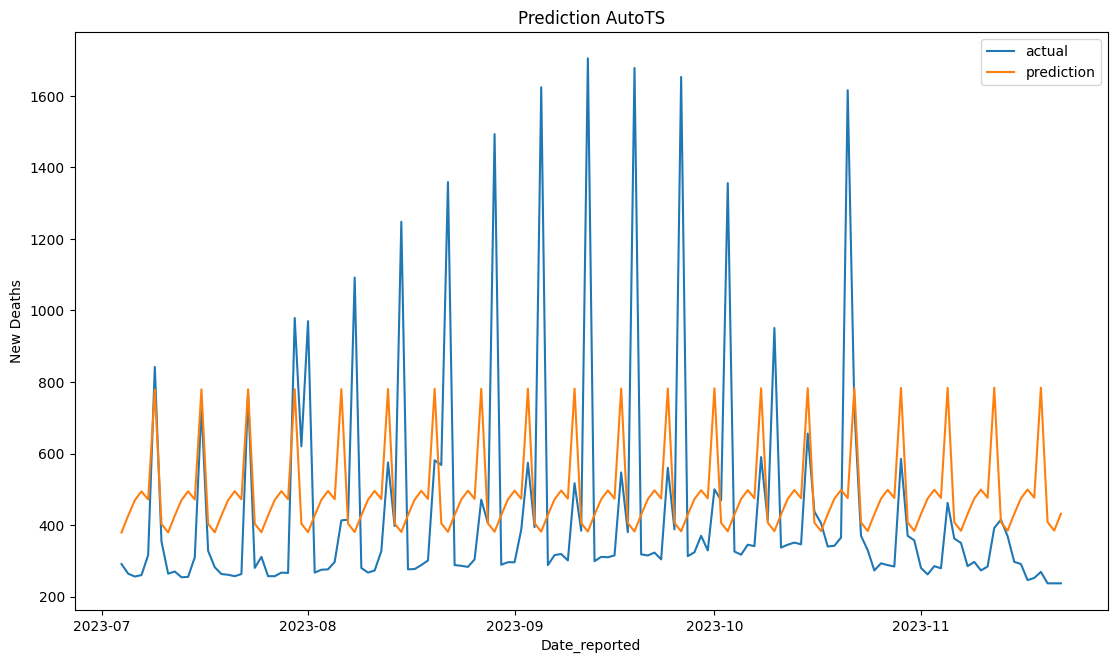

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(1280 / 96, 720 / 96))
ax.plot(dates[int(data_length*train_split):], test[target_column].values, label="actual")
ax.plot(dates[int(data_length*train_split):], prediction.forecast[target_column], label="prediction")
ax.set_title("Prediction AutoTS")
ax.set_ylabel("New Deaths")
ax.set_xlabel(date_column)
ax.legend()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()

Metrics

In [21]:
non_zero = []
import sys
 
for i in prediction.forecast[target_column]:
    if i == 0:
        non_zero.append(i+sys.float_info.min)
    else:
        non_zero.append(i)
print_evaluation_metrics(non_zero, test[target_column])

Evaluation Metrics:
MSE: 119080.05
RMSE: 345.08
MAE: 225.56
MAPE: 50.09
SMAPE: 43.14
